In [77]:
import torch
import apogee
import apogee.tools.read as apread
import apogee.samples.rc as rcmodel
import isodist
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("/Users/hkamdar/harsh")
from tqdm import *

In [15]:
stars = apread.allStar(main=True,exclude_star_bad=True,exclude_star_warn=True)

In [43]:
rc = apread.rcsample()

(4.0, 0.0)

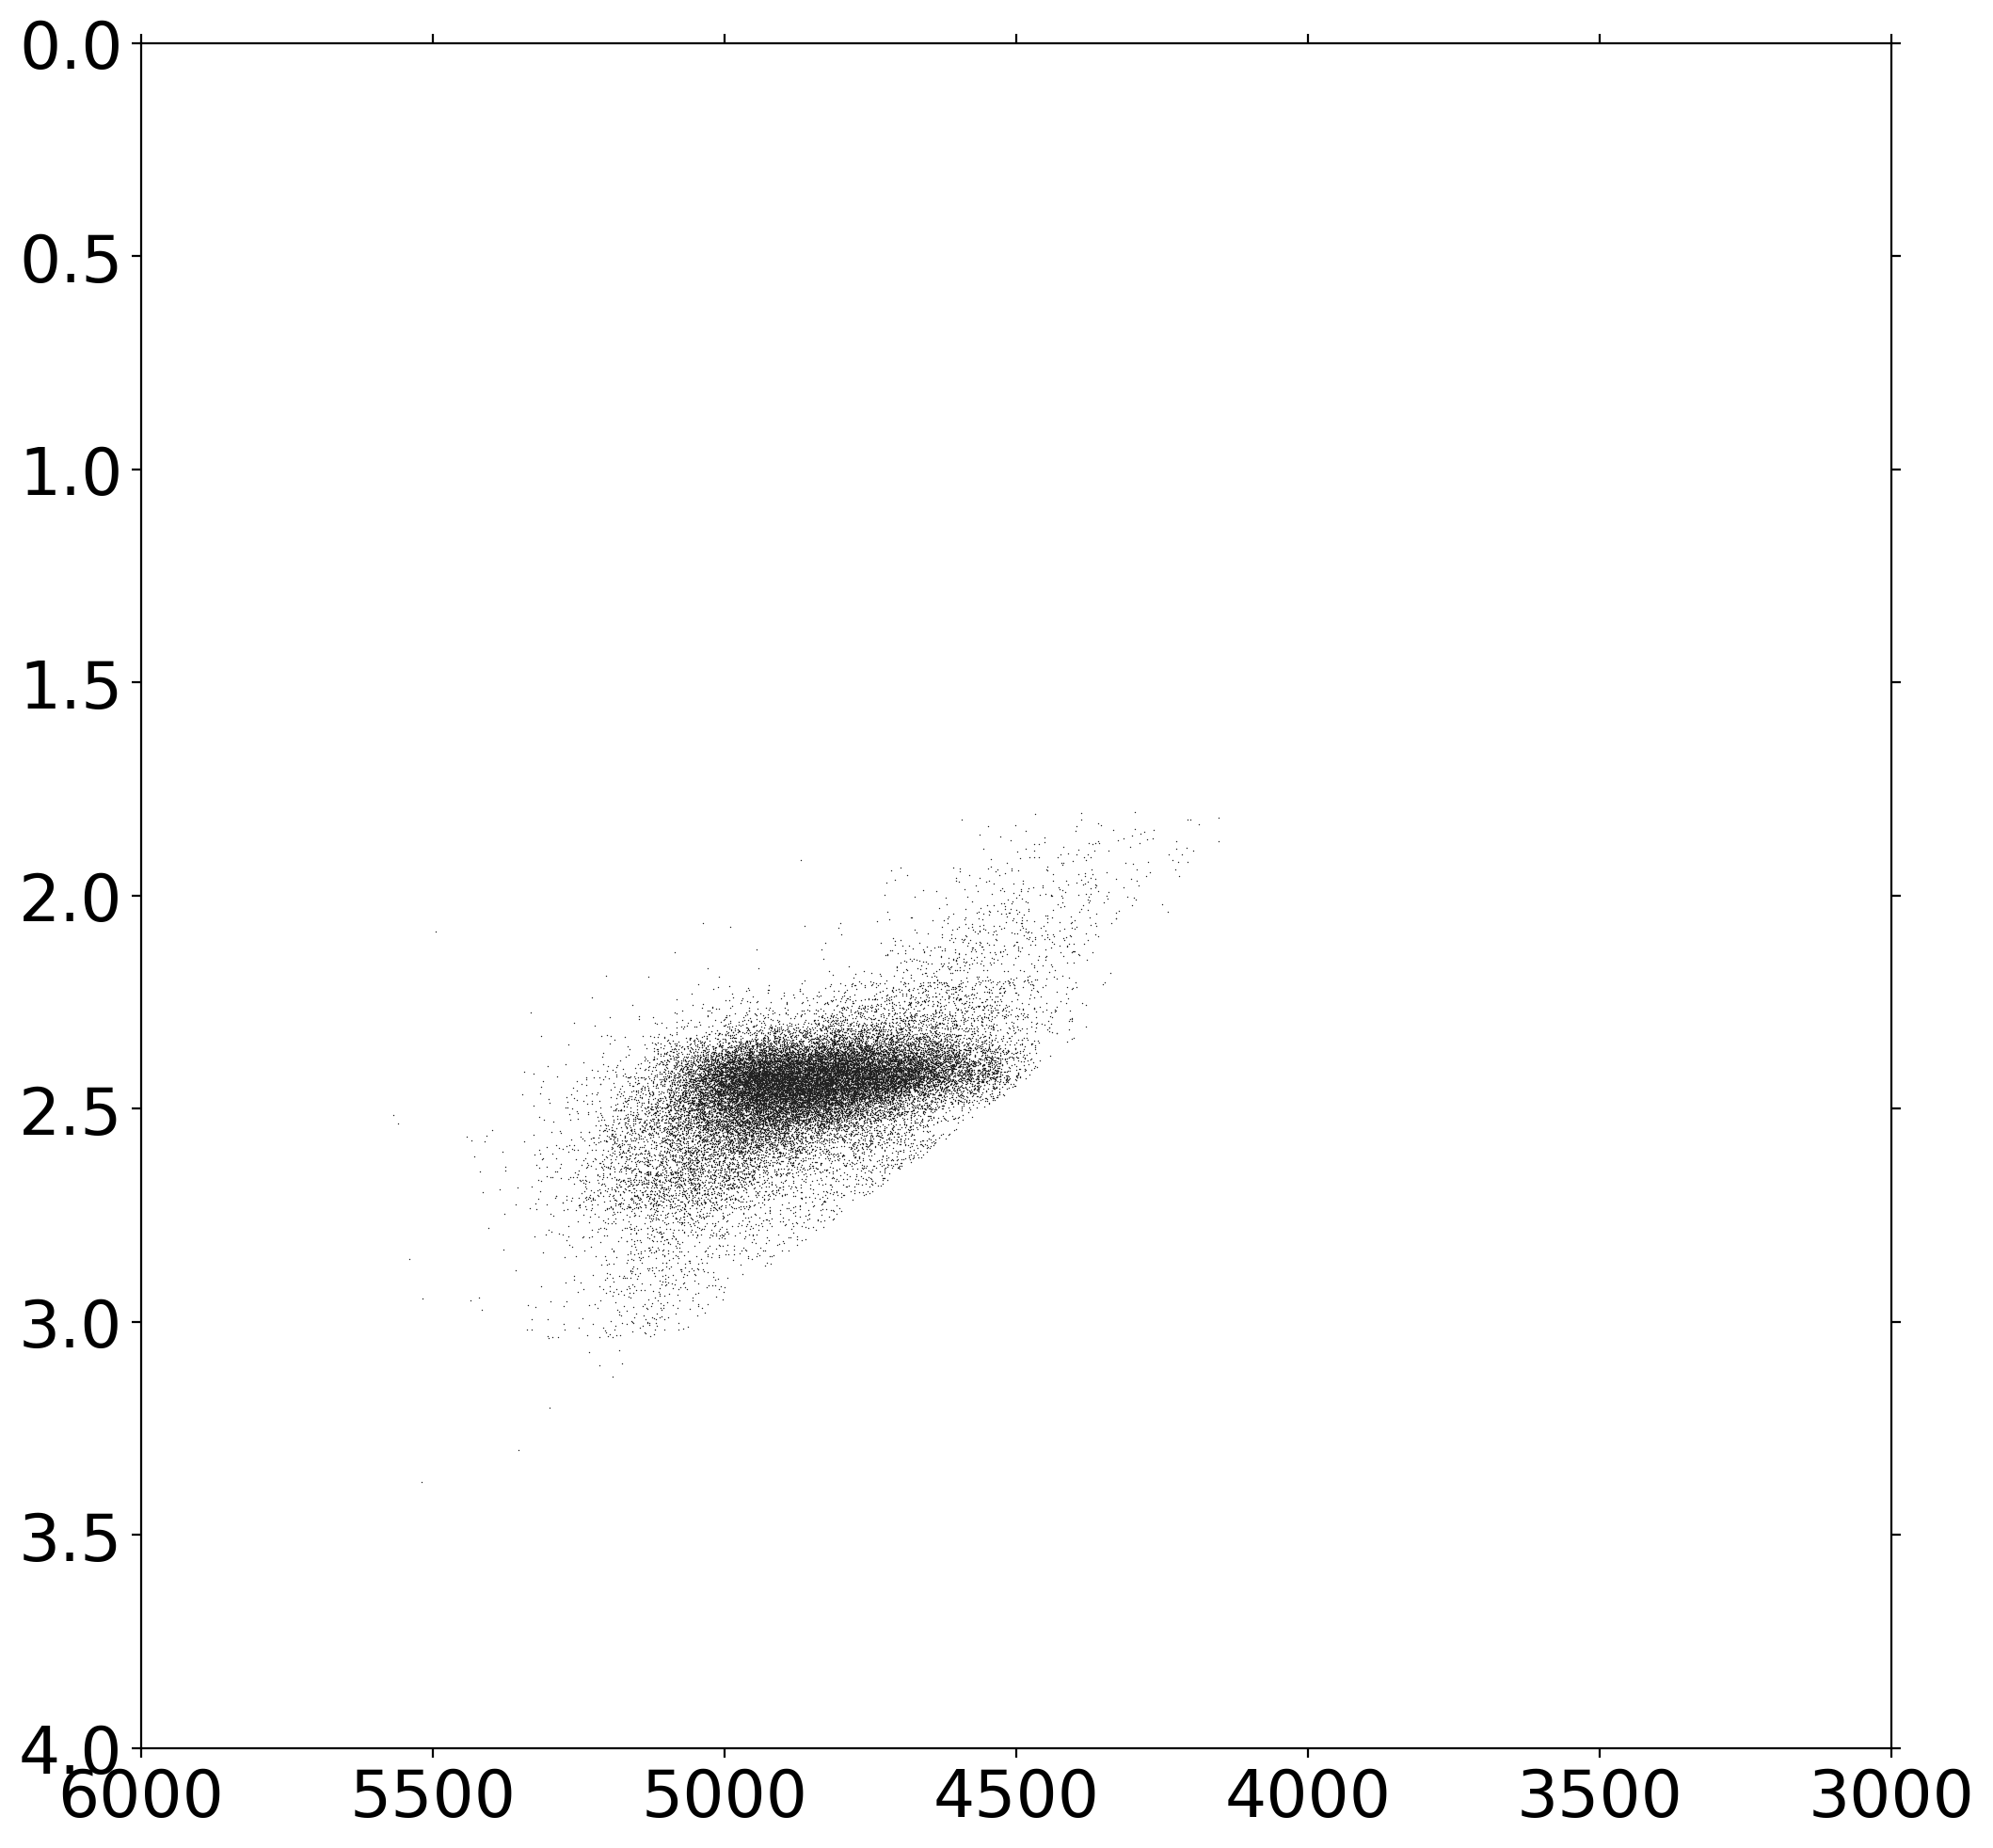

In [65]:
plt.plot(rc["TEFF"], rc["LOGG"], '.', markersize=1)
plt.xlim([6000, 3000])
plt.ylim([4.0, 0.0])

In [ ]:
DR = "14"
l = len(rc)
p = 7514
missing = 0

teff = np.zeros(l)
logg = np.zeros(l)
fe_h = np.zeros(l)
c_h = np.zeros(l)
n_h = np.zeros(l)
o_h = np.zeros(l)
fib = np.zeros(l)
spectra = np.zeros((l, p))
spectra_errs = np.zeros((l, p))
_bitmasks = np.zeros((l, p))

for star in tqdm(range(len(rc)),desc='read star data'):
    LOC = rc[star]['LOCATION_ID']
    APO = rc[star]['APOGEE_ID']
    TEFF = rc[star]['TEFF']
    LOGG = rc[star]['LOGG']
    FE_H = rc[star]['FE_H']
    if DR=='12':
        C_H = rc[star]['C_H']
        N_H = rc[star]['N_H']
        O_H = rc[star]['O_H']
    elif DR=='14':
        C_H = rc[star]['C_FE']
        N_H = rc[star]['N_FE']
        O_H = rc[star]['O_FE']
    FIB = rc[star]['MEANFIB']

    # Fit variables
    teff[star] = np.ma.masked_array(TEFF)
    logg[star] = np.ma.masked_array(LOGG)
    fe_h[star] = np.ma.masked_array(FE_H)
    c_h[star] = np.ma.masked_array(C_H)
    n_h[star] = np.ma.masked_array(N_H)
    o_h[star] = np.ma.masked_array(O_H)
    fib[star] = np.ma.masked_array(FIB)

    # Spectral data
    try:
        spectra[star] = apread.aspcapStar(LOC,APO,ext=1,
                                               header=False,dr=DR,
                                               aspcapWavegrid=True)
        spectra_errs[star] = apread.aspcapStar(LOC,APO,ext=2,
                                                    header=False,
                                                    dr=DR,
                                                    aspcapWavegrid=True)
        _bitmasks[star] = apread.apStar(LOC,APO,ext=3,
                                             header=False,dr=DR, 
                                             aspcapWavegrid=True)[1]
    except IOError:
        print('Star {0} missing '.format(star))
        spectra[star] = np.zeros(aspcappix)
        spectra_errs[star] = np.ones(aspcappix)
        _bitmasks[star] = np.ones(aspcappix).astype(np.int16)
        missing +=1

    if LOGG<-1000 or TEFF<-1000 or FE_H<-1000:
        _bitmasks[star] = np.ones(aspcappix).astype(np.int16)

read star data:   0%|          | 0/29502 [00:00<?, ?it/s]

read star data:   0%|          | 1/29502 [00:01<13:03:14,  1.59s/it]

read star data:   0%|          | 2/29502 [00:03<14:37:39,  1.79s/it]

read star data:   0%|          | 3/29502 [00:06<16:13:15,  1.98s/it]

read star data:   0%|          | 4/29502 [00:08<16:39:20,  2.03s/it]

read star data:   0%|          | 5/29502 [00:11<18:43:37,  2.29s/it]

read star data:   0%|          | 6/29502 [00:13<18:47:45,  2.29s/it]

read star data:   0%|          | 7/29502 [00:15<18:47:52,  2.29s/it]

read star data:   0%|          | 8/29502 [00:18<19:34:39,  2.39s/it]

read star data:   0%|          | 9/29502 [00:21<20:38:29,  2.52s/it]

read star data:   0%|          | 10/29502 [00:24<21:00:15,  2.56s/it]

read star data:   0%|          | 11/29502 [00:26<20:28:11,  2.50s/it]

read star data:   0%|          | 12/29502 [00:28<18:48:46,  2.30s/it]

read star data:   0%|          | 13/29502 [00:30<18:13:28,  2.22s/it]

read star data:   0%|          | 14/29502 [00:32<17:21:12,  2.12s/it]

read star data:   0%|          | 15/29502 [00:36<22:10:15,  2.71s/it]

read star data:   0%|          | 16/29502 [00:39<24:41:19,  3.01s/it]

read star data:   0%|          | 17/29502 [00:44<28:21:18,  3.46s/it]

read star data:   0%|          | 18/29502 [00:48<29:17:02,  3.58s/it]

read star data:   0%|          | 19/29502 [00:52<30:29:26,  3.72s/it]

read star data:   0%|          | 20/29502 [00:56<31:16:15,  3.82s/it]

read star data:   0%|          | 21/29502 [01:00<32:34:55,  3.98s/it]

read star data:   0%|          | 22/29502 [01:04<33:15:19,  4.06s/it]

read star data:   0%|          | 23/29502 [01:09<33:37:51,  4.11s/it]

read star data:   0%|          | 24/29502 [01:13<34:59:35,  4.27s/it]

read star data:   0%|          | 25/29502 [01:18<35:15:49,  4.31s/it]

read star data:   0%|          | 26/29502 [01:23<36:39:26,  4.48s/it]

read star data:   0%|          | 27/29502 [01:26<33:20:53,  4.07s/it]

read star data:   0%|          | 28/29502 [01:30<33:14:53,  4.06s/it]

read star data:   0%|          | 29/29502 [01:33<30:48:16,  3.76s/it]

read star data:   0%|          | 30/29502 [01:36<29:35:21,  3.61s/it]

read star data:   0%|          | 31/29502 [01:40<29:15:18,  3.57s/it]

read star data:   0%|          | 32/29502 [01:43<28:10:57,  3.44s/it]

read star data:   0%|          | 33/29502 [01:46<27:22:13,  3.34s/it]

read star data:   0%|          | 34/29502 [01:50<28:12:39,  3.45s/it]

read star data:   0%|          | 35/29502 [01:53<28:01:55,  3.42s/it]

read star data:   0%|          | 36/29502 [01:56<27:45:52,  3.39s/it]

read star data:   0%|          | 37/29502 [02:00<28:58:08,  3.54s/it]

read star data:   0%|          | 38/29502 [02:03<28:11:47,  3.45s/it]

read star data:   0%|          | 39/29502 [02:07<27:42:57,  3.39s/it]

read star data:   0%|          | 40/29502 [02:10<27:51:47,  3.40s/it]

read star data:   0%|          | 41/29502 [02:13<28:00:33,  3.42s/it]

read star data:   0%|          | 42/29502 [02:17<27:23:42,  3.35s/it]

read star data:   0%|          | 43/29502 [02:20<27:29:08,  3.36s/it]

read star data:   0%|          | 44/29502 [02:23<26:53:52,  3.29s/it]

read star data:   0%|          | 45/29502 [02:26<26:54:46,  3.29s/it]

read star data:   0%|          | 46/29502 [02:30<26:52:20,  3.28s/it]

read star data:   0%|          | 47/29502 [02:32<25:24:40,  3.11s/it]

read star data:   0%|          | 48/29502 [02:34<22:17:43,  2.73s/it]

read star data:   0%|          | 49/29502 [02:36<20:11:17,  2.47s/it]

read star data:   0%|          | 50/29502 [02:38<18:35:05,  2.27s/it]

read star data:   0%|          | 51/29502 [02:40<17:27:08,  2.13s/it]

read star data:   0%|          | 52/29502 [02:42<18:57:27,  2.32s/it]

read star data:   0%|          | 53/29502 [02:45<18:12:31,  2.23s/it]

read star data:   0%|          | 54/29502 [02:47<19:24:28,  2.37s/it]

read star data:   0%|          | 55/29502 [02:49<18:02:52,  2.21s/it]

read star data:   0%|          | 56/29502 [02:51<17:15:24,  2.11s/it]

read star data:   0%|          | 57/29502 [02:53<16:37:12,  2.03s/it]

read star data:   0%|          | 58/29502 [02:55<16:57:38,  2.07s/it]

read star data:   0%|          | 59/29502 [02:57<17:21:00,  2.12s/it]

read star data:   0%|          | 60/29502 [03:01<20:34:10,  2.52s/it]

read star data:   0%|          | 61/29502 [03:04<23:53:24,  2.92s/it]

read star data:   0%|          | 62/29502 [03:08<24:53:55,  3.04s/it]

read star data:   0%|          | 63/29502 [03:11<25:47:02,  3.15s/it]

read star data:   0%|          | 64/29502 [03:15<26:43:48,  3.27s/it]

read star data:   0%|          | 65/29502 [03:19<28:07:19,  3.44s/it]

read star data:   0%|          | 66/29502 [03:22<28:04:13,  3.43s/it]

read star data:   0%|          | 67/29502 [03:26<28:45:41,  3.52s/it]

read star data:   0%|          | 68/29502 [03:29<28:21:09,  3.47s/it]

read star data:   0%|          | 69/29502 [03:33<29:15:43,  3.58s/it]

read star data:   0%|          | 70/29502 [03:36<28:14:49,  3.46s/it]

read star data:   0%|          | 71/29502 [03:40<28:10:48,  3.45s/it]

read star data:   0%|          | 72/29502 [03:42<26:19:28,  3.22s/it]

read star data:   0%|          | 73/29502 [03:45<25:17:29,  3.09s/it]

read star data:   0%|          | 74/29502 [03:48<24:28:35,  2.99s/it]

read star data:   0%|          | 75/29502 [03:51<24:07:22,  2.95s/it]

read star data:   0%|          | 76/29502 [03:54<24:24:53,  2.99s/it]

read star data:   0%|          | 77/29502 [03:57<24:32:43,  3.00s/it]

read star data:   0%|          | 78/29502 [04:00<24:37:57,  3.01s/it]

read star data:   0%|          | 79/29502 [04:03<24:14:41,  2.97s/it]

read star data:   0%|          | 80/29502 [04:06<24:49:30,  3.04s/it]

read star data:   0%|          | 81/29502 [04:09<24:25:51,  2.99s/it]

read star data:   0%|          | 82/29502 [04:12<24:02:45,  2.94s/it]

read star data:   0%|          | 83/29502 [04:14<23:53:46,  2.92s/it]

read star data:   0%|          | 84/29502 [04:17<23:56:32,  2.93s/it]

read star data:   0%|          | 85/29502 [04:20<23:35:02,  2.89s/it]

read star data:   0%|          | 86/29502 [04:23<23:48:12,  2.91s/it]

read star data:   0%|          | 87/29502 [04:26<23:42:53,  2.90s/it]

read star data:   0%|          | 88/29502 [04:29<23:14:26,  2.84s/it]

read star data:   0%|          | 89/29502 [04:32<23:15:06,  2.85s/it]

read star data:   0%|          | 90/29502 [04:34<23:04:24,  2.82s/it]

read star data:   0%|          | 91/29502 [04:37<22:59:26,  2.81s/it]

read star data:   0%|          | 92/29502 [04:40<23:11:32,  2.84s/it]

read star data:   0%|          | 93/29502 [04:43<23:00:33,  2.82s/it]

read star data:   0%|          | 94/29502 [04:46<23:26:50,  2.87s/it]

read star data:   0%|          | 95/29502 [04:49<23:08:01,  2.83s/it]

read star data:   0%|          | 96/29502 [04:51<22:43:53,  2.78s/it]

read star data:   0%|          | 97/29502 [04:54<22:19:02,  2.73s/it]

read star data:   0%|          | 98/29502 [04:56<21:18:59,  2.61s/it]

read star data:   0%|          | 99/29502 [04:59<21:07:05,  2.59s/it]

read star data:   0%|          | 100/29502 [05:01<20:34:53,  2.52s/it]

read star data:   0%|          | 101/29502 [05:03<20:17:46,  2.49s/it]

read star data:   0%|          | 102/29502 [05:07<22:44:20,  2.78s/it]

read star data:   0%|          | 103/29502 [05:12<28:47:16,  3.53s/it]

read star data:   0%|          | 104/29502 [05:15<25:55:49,  3.18s/it]

read star data:   0%|          | 105/29502 [05:17<24:07:04,  2.95s/it]

read star data:   0%|          | 106/29502 [05:20<23:45:58,  2.91s/it]

read star data:   0%|          | 107/29502 [05:23<24:59:57,  3.06s/it]

read star data:   0%|          | 108/29502 [05:27<26:00:37,  3.19s/it]

read star data:   0%|          | 109/29502 [05:30<27:09:35,  3.33s/it]

read star data:   0%|          | 110/29502 [05:34<28:19:12,  3.47s/it]

read star data:   0%|          | 111/29502 [05:37<27:13:03,  3.33s/it]

read star data:   0%|          | 112/29502 [05:40<26:33:09,  3.25s/it]

read star data:   0%|          | 113/29502 [05:43<26:19:04,  3.22s/it]

read star data:   0%|          | 114/29502 [05:47<26:26:51,  3.24s/it]

read star data:   0%|          | 115/29502 [05:50<26:34:38,  3.26s/it]

read star data:   0%|          | 116/29502 [05:53<26:20:52,  3.23s/it]

read star data:   0%|          | 117/29502 [05:56<25:50:37,  3.17s/it]

read star data:   0%|          | 118/29502 [06:00<26:42:24,  3.27s/it]

read star data:   0%|          | 119/29502 [06:03<27:27:24,  3.36s/it]

read star data:   0%|          | 120/29502 [06:06<26:21:13,  3.23s/it]

read star data:   0%|          | 121/29502 [06:09<25:56:57,  3.18s/it]

read star data:   0%|          | 122/29502 [06:12<25:24:20,  3.11s/it]

read star data:   0%|          | 123/29502 [06:15<24:50:43,  3.04s/it]

read star data:   0%|          | 124/29502 [06:18<24:46:33,  3.04s/it]

read star data:   0%|          | 125/29502 [06:21<24:21:21,  2.98s/it]

read star data:   0%|          | 126/29502 [06:24<24:19:18,  2.98s/it]

read star data:   0%|          | 127/29502 [06:27<23:56:45,  2.93s/it]

read star data:   0%|          | 128/29502 [06:30<23:46:42,  2.91s/it]

read star data:   0%|          | 129/29502 [06:33<24:16:58,  2.98s/it]

read star data:   0%|          | 130/29502 [06:35<23:39:08,  2.90s/it]

read star data:   0%|          | 131/29502 [06:38<23:09:45,  2.84s/it]

read star data:   0%|          | 132/29502 [06:41<22:34:18,  2.77s/it]

read star data:   0%|          | 133/29502 [06:43<22:14:55,  2.73s/it]

read star data:   0%|          | 134/29502 [06:47<23:18:59,  2.86s/it]

read star data:   0%|          | 135/29502 [06:49<23:10:23,  2.84s/it]

read star data:   0%|          | 136/29502 [06:52<22:27:42,  2.75s/it]

read star data:   0%|          | 137/29502 [06:55<22:34:50,  2.77s/it]

read star data:   0%|          | 138/29502 [06:57<22:09:10,  2.72s/it]

read star data:   0%|          | 139/29502 [07:00<22:22:43,  2.74s/it]

read star data:   0%|          | 140/29502 [07:03<22:06:20,  2.71s/it]

read star data:   0%|          | 141/29502 [07:05<22:03:39,  2.70s/it]

read star data:   0%|          | 142/29502 [07:08<22:43:43,  2.79s/it]

read star data:   0%|          | 143/29502 [07:11<22:20:30,  2.74s/it]

read star data:   0%|          | 144/29502 [07:14<22:45:27,  2.79s/it]

read star data:   0%|          | 145/29502 [07:17<22:54:54,  2.81s/it]

read star data:   0%|          | 146/29502 [07:19<22:24:57,  2.75s/it]

read star data:   0%|          | 147/29502 [07:22<21:43:36,  2.66s/it]

read star data:   1%|          | 148/29502 [07:25<21:47:00,  2.67s/it]

read star data:   1%|          | 149/29502 [07:27<21:27:31,  2.63s/it]

read star data:   1%|          | 150/29502 [07:30<21:30:17,  2.64s/it]

read star data:   1%|          | 151/29502 [07:32<21:23:41,  2.62s/it]

read star data:   1%|          | 152/29502 [07:35<21:14:50,  2.61s/it]

read star data:   1%|          | 153/29502 [07:38<21:30:30,  2.64s/it]

read star data:   1%|          | 154/29502 [07:40<21:13:38,  2.60s/it]

read star data:   1%|          | 155/29502 [07:43<21:50:47,  2.68s/it]

read star data:   1%|          | 156/29502 [07:45<21:23:09,  2.62s/it]

read star data:   1%|          | 157/29502 [07:48<21:17:57,  2.61s/it]

read star data:   1%|          | 158/29502 [07:51<21:55:00,  2.69s/it]

read star data:   1%|          | 159/29502 [07:53<21:33:34,  2.65s/it]

read star data:   1%|          | 160/29502 [07:56<21:00:58,  2.58s/it]

read star data:   1%|          | 161/29502 [07:59<21:20:57,  2.62s/it]

read star data:   1%|          | 162/29502 [08:01<20:49:33,  2.56s/it]

read star data:   1%|          | 163/29502 [08:03<20:35:07,  2.53s/it]

read star data:   1%|          | 164/29502 [08:06<20:32:24,  2.52s/it]

read star data:   1%|          | 165/29502 [08:08<20:32:30,  2.52s/it]

read star data:   1%|          | 166/29502 [08:11<20:11:28,  2.48s/it]

read star data:   1%|          | 167/29502 [08:13<20:29:47,  2.52s/it]

read star data:   1%|          | 168/29502 [08:16<20:27:55,  2.51s/it]

read star data:   1%|          | 169/29502 [08:18<20:08:52,  2.47s/it]

read star data:   1%|          | 170/29502 [08:21<20:05:35,  2.47s/it]

read star data:   1%|          | 171/29502 [08:23<19:48:18,  2.43s/it]

read star data:   1%|          | 172/29502 [08:26<19:52:58,  2.44s/it]

read star data:   1%|          | 173/29502 [08:28<19:50:23,  2.44s/it]

read star data:   1%|          | 174/29502 [08:31<19:56:50,  2.45s/it]

read star data:   1%|          | 175/29502 [08:33<19:54:30,  2.44s/it]

read star data:   1%|          | 176/29502 [08:35<19:47:54,  2.43s/it]

read star data:   1%|          | 177/29502 [08:38<19:41:19,  2.42s/it]

read star data:   1%|          | 178/29502 [08:40<19:37:21,  2.41s/it]

read star data:   1%|          | 179/29502 [08:43<19:40:06,  2.41s/it]

read star data:   1%|          | 180/29502 [08:45<19:40:31,  2.42s/it]

read star data:   1%|          | 181/29502 [08:47<19:31:46,  2.40s/it]

read star data:   1%|          | 182/29502 [08:50<20:01:47,  2.46s/it]

read star data:   1%|          | 183/29502 [08:52<19:50:33,  2.44s/it]

read star data:   1%|          | 184/29502 [08:55<19:36:08,  2.41s/it]

read star data:   1%|          | 185/29502 [08:57<20:33:28,  2.52s/it]

read star data:   1%|          | 186/29502 [09:00<20:07:32,  2.47s/it]

read star data:   1%|          | 187/29502 [09:03<21:00:38,  2.58s/it]

read star data:   1%|          | 188/29502 [09:07<24:19:09,  2.99s/it]

read star data:   1%|          | 189/29502 [09:09<23:16:24,  2.86s/it]

read star data:   1%|          | 190/29502 [09:12<22:13:40,  2.73s/it]

read star data:   1%|          | 191/29502 [09:14<22:08:32,  2.72s/it]

read star data:   1%|          | 192/29502 [09:17<22:30:10,  2.76s/it]

read star data:   1%|          | 193/29502 [09:20<21:44:51,  2.67s/it]

read star data:   1%|          | 194/29502 [09:22<20:41:43,  2.54s/it]

read star data:   1%|          | 195/29502 [09:24<20:30:39,  2.52s/it]

read star data:   1%|          | 196/29502 [09:27<20:09:51,  2.48s/it]

read star data:   1%|          | 197/29502 [09:29<20:48:01,  2.56s/it]

read star data:   1%|          | 198/29502 [09:32<20:13:05,  2.48s/it]

read star data:   1%|          | 199/29502 [09:34<19:49:38,  2.44s/it]

read star data:   1%|          | 200/29502 [09:36<19:44:26,  2.43s/it]

read star data:   1%|          | 201/29502 [09:39<19:39:23,  2.42s/it]

read star data:   1%|          | 202/29502 [09:41<19:24:11,  2.38s/it]

read star data:   1%|          | 203/29502 [09:44<19:40:58,  2.42s/it]

read star data:   1%|          | 204/29502 [09:46<20:38:27,  2.54s/it]

read star data:   1%|          | 205/29502 [09:49<19:39:39,  2.42s/it]

read star data:   1%|          | 206/29502 [09:51<19:15:50,  2.37s/it]

read star data:   1%|          | 207/29502 [09:53<19:05:04,  2.35s/it]

read star data:   1%|          | 208/29502 [09:55<18:58:39,  2.33s/it]

read star data:   1%|          | 209/29502 [09:58<19:18:23,  2.37s/it]

read star data:   1%|          | 210/29502 [10:00<19:11:50,  2.36s/it]

read star data:   1%|          | 211/29502 [10:03<19:09:52,  2.36s/it]

read star data:   1%|          | 212/29502 [10:05<19:23:27,  2.38s/it]

read star data:   1%|          | 213/29502 [10:07<19:31:34,  2.40s/it]

read star data:   1%|          | 214/29502 [10:10<20:14:17,  2.49s/it]

read star data:   1%|          | 215/29502 [10:13<20:26:13,  2.51s/it]

read star data:   1%|          | 216/29502 [10:16<21:29:31,  2.64s/it]

read star data:   1%|          | 217/29502 [10:19<22:14:26,  2.73s/it]

read star data:   1%|          | 218/29502 [10:24<29:30:39,  3.63s/it]

read star data:   1%|          | 219/29502 [10:29<31:11:09,  3.83s/it]

read star data:   1%|          | 220/29502 [10:32<31:02:19,  3.82s/it]

read star data:   1%|          | 221/29502 [10:36<30:40:04,  3.77s/it]

read star data:   1%|          | 222/29502 [10:40<31:28:22,  3.87s/it]

read star data:   1%|          | 223/29502 [10:44<31:13:16,  3.84s/it]

read star data:   1%|          | 224/29502 [10:48<31:19:31,  3.85s/it]

read star data:   1%|          | 225/29502 [10:52<31:44:00,  3.90s/it]

read star data:   1%|          | 226/29502 [10:55<29:55:37,  3.68s/it]

read star data:   1%|          | 227/29502 [10:58<28:55:14,  3.56s/it]

read star data:   1%|          | 228/29502 [11:02<28:30:15,  3.51s/it]

read star data:   1%|          | 229/29502 [11:05<28:03:04,  3.45s/it]

read star data:   1%|          | 230/29502 [11:09<28:27:24,  3.50s/it]

read star data:   1%|          | 231/29502 [11:12<29:11:21,  3.59s/it]

read star data:   1%|          | 232/29502 [11:17<32:36:08,  4.01s/it]

read star data:   1%|          | 233/29502 [11:21<31:17:21,  3.85s/it]

read star data:   1%|          | 234/29502 [11:25<32:24:12,  3.99s/it]

read star data:   1%|          | 235/29502 [11:29<32:05:03,  3.95s/it]

read star data:   1%|          | 236/29502 [11:33<32:50:45,  4.04s/it]

read star data:   1%|          | 237/29502 [11:38<34:39:35,  4.26s/it]

read star data:   1%|          | 238/29502 [11:42<33:31:49,  4.12s/it]

read star data:   1%|          | 239/29502 [11:45<32:18:55,  3.98s/it]

read star data:   1%|          | 240/29502 [11:49<31:17:53,  3.85s/it]

read star data:   1%|          | 241/29502 [11:53<31:24:21,  3.86s/it]

read star data:   1%|          | 242/29502 [11:57<32:42:26,  4.02s/it]

read star data:   1%|          | 243/29502 [12:01<31:56:08,  3.93s/it]

read star data:   1%|          | 244/29502 [12:05<31:41:00,  3.90s/it]

read star data:   1%|          | 245/29502 [12:08<28:34:49,  3.52s/it]

read star data:   1%|          | 246/29502 [12:10<26:11:29,  3.22s/it]

read star data:   1%|          | 247/29502 [12:13<24:37:53,  3.03s/it]

read star data:   1%|          | 248/29502 [12:15<23:26:39,  2.89s/it]

read star data:   1%|          | 249/29502 [12:18<22:33:27,  2.78s/it]

read star data:   1%|          | 250/29502 [12:20<21:48:16,  2.68s/it]

read star data:   1%|          | 251/29502 [12:23<22:31:24,  2.77s/it]

read star data:   1%|          | 252/29502 [12:26<21:41:42,  2.67s/it]

read star data:   1%|          | 253/29502 [12:28<20:53:30,  2.57s/it]

read star data:   1%|          | 254/29502 [12:30<20:49:35,  2.56s/it]

read star data:   1%|          | 255/29502 [12:33<20:34:25,  2.53s/it]

read star data:   1%|          | 256/29502 [12:35<20:23:43,  2.51s/it]

read star data:   1%|          | 257/29502 [12:38<20:29:36,  2.52s/it]

read star data:   1%|          | 258/29502 [12:40<20:10:51,  2.48s/it]

read star data:   1%|          | 259/29502 [12:43<19:57:17,  2.46s/it]

read star data:   1%|          | 260/29502 [12:45<20:08:36,  2.48s/it]

read star data:   1%|          | 261/29502 [12:48<21:53:36,  2.70s/it]

read star data:   1%|          | 262/29502 [12:51<21:44:40,  2.68s/it]

read star data:   1%|          | 263/29502 [12:54<21:12:18,  2.61s/it]

read star data:   1%|          | 264/29502 [12:56<20:52:32,  2.57s/it]

read star data:   1%|          | 265/29502 [12:59<21:29:42,  2.65s/it]

read star data:   1%|          | 266/29502 [13:02<21:47:10,  2.68s/it]

read star data:   1%|          | 267/29502 [13:04<21:55:07,  2.70s/it]

read star data:   1%|          | 268/29502 [13:07<22:02:06,  2.71s/it]

read star data:   1%|          | 269/29502 [13:10<22:14:18,  2.74s/it]

read star data:   1%|          | 270/29502 [13:13<22:05:23,  2.72s/it]

read star data:   1%|          | 271/29502 [13:15<21:34:10,  2.66s/it]

read star data:   1%|          | 272/29502 [13:18<22:00:03,  2.71s/it]

read star data:   1%|          | 273/29502 [13:20<21:19:48,  2.63s/it]

read star data:   1%|          | 274/29502 [13:23<21:00:44,  2.59s/it]

read star data:   1%|          | 275/29502 [13:26<21:28:11,  2.64s/it]

read star data:   1%|          | 276/29502 [13:28<21:26:30,  2.64s/it]

read star data:   1%|          | 277/29502 [13:31<20:59:40,  2.59s/it]

read star data:   1%|          | 278/29502 [13:33<20:37:31,  2.54s/it]

read star data:   1%|          | 279/29502 [13:36<20:36:58,  2.54s/it]

read star data:   1%|          | 280/29502 [13:39<23:12:13,  2.86s/it]

read star data:   1%|          | 281/29502 [13:42<22:41:58,  2.80s/it]

read star data:   1%|          | 282/29502 [13:45<22:34:37,  2.78s/it]

read star data:   1%|          | 283/29502 [13:48<23:12:43,  2.86s/it]

read star data:   1%|          | 284/29502 [13:51<24:13:37,  2.99s/it]

read star data:   1%|          | 285/29502 [13:55<26:25:50,  3.26s/it]

read star data:   1%|          | 286/29502 [13:58<25:30:18,  3.14s/it]

read star data:   1%|          | 287/29502 [14:01<24:42:05,  3.04s/it]

read star data:   1%|          | 288/29502 [14:03<23:48:03,  2.93s/it]

read star data:   1%|          | 289/29502 [14:06<23:04:44,  2.84s/it]

read star data:   1%|          | 290/29502 [14:09<23:20:21,  2.88s/it]

read star data:   1%|          | 291/29502 [14:11<22:18:59,  2.75s/it]

read star data:   1%|          | 292/29502 [14:14<21:18:24,  2.63s/it]

read star data:   1%|          | 293/29502 [14:16<20:52:12,  2.57s/it]

read star data:   1%|          | 294/29502 [14:19<22:20:32,  2.75s/it]

read star data:   1%|          | 295/29502 [14:22<21:17:56,  2.63s/it]

read star data:   1%|          | 296/29502 [14:24<20:44:07,  2.56s/it]

read star data:   1%|          | 297/29502 [14:26<20:26:31,  2.52s/it]

read star data:   1%|          | 298/29502 [14:29<21:06:13,  2.60s/it]

read star data:   1%|          | 299/29502 [14:32<20:34:11,  2.54s/it]

read star data:   1%|          | 300/29502 [14:34<20:15:33,  2.50s/it]

read star data:   1%|          | 301/29502 [14:37<21:27:38,  2.65s/it]

read star data:   1%|          | 302/29502 [14:40<21:17:57,  2.63s/it]

read star data:   1%|          | 303/29502 [14:42<21:03:27,  2.60s/it]

read star data:   1%|          | 304/29502 [14:45<21:06:49,  2.60s/it]

read star data:   1%|          | 305/29502 [14:47<21:01:25,  2.59s/it]

read star data:   1%|          | 306/29502 [14:50<20:57:12,  2.58s/it]

read star data:   1%|          | 307/29502 [14:53<21:39:19,  2.67s/it]

read star data:   1%|          | 308/29502 [14:55<21:19:08,  2.63s/it]

read star data:   1%|          | 309/29502 [14:58<21:47:42,  2.69s/it]

read star data:   1%|          | 310/29502 [15:01<21:34:26,  2.66s/it]

read star data:   1%|          | 311/29502 [15:03<21:13:23,  2.62s/it]

read star data:   1%|          | 312/29502 [15:06<21:23:23,  2.64s/it]

read star data:   1%|          | 313/29502 [15:08<20:53:46,  2.58s/it]

read star data:   1%|          | 314/29502 [15:11<21:56:31,  2.71s/it]

read star data:   1%|          | 315/29502 [15:14<21:08:29,  2.61s/it]

read star data:   1%|          | 316/29502 [15:17<21:40:29,  2.67s/it]

read star data:   1%|          | 317/29502 [15:19<21:52:08,  2.70s/it]

read star data:   1%|          | 318/29502 [15:22<21:15:21,  2.62s/it]

read star data:   1%|          | 319/29502 [15:25<21:46:40,  2.69s/it]

read star data:   1%|          | 320/29502 [15:27<21:24:51,  2.64s/it]

read star data:   1%|          | 321/29502 [15:30<21:31:09,  2.65s/it]

read star data:   1%|          | 322/29502 [15:33<23:28:59,  2.90s/it]

read star data:   1%|          | 323/29502 [15:37<24:35:24,  3.03s/it]

read star data:   1%|          | 324/29502 [15:40<26:16:08,  3.24s/it]

read star data:   1%|          | 325/29502 [15:43<25:25:33,  3.14s/it]

read star data:   1%|          | 326/29502 [15:47<27:35:10,  3.40s/it]

read star data:   1%|          | 327/29502 [15:51<27:22:51,  3.38s/it]

read star data:   1%|          | 328/29502 [15:54<26:35:59,  3.28s/it]

read star data:   1%|          | 329/29502 [15:57<25:58:52,  3.21s/it]

read star data:   1%|          | 330/29502 [16:00<26:14:06,  3.24s/it]

read star data:   1%|          | 331/29502 [16:03<26:14:22,  3.24s/it]

read star data:   1%|          | 332/29502 [16:06<25:28:58,  3.14s/it]

read star data:   1%|          | 333/29502 [16:09<25:41:11,  3.17s/it]

read star data:   1%|          | 334/29502 [16:13<25:42:51,  3.17s/it]

read star data:   1%|          | 335/29502 [16:16<25:53:13,  3.20s/it]

read star data:   1%|          | 336/29502 [16:19<26:54:45,  3.32s/it]

read star data:   1%|          | 337/29502 [16:23<27:02:04,  3.34s/it]

read star data:   1%|          | 338/29502 [16:26<26:47:14,  3.31s/it]

read star data:   1%|          | 339/29502 [16:29<26:33:30,  3.28s/it]

read star data:   1%|          | 340/29502 [16:32<25:04:13,  3.09s/it]

read star data:   1%|          | 341/29502 [16:35<24:49:18,  3.06s/it]

read star data:   1%|          | 342/29502 [16:38<24:58:05,  3.08s/it]

read star data:   1%|          | 343/29502 [16:41<25:16:34,  3.12s/it]

read star data:   1%|          | 344/29502 [16:45<26:09:23,  3.23s/it]

read star data:   1%|          | 345/29502 [16:48<26:16:10,  3.24s/it]

read star data:   1%|          | 346/29502 [16:52<28:01:04,  3.46s/it]

read star data:   1%|          | 347/29502 [16:55<27:20:22,  3.38s/it]

read star data:   1%|          | 348/29502 [16:58<26:00:37,  3.21s/it]

read star data:   1%|          | 349/29502 [17:01<25:56:02,  3.20s/it]

read star data:   1%|          | 350/29502 [17:05<28:31:38,  3.52s/it]

read star data:   1%|          | 351/29502 [17:08<27:15:47,  3.37s/it]

read star data:   1%|          | 352/29502 [17:12<27:42:43,  3.42s/it]

read star data:   1%|          | 353/29502 [17:15<26:01:13,  3.21s/it]

read star data:   1%|          | 354/29502 [17:18<25:14:09,  3.12s/it]

read star data:   1%|          | 355/29502 [17:21<24:58:43,  3.09s/it]

read star data:   1%|          | 356/29502 [17:24<25:26:46,  3.14s/it]

read star data:   1%|          | 357/29502 [17:27<24:32:39,  3.03s/it]

read star data:   1%|          | 358/29502 [17:29<24:01:32,  2.97s/it]

read star data:   1%|          | 359/29502 [17:32<23:20:25,  2.88s/it]

read star data:   1%|          | 360/29502 [17:35<23:46:21,  2.94s/it]

read star data:   1%|          | 361/29502 [17:38<24:13:48,  2.99s/it]

read star data:   1%|          | 362/29502 [17:42<25:58:41,  3.21s/it]

read star data:   1%|          | 363/29502 [17:45<25:40:01,  3.17s/it]

read star data:   1%|          | 364/29502 [17:48<25:14:41,  3.12s/it]

read star data:   1%|          | 365/29502 [17:51<25:10:19,  3.11s/it]

read star data:   1%|          | 366/29502 [17:54<24:39:54,  3.05s/it]

read star data:   1%|          | 367/29502 [17:58<26:00:17,  3.21s/it]

read star data:   1%|          | 368/29502 [18:01<26:07:40,  3.23s/it]

read star data:   1%|▏         | 369/29502 [18:03<24:12:13,  2.99s/it]

read star data:   1%|▏         | 370/29502 [18:06<23:39:29,  2.92s/it]

read star data:   1%|▏         | 371/29502 [18:09<22:13:22,  2.75s/it]

read star data:   1%|▏         | 372/29502 [18:11<22:07:29,  2.73s/it]

read star data:   1%|▏         | 373/29502 [18:14<21:33:09,  2.66s/it]

read star data:   1%|▏         | 374/29502 [18:17<22:03:28,  2.73s/it]

read star data:   1%|▏         | 375/29502 [18:19<21:51:55,  2.70s/it]

read star data:   1%|▏         | 376/29502 [18:22<22:01:01,  2.72s/it]

read star data:   1%|▏         | 377/29502 [18:25<22:30:32,  2.78s/it]

read star data:   1%|▏         | 378/29502 [18:28<23:26:50,  2.90s/it]

read star data:   1%|▏         | 379/29502 [18:31<24:00:00,  2.97s/it]

read star data:   1%|▏         | 380/29502 [18:35<25:15:48,  3.12s/it]

read star data:   1%|▏         | 381/29502 [18:37<24:08:51,  2.99s/it]

read star data:   1%|▏         | 382/29502 [18:41<25:46:05,  3.19s/it]

read star data:   1%|▏         | 383/29502 [18:45<27:45:38,  3.43s/it]

read star data:   1%|▏         | 384/29502 [18:48<27:13:43,  3.37s/it]

read star data:   1%|▏         | 385/29502 [18:52<28:06:27,  3.48s/it]

read star data:   1%|▏         | 386/29502 [18:55<27:01:40,  3.34s/it]

read star data:   1%|▏         | 387/29502 [18:59<27:35:17,  3.41s/it]

read star data:   1%|▏         | 388/29502 [19:02<27:54:11,  3.45s/it]

read star data:   1%|▏         | 389/29502 [19:05<26:16:30,  3.25s/it]

read star data:   1%|▏         | 390/29502 [19:08<26:07:17,  3.23s/it]

read star data:   1%|▏         | 391/29502 [19:11<24:45:22,  3.06s/it]

read star data:   1%|▏         | 392/29502 [19:13<23:37:57,  2.92s/it]

read star data:   1%|▏         | 393/29502 [19:17<25:16:46,  3.13s/it]

read star data:   1%|▏         | 394/29502 [19:19<23:43:21,  2.93s/it]

read star data:   1%|▏         | 395/29502 [19:22<22:40:58,  2.81s/it]

read star data:   1%|▏         | 396/29502 [19:25<24:14:34,  3.00s/it]

read star data:   1%|▏         | 397/29502 [19:28<23:00:57,  2.85s/it]

read star data:   1%|▏         | 398/29502 [19:30<22:03:19,  2.73s/it]

read star data:   1%|▏         | 399/29502 [19:33<22:23:54,  2.77s/it]

read star data:   1%|▏         | 400/29502 [19:36<22:06:55,  2.74s/it]

read star data:   1%|▏         | 401/29502 [19:39<22:14:19,  2.75s/it]

read star data:   1%|▏         | 402/29502 [19:41<21:44:10,  2.69s/it]

read star data:   1%|▏         | 403/29502 [19:44<21:17:54,  2.63s/it]

read star data:   1%|▏         | 404/29502 [19:46<20:56:16,  2.59s/it]

read star data:   1%|▏         | 405/29502 [19:49<20:27:31,  2.53s/it]

read star data:   1%|▏         | 406/29502 [19:51<20:09:19,  2.49s/it]

read star data:   1%|▏         | 407/29502 [19:53<20:00:01,  2.47s/it]

read star data:   1%|▏         | 408/29502 [19:56<20:05:17,  2.49s/it]

read star data:   1%|▏         | 409/29502 [19:59<20:25:57,  2.53s/it]

read star data:   1%|▏         | 410/29502 [20:01<20:30:15,  2.54s/it]

read star data:   1%|▏         | 411/29502 [20:04<20:31:19,  2.54s/it]

read star data:   1%|▏         | 412/29502 [20:06<20:07:40,  2.49s/it]

read star data:   1%|▏         | 413/29502 [20:08<19:56:15,  2.47s/it]

read star data:   1%|▏         | 414/29502 [20:11<20:03:01,  2.48s/it]

read star data:   1%|▏         | 415/29502 [20:13<19:41:29,  2.44s/it]

read star data:   1%|▏         | 416/29502 [20:16<19:39:37,  2.43s/it]

read star data:   1%|▏         | 417/29502 [20:18<19:34:46,  2.42s/it]

read star data:   1%|▏         | 418/29502 [20:21<20:13:08,  2.50s/it]

read star data:   1%|▏         | 419/29502 [20:23<20:16:22,  2.51s/it]

read star data:   1%|▏         | 420/29502 [20:26<20:02:53,  2.48s/it]

read star data:   1%|▏         | 421/29502 [20:29<22:15:59,  2.76s/it]

read star data:   1%|▏         | 422/29502 [20:32<23:16:26,  2.88s/it]

read star data:   1%|▏         | 423/29502 [20:35<22:38:24,  2.80s/it]

read star data:   1%|▏         | 424/29502 [20:37<21:56:38,  2.72s/it]

read star data:   1%|▏         | 425/29502 [20:40<22:40:19,  2.81s/it]

read star data:   1%|▏         | 426/29502 [20:43<22:55:01,  2.84s/it]

read star data:   1%|▏         | 427/29502 [20:46<23:18:42,  2.89s/it]

read star data:   1%|▏         | 428/29502 [20:49<22:32:56,  2.79s/it]

read star data:   1%|▏         | 429/29502 [20:52<22:17:24,  2.76s/it]

read star data:   1%|▏         | 430/29502 [20:54<21:55:50,  2.72s/it]

read star data:   1%|▏         | 431/29502 [20:57<21:42:46,  2.69s/it]

read star data:   1%|▏         | 432/29502 [20:59<21:29:21,  2.66s/it]

read star data:   1%|▏         | 433/29502 [21:02<21:28:07,  2.66s/it]

read star data:   1%|▏         | 434/29502 [21:05<21:20:38,  2.64s/it]

read star data:   1%|▏         | 435/29502 [21:08<22:16:08,  2.76s/it]

read star data:   1%|▏         | 436/29502 [21:11<23:51:24,  2.95s/it]

read star data:   1%|▏         | 437/29502 [21:15<24:59:01,  3.09s/it]

read star data:   1%|▏         | 438/29502 [21:17<24:16:21,  3.01s/it]

read star data:   1%|▏         | 439/29502 [21:20<23:39:31,  2.93s/it]

read star data:   1%|▏         | 440/29502 [21:22<22:09:53,  2.75s/it]

read star data:   1%|▏         | 441/29502 [21:25<21:06:59,  2.62s/it]

read star data:   1%|▏         | 442/29502 [21:28<21:40:20,  2.68s/it]

read star data:   2%|▏         | 443/29502 [21:31<22:17:44,  2.76s/it]

read star data:   2%|▏         | 444/29502 [21:33<22:11:39,  2.75s/it]

read star data:   2%|▏         | 445/29502 [21:36<22:16:37,  2.76s/it]

read star data:   2%|▏         | 446/29502 [21:40<24:42:48,  3.06s/it]

read star data:   2%|▏         | 447/29502 [21:42<23:40:36,  2.93s/it]

read star data:   2%|▏         | 448/29502 [21:45<23:11:37,  2.87s/it]

read star data:   2%|▏         | 449/29502 [21:48<22:58:20,  2.85s/it]

read star data:   2%|▏         | 450/29502 [21:51<22:41:06,  2.81s/it]

read star data:   2%|▏         | 451/29502 [21:53<22:26:02,  2.78s/it]

read star data:   2%|▏         | 452/29502 [21:56<22:19:17,  2.77s/it]

read star data:   2%|▏         | 453/29502 [22:00<24:29:08,  3.03s/it]

read star data:   2%|▏         | 454/29502 [22:03<24:05:19,  2.99s/it]

read star data:   2%|▏         | 455/29502 [22:05<22:35:13,  2.80s/it]

read star data:   2%|▏         | 456/29502 [22:08<22:09:02,  2.75s/it]

read star data:   2%|▏         | 457/29502 [22:11<23:09:39,  2.87s/it]

read star data:   2%|▏         | 458/29502 [22:13<22:05:03,  2.74s/it]

read star data:   2%|▏         | 459/29502 [22:16<21:14:47,  2.63s/it]

read star data:   2%|▏         | 460/29502 [22:18<20:25:39,  2.53s/it]

read star data:   2%|▏         | 461/29502 [22:20<20:01:35,  2.48s/it]

read star data:   2%|▏         | 462/29502 [22:23<20:03:08,  2.49s/it]

read star data:   2%|▏         | 463/29502 [22:26<20:40:13,  2.56s/it]

read star data:   2%|▏         | 464/29502 [22:28<20:36:07,  2.55s/it]

read star data:   2%|▏         | 465/29502 [22:31<20:27:22,  2.54s/it]

read star data:   2%|▏         | 466/29502 [22:33<20:26:44,  2.53s/it]

read star data:   2%|▏         | 467/29502 [22:36<20:27:11,  2.54s/it]

read star data:   2%|▏         | 468/29502 [22:38<20:07:31,  2.50s/it]

read star data:   2%|▏         | 469/29502 [22:41<20:56:47,  2.60s/it]

read star data:   2%|▏         | 470/29502 [22:43<20:37:30,  2.56s/it]

read star data:   2%|▏         | 471/29502 [22:46<20:26:09,  2.53s/it]

read star data:   2%|▏         | 472/29502 [22:48<20:12:43,  2.51s/it]

read star data:   2%|▏         | 473/29502 [22:51<20:12:13,  2.51s/it]

read star data:   2%|▏         | 474/29502 [22:53<19:56:54,  2.47s/it]

read star data:   2%|▏         | 475/29502 [22:56<21:08:15,  2.62s/it]

read star data:   2%|▏         | 476/29502 [22:59<20:31:36,  2.55s/it]

read star data:   2%|▏         | 477/29502 [23:01<21:02:42,  2.61s/it]

read star data:   2%|▏         | 478/29502 [23:04<21:58:59,  2.73s/it]

read star data:   2%|▏         | 479/29502 [23:07<21:38:09,  2.68s/it]

read star data:   2%|▏         | 480/29502 [23:09<21:21:20,  2.65s/it]

read star data:   2%|▏         | 481/29502 [23:12<21:16:13,  2.64s/it]

read star data:   2%|▏         | 482/29502 [23:14<20:48:02,  2.58s/it]

read star data:   2%|▏         | 483/29502 [23:17<21:17:32,  2.64s/it]

read star data:   2%|▏         | 484/29502 [23:20<20:49:47,  2.58s/it]

read star data:   2%|▏         | 485/29502 [23:22<20:26:50,  2.54s/it]

read star data:   2%|▏         | 486/29502 [23:25<20:21:24,  2.53s/it]

read star data:   2%|▏         | 487/29502 [23:28<21:10:29,  2.63s/it]

read star data:   2%|▏         | 488/29502 [23:30<20:51:09,  2.59s/it]

read star data:   2%|▏         | 489/29502 [23:32<20:22:45,  2.53s/it]

read star data:   2%|▏         | 490/29502 [23:35<19:59:47,  2.48s/it]

read star data:   2%|▏         | 491/29502 [23:37<19:55:41,  2.47s/it]

read star data:   2%|▏         | 492/29502 [23:40<19:52:44,  2.47s/it]

read star data:   2%|▏         | 493/29502 [23:42<19:54:40,  2.47s/it]

read star data:   2%|▏         | 494/29502 [23:45<19:57:31,  2.48s/it]

read star data:   2%|▏         | 495/29502 [23:48<21:00:47,  2.61s/it]

read star data:   2%|▏         | 496/29502 [23:50<21:12:13,  2.63s/it]

read star data:   2%|▏         | 497/29502 [23:53<21:33:59,  2.68s/it]

read star data:   2%|▏         | 498/29502 [23:56<21:05:47,  2.62s/it]

read star data:   2%|▏         | 499/29502 [23:58<20:30:58,  2.55s/it]

read star data:   2%|▏         | 500/29502 [24:01<22:13:28,  2.76s/it]

read star data:   2%|▏         | 501/29502 [24:04<21:15:41,  2.64s/it]

read star data:   2%|▏         | 502/29502 [24:06<21:42:55,  2.70s/it]

read star data:   2%|▏         | 503/29502 [24:09<22:47:52,  2.83s/it]

read star data:   2%|▏         | 504/29502 [24:12<21:49:44,  2.71s/it]

read star data:   2%|▏         | 505/29502 [24:14<21:14:50,  2.64s/it]

read star data:   2%|▏         | 506/29502 [24:17<21:23:27,  2.66s/it]

read star data:   2%|▏         | 507/29502 [24:19<20:03:48,  2.49s/it]

read star data:   2%|▏         | 508/29502 [24:22<20:16:51,  2.52s/it]

read star data:   2%|▏         | 509/29502 [24:24<19:45:07,  2.45s/it]

read star data:   2%|▏         | 510/29502 [24:26<19:42:46,  2.45s/it]

read star data:   2%|▏         | 511/29502 [24:29<19:57:24,  2.48s/it]

read star data:   2%|▏         | 512/29502 [24:32<21:15:10,  2.64s/it]

read star data:   2%|▏         | 513/29502 [24:35<22:09:07,  2.75s/it]

read star data:   2%|▏         | 514/29502 [24:38<22:49:28,  2.83s/it]

read star data:   2%|▏         | 515/29502 [24:41<22:32:57,  2.80s/it]

read star data:   2%|▏         | 516/29502 [24:43<21:22:31,  2.65s/it]

read star data:   2%|▏         | 517/29502 [24:46<21:43:15,  2.70s/it]

read star data:   2%|▏         | 518/29502 [24:48<21:10:47,  2.63s/it]

read star data:   2%|▏         | 519/29502 [24:51<20:40:55,  2.57s/it]

read star data:   2%|▏         | 520/29502 [24:54<22:18:50,  2.77s/it]

read star data:   2%|▏         | 521/29502 [24:57<22:37:23,  2.81s/it]

read star data:   2%|▏         | 522/29502 [25:00<22:21:35,  2.78s/it]

read star data:   2%|▏         | 523/29502 [25:02<21:34:56,  2.68s/it]

read star data:   2%|▏         | 524/29502 [25:05<20:50:19,  2.59s/it]

read star data:   2%|▏         | 525/29502 [25:07<20:32:36,  2.55s/it]

read star data:   2%|▏         | 526/29502 [25:09<20:28:19,  2.54s/it]

read star data:   2%|▏         | 527/29502 [25:12<20:33:03,  2.55s/it]

read star data:   2%|▏         | 528/29502 [25:15<20:54:24,  2.60s/it]

read star data:   2%|▏         | 529/29502 [25:18<21:28:50,  2.67s/it]

read star data:   2%|▏         | 530/29502 [25:21<22:45:16,  2.83s/it]

read star data:   2%|▏         | 531/29502 [25:24<23:50:14,  2.96s/it]

read star data:   2%|▏         | 532/29502 [25:27<23:07:13,  2.87s/it]

read star data:   2%|▏         | 533/29502 [25:30<22:55:56,  2.85s/it]

read star data:   2%|▏         | 534/29502 [25:32<22:46:44,  2.83s/it]

read star data:   2%|▏         | 535/29502 [25:35<23:27:39,  2.92s/it]

read star data:   2%|▏         | 536/29502 [25:38<22:52:39,  2.84s/it]

read star data:   2%|▏         | 537/29502 [25:41<22:00:00,  2.73s/it]

read star data:   2%|▏         | 538/29502 [25:43<21:17:12,  2.65s/it]

read star data:   2%|▏         | 539/29502 [25:46<20:59:09,  2.61s/it]

read star data:   2%|▏         | 540/29502 [25:48<20:32:38,  2.55s/it]

read star data:   2%|▏         | 541/29502 [25:51<20:59:12,  2.61s/it]

read star data:   2%|▏         | 542/29502 [25:54<21:29:39,  2.67s/it]

read star data:   2%|▏         | 543/29502 [25:56<20:58:18,  2.61s/it]

read star data:   2%|▏         | 544/29502 [25:59<21:32:37,  2.68s/it]

read star data:   2%|▏         | 545/29502 [26:01<21:10:57,  2.63s/it]

read star data:   2%|▏         | 546/29502 [26:04<21:25:42,  2.66s/it]

read star data:   2%|▏         | 547/29502 [26:07<21:39:47,  2.69s/it]

read star data:   2%|▏         | 548/29502 [26:09<20:57:20,  2.61s/it]

read star data:   2%|▏         | 549/29502 [26:12<20:51:35,  2.59s/it]

read star data:   2%|▏         | 550/29502 [26:14<20:22:19,  2.53s/it]

read star data:   2%|▏         | 551/29502 [26:17<20:15:11,  2.52s/it]

read star data:   2%|▏         | 552/29502 [26:19<20:07:09,  2.50s/it]

read star data:   2%|▏         | 553/29502 [26:22<19:57:45,  2.48s/it]

read star data:   2%|▏         | 554/29502 [26:24<19:52:07,  2.47s/it]

read star data:   2%|▏         | 555/29502 [26:27<19:52:40,  2.47s/it]

read star data:   2%|▏         | 556/29502 [26:29<20:43:11,  2.58s/it]

read star data:   2%|▏         | 557/29502 [26:32<21:07:49,  2.63s/it]

read star data:   2%|▏         | 558/29502 [26:34<20:20:50,  2.53s/it]

read star data:   2%|▏         | 559/29502 [26:37<20:07:55,  2.50s/it]

read star data:   2%|▏         | 560/29502 [26:39<20:17:42,  2.52s/it]

read star data:   2%|▏         | 561/29502 [26:42<20:20:04,  2.53s/it]

read star data:   2%|▏         | 562/29502 [26:44<20:18:52,  2.53s/it]

read star data:   2%|▏         | 563/29502 [26:47<21:12:58,  2.64s/it]

read star data:   2%|▏         | 564/29502 [26:51<22:29:45,  2.80s/it]

read star data:   2%|▏         | 565/29502 [26:53<22:12:37,  2.76s/it]

read star data:   2%|▏         | 566/29502 [26:56<21:55:08,  2.73s/it]

read star data:   2%|▏         | 567/29502 [26:59<23:04:44,  2.87s/it]

read star data:   2%|▏         | 568/29502 [27:02<23:13:21,  2.89s/it]

read star data:   2%|▏         | 569/29502 [27:05<22:15:20,  2.77s/it]

read star data:   2%|▏         | 570/29502 [27:07<22:31:47,  2.80s/it]

read star data:   2%|▏         | 571/29502 [27:10<21:48:19,  2.71s/it]

read star data:   2%|▏         | 572/29502 [27:12<21:11:30,  2.64s/it]

read star data:   2%|▏         | 573/29502 [27:15<20:46:16,  2.58s/it]

read star data:   2%|▏         | 574/29502 [27:17<20:24:34,  2.54s/it]

read star data:   2%|▏         | 575/29502 [27:20<21:04:24,  2.62s/it]

read star data:   2%|▏         | 576/29502 [27:23<20:43:44,  2.58s/it]

read star data:   2%|▏         | 577/29502 [27:26<21:52:28,  2.72s/it]

read star data:   2%|▏         | 578/29502 [27:28<21:24:19,  2.66s/it]

read star data:   2%|▏         | 579/29502 [27:31<20:52:04,  2.60s/it]

read star data:   2%|▏         | 580/29502 [27:33<21:22:33,  2.66s/it]

read star data:   2%|▏         | 581/29502 [27:36<20:43:12,  2.58s/it]

read star data:   2%|▏         | 582/29502 [27:39<21:54:37,  2.73s/it]

read star data:   2%|▏         | 583/29502 [27:41<21:09:38,  2.63s/it]

read star data:   2%|▏         | 584/29502 [27:44<22:36:57,  2.82s/it]

read star data:   2%|▏         | 585/29502 [27:47<21:04:02,  2.62s/it]

read star data:   2%|▏         | 586/29502 [27:49<20:40:19,  2.57s/it]

read star data:   2%|▏         | 587/29502 [27:51<19:56:08,  2.48s/it]

read star data:   2%|▏         | 588/29502 [27:54<19:06:14,  2.38s/it]

read star data:   2%|▏         | 589/29502 [27:56<18:30:03,  2.30s/it]

read star data:   2%|▏         | 590/29502 [27:58<18:02:45,  2.25s/it]

read star data:   2%|▏         | 591/29502 [28:00<17:49:16,  2.22s/it]

read star data:   2%|▏         | 592/29502 [28:03<19:05:39,  2.38s/it]

read star data:   2%|▏         | 593/29502 [28:05<20:04:52,  2.50s/it]

read star data:   2%|▏         | 594/29502 [28:08<19:52:12,  2.47s/it]

read star data:   2%|▏         | 595/29502 [28:10<19:43:33,  2.46s/it]

read star data:   2%|▏         | 596/29502 [28:14<21:52:31,  2.72s/it]

read star data:   2%|▏         | 597/29502 [28:16<20:55:27,  2.61s/it]

read star data:   2%|▏         | 598/29502 [28:18<20:32:37,  2.56s/it]

read star data:   2%|▏         | 599/29502 [28:21<20:47:14,  2.59s/it]

read star data:   2%|▏         | 600/29502 [28:24<20:51:42,  2.60s/it]

read star data:   2%|▏         | 601/29502 [28:26<20:24:53,  2.54s/it]

read star data:   2%|▏         | 602/29502 [28:28<19:53:49,  2.48s/it]

read star data:   2%|▏         | 603/29502 [28:31<19:34:45,  2.44s/it]

read star data:   2%|▏         | 604/29502 [28:36<25:27:35,  3.17s/it]

read star data:   2%|▏         | 605/29502 [28:38<23:44:24,  2.96s/it]

read star data:   2%|▏         | 606/29502 [28:40<22:19:17,  2.78s/it]

read star data:   2%|▏         | 607/29502 [28:43<21:48:52,  2.72s/it]

read star data:   2%|▏         | 608/29502 [28:45<21:01:56,  2.62s/it]

read star data:   2%|▏         | 609/29502 [28:48<20:49:55,  2.60s/it]

read star data:   2%|▏         | 610/29502 [28:50<20:34:29,  2.56s/it]

read star data:   2%|▏         | 611/29502 [28:53<20:41:31,  2.58s/it]

read star data:   2%|▏         | 612/29502 [28:56<21:03:30,  2.62s/it]

read star data:   2%|▏         | 613/29502 [28:59<22:41:38,  2.83s/it]

read star data:   2%|▏         | 614/29502 [29:02<22:05:38,  2.75s/it]

read star data:   2%|▏         | 615/29502 [29:04<21:21:30,  2.66s/it]

read star data:   2%|▏         | 616/29502 [29:07<21:19:25,  2.66s/it]

read star data:   2%|▏         | 617/29502 [29:09<20:57:04,  2.61s/it]

read star data:   2%|▏         | 618/29502 [29:12<20:57:53,  2.61s/it]

read star data:   2%|▏         | 619/29502 [29:14<20:39:07,  2.57s/it]

read star data:   2%|▏         | 620/29502 [29:18<22:10:42,  2.76s/it]

read star data:   2%|▏         | 621/29502 [29:20<22:18:34,  2.78s/it]

read star data:   2%|▏         | 622/29502 [29:23<21:51:36,  2.72s/it]

read star data:   2%|▏         | 623/29502 [29:26<21:26:05,  2.67s/it]

read star data:   2%|▏         | 624/29502 [29:28<21:27:17,  2.67s/it]

read star data:   2%|▏         | 625/29502 [29:31<21:44:13,  2.71s/it]

read star data:   2%|▏         | 626/29502 [29:33<21:02:49,  2.62s/it]

read star data:   2%|▏         | 627/29502 [29:37<22:52:41,  2.85s/it]

read star data:   2%|▏         | 628/29502 [29:40<22:48:31,  2.84s/it]

read star data:   2%|▏         | 629/29502 [29:42<22:17:03,  2.78s/it]

read star data:   2%|▏         | 630/29502 [29:45<21:39:10,  2.70s/it]

read star data:   2%|▏         | 631/29502 [29:47<20:51:01,  2.60s/it]

read star data:   2%|▏         | 632/29502 [29:50<20:30:36,  2.56s/it]

read star data:   2%|▏         | 633/29502 [29:52<21:05:49,  2.63s/it]

read star data:   2%|▏         | 634/29502 [29:55<20:17:09,  2.53s/it]

read star data:   2%|▏         | 635/29502 [29:57<19:48:41,  2.47s/it]

read star data:   2%|▏         | 636/29502 [30:00<20:19:04,  2.53s/it]

read star data:   2%|▏         | 637/29502 [30:02<19:57:48,  2.49s/it]

read star data:   2%|▏         | 638/29502 [30:05<19:49:31,  2.47s/it]

read star data:   2%|▏         | 639/29502 [30:07<19:42:38,  2.46s/it]

read star data:   2%|▏         | 640/29502 [30:09<19:21:34,  2.41s/it]

read star data:   2%|▏         | 641/29502 [30:12<19:02:11,  2.37s/it]

read star data:   2%|▏         | 642/29502 [30:14<19:15:48,  2.40s/it]

read star data:   2%|▏         | 643/29502 [30:17<19:20:48,  2.41s/it]

read star data:   2%|▏         | 644/29502 [30:19<19:04:55,  2.38s/it]

read star data:   2%|▏         | 645/29502 [30:21<18:55:00,  2.36s/it]

read star data:   2%|▏         | 646/29502 [30:24<18:58:29,  2.37s/it]

read star data:   2%|▏         | 647/29502 [30:26<19:13:38,  2.40s/it]

read star data:   2%|▏         | 648/29502 [30:28<19:12:48,  2.40s/it]

read star data:   2%|▏         | 649/29502 [30:31<19:44:11,  2.46s/it]

read star data:   2%|▏         | 650/29502 [30:34<19:55:03,  2.49s/it]

read star data:   2%|▏         | 651/29502 [30:36<19:37:58,  2.45s/it]

read star data:   2%|▏         | 652/29502 [30:38<19:36:09,  2.45s/it]

read star data:   2%|▏         | 653/29502 [30:41<19:33:33,  2.44s/it]

read star data:   2%|▏         | 654/29502 [30:44<21:39:15,  2.70s/it]

read star data:   2%|▏         | 655/29502 [30:47<21:20:02,  2.66s/it]

read star data:   2%|▏         | 656/29502 [30:49<21:15:22,  2.65s/it]

read star data:   2%|▏         | 657/29502 [30:52<20:43:44,  2.59s/it]

read star data:   2%|▏         | 658/29502 [30:54<21:10:37,  2.64s/it]

read star data:   2%|▏         | 659/29502 [30:57<21:54:52,  2.74s/it]

read star data:   2%|▏         | 660/29502 [31:01<23:55:43,  2.99s/it]

read star data:   2%|▏         | 661/29502 [31:03<22:44:19,  2.84s/it]

read star data:   2%|▏         | 662/29502 [31:06<21:52:29,  2.73s/it]

read star data:   2%|▏         | 663/29502 [31:09<21:53:33,  2.73s/it]

read star data:   2%|▏         | 664/29502 [31:13<24:34:12,  3.07s/it]

read star data:   2%|▏         | 665/29502 [31:16<25:03:49,  3.13s/it]

read star data:   2%|▏         | 666/29502 [31:18<23:20:36,  2.91s/it]

read star data:   2%|▏         | 667/29502 [31:21<22:10:22,  2.77s/it]

read star data:   2%|▏         | 668/29502 [31:23<21:59:51,  2.75s/it]

read star data:   2%|▏         | 669/29502 [31:26<21:52:14,  2.73s/it]

read star data:   2%|▏         | 670/29502 [31:29<21:43:58,  2.71s/it]

read star data:   2%|▏         | 671/29502 [31:32<21:53:12,  2.73s/it]

read star data:   2%|▏         | 672/29502 [31:34<21:47:59,  2.72s/it]

read star data:   2%|▏         | 673/29502 [31:37<21:55:26,  2.74s/it]

read star data:   2%|▏         | 674/29502 [31:40<21:57:52,  2.74s/it]

read star data:   2%|▏         | 675/29502 [31:43<22:35:46,  2.82s/it]

read star data:   2%|▏         | 676/29502 [31:46<22:31:46,  2.81s/it]

read star data:   2%|▏         | 677/29502 [31:48<21:27:44,  2.68s/it]

read star data:   2%|▏         | 678/29502 [31:51<21:23:31,  2.67s/it]

read star data:   2%|▏         | 679/29502 [31:53<20:57:04,  2.62s/it]

read star data:   2%|▏         | 680/29502 [31:56<20:45:35,  2.59s/it]

read star data:   2%|▏         | 681/29502 [31:58<20:33:05,  2.57s/it]

read star data:   2%|▏         | 682/29502 [32:01<20:10:27,  2.52s/it]

read star data:   2%|▏         | 683/29502 [32:03<20:04:20,  2.51s/it]

read star data:   2%|▏         | 684/29502 [32:05<20:02:30,  2.50s/it]

read star data:   2%|▏         | 685/29502 [32:08<21:12:14,  2.65s/it]

read star data:   2%|▏         | 686/29502 [32:11<20:50:16,  2.60s/it]

read star data:   2%|▏         | 687/29502 [32:14<21:18:10,  2.66s/it]

read star data:   2%|▏         | 688/29502 [32:16<20:55:50,  2.62s/it]

read star data:   2%|▏         | 689/29502 [32:19<20:29:37,  2.56s/it]

read star data:   2%|▏         | 690/29502 [32:21<20:49:15,  2.60s/it]

read star data:   2%|▏         | 691/29502 [32:24<20:56:08,  2.62s/it]

read star data:   2%|▏         | 692/29502 [32:27<20:42:50,  2.59s/it]

read star data:   2%|▏         | 693/29502 [32:29<20:51:13,  2.61s/it]

read star data:   2%|▏         | 694/29502 [32:31<19:08:57,  2.39s/it]

read star data:   2%|▏         | 695/29502 [32:33<18:44:17,  2.34s/it]

read star data:   2%|▏         | 696/29502 [32:35<17:14:49,  2.16s/it]

read star data:   2%|▏         | 697/29502 [32:37<17:53:50,  2.24s/it]

read star data:   2%|▏         | 698/29502 [32:40<18:44:58,  2.34s/it]

read star data:   2%|▏         | 699/29502 [32:43<19:18:54,  2.41s/it]

read star data:   2%|▏         | 700/29502 [32:46<21:22:46,  2.67s/it]

read star data:   2%|▏         | 701/29502 [32:48<20:23:38,  2.55s/it]

read star data:   2%|▏         | 702/29502 [32:51<21:00:44,  2.63s/it]

read star data:   2%|▏         | 703/29502 [32:54<20:57:39,  2.62s/it]

read star data:   2%|▏         | 704/29502 [32:56<20:48:38,  2.60s/it]

read star data:   2%|▏         | 705/29502 [32:59<20:40:39,  2.58s/it]

read star data:   2%|▏         | 706/29502 [33:01<20:14:18,  2.53s/it]

read star data:   2%|▏         | 707/29502 [33:05<22:25:41,  2.80s/it]

read star data:   2%|▏         | 708/29502 [33:07<21:34:28,  2.70s/it]

read star data:   2%|▏         | 709/29502 [33:09<20:59:21,  2.62s/it]

read star data:   2%|▏         | 710/29502 [33:12<20:57:52,  2.62s/it]

read star data:   2%|▏         | 711/29502 [33:15<20:52:00,  2.61s/it]

read star data:   2%|▏         | 712/29502 [33:17<20:49:40,  2.60s/it]

read star data:   2%|▏         | 713/29502 [33:20<20:45:20,  2.60s/it]

read star data:   2%|▏         | 714/29502 [33:22<20:31:28,  2.57s/it]

read star data:   2%|▏         | 715/29502 [33:25<21:09:44,  2.65s/it]

read star data:   2%|▏         | 716/29502 [33:27<20:03:23,  2.51s/it]

read star data:   2%|▏         | 717/29502 [33:30<19:27:25,  2.43s/it]

read star data:   2%|▏         | 718/29502 [33:32<20:04:28,  2.51s/it]

read star data:   2%|▏         | 719/29502 [33:35<20:59:43,  2.63s/it]

read star data:   2%|▏         | 720/29502 [33:38<20:20:31,  2.54s/it]

read star data:   2%|▏         | 721/29502 [33:40<20:43:31,  2.59s/it]

read star data:   2%|▏         | 722/29502 [33:43<20:04:56,  2.51s/it]

read star data:   2%|▏         | 723/29502 [33:45<19:55:39,  2.49s/it]

read star data:   2%|▏         | 724/29502 [33:48<20:27:42,  2.56s/it]

read star data:   2%|▏         | 725/29502 [33:50<20:10:14,  2.52s/it]

read star data:   2%|▏         | 726/29502 [33:53<20:08:16,  2.52s/it]

read star data:   2%|▏         | 727/29502 [33:55<19:57:58,  2.50s/it]

read star data:   2%|▏         | 728/29502 [33:57<19:38:58,  2.46s/it]

read star data:   2%|▏         | 729/29502 [34:00<20:43:43,  2.59s/it]

read star data:   2%|▏         | 730/29502 [34:03<21:54:27,  2.74s/it]

read star data:   2%|▏         | 731/29502 [34:06<21:15:59,  2.66s/it]

read star data:   2%|▏         | 732/29502 [34:09<21:54:38,  2.74s/it]

read star data:   2%|▏         | 733/29502 [34:11<21:07:54,  2.64s/it]

read star data:   2%|▏         | 734/29502 [34:14<20:44:32,  2.60s/it]

read star data:   2%|▏         | 735/29502 [34:16<20:32:40,  2.57s/it]

read star data:   2%|▏         | 736/29502 [34:19<20:09:56,  2.52s/it]

read star data:   2%|▏         | 737/29502 [34:21<19:56:35,  2.50s/it]

read star data:   3%|▎         | 738/29502 [34:24<19:39:45,  2.46s/it]

read star data:   3%|▎         | 739/29502 [34:26<19:31:51,  2.44s/it]

read star data:   3%|▎         | 740/29502 [34:29<20:40:41,  2.59s/it]

read star data:   3%|▎         | 741/29502 [34:32<20:53:33,  2.62s/it]

read star data:   3%|▎         | 742/29502 [34:34<20:47:23,  2.60s/it]

read star data:   3%|▎         | 743/29502 [34:37<20:25:56,  2.56s/it]

read star data:   3%|▎         | 744/29502 [34:39<20:07:00,  2.52s/it]

read star data:   3%|▎         | 745/29502 [34:42<20:52:27,  2.61s/it]

read star data:   3%|▎         | 746/29502 [34:44<20:40:54,  2.59s/it]

read star data:   3%|▎         | 747/29502 [34:47<20:23:57,  2.55s/it]

read star data:   3%|▎         | 748/29502 [34:49<19:44:44,  2.47s/it]

read star data:   3%|▎         | 749/29502 [34:52<19:47:02,  2.48s/it]

read star data:   3%|▎         | 750/29502 [34:54<19:53:40,  2.49s/it]

read star data:   3%|▎         | 751/29502 [34:57<19:44:14,  2.47s/it]

read star data:   3%|▎         | 752/29502 [34:59<19:22:48,  2.43s/it]

read star data:   3%|▎         | 753/29502 [35:01<19:36:01,  2.45s/it]

read star data:   3%|▎         | 754/29502 [35:04<19:19:21,  2.42s/it]

read star data:   3%|▎         | 755/29502 [35:06<19:14:29,  2.41s/it]

read star data:   3%|▎         | 756/29502 [35:08<18:57:35,  2.37s/it]

read star data:   3%|▎         | 757/29502 [35:11<19:12:47,  2.41s/it]

read star data:   3%|▎         | 758/29502 [35:13<19:22:16,  2.43s/it]

read star data:   3%|▎         | 759/29502 [35:16<20:16:58,  2.54s/it]

read star data:   3%|▎         | 760/29502 [35:19<19:58:27,  2.50s/it]

read star data:   3%|▎         | 761/29502 [35:21<19:52:09,  2.49s/it]

read star data:   3%|▎         | 762/29502 [35:23<19:46:47,  2.48s/it]

read star data:   3%|▎         | 763/29502 [35:26<19:41:19,  2.47s/it]

read star data:   3%|▎         | 764/29502 [35:28<19:18:05,  2.42s/it]

read star data:   3%|▎         | 765/29502 [35:31<19:20:17,  2.42s/it]

read star data:   3%|▎         | 766/29502 [35:33<20:13:48,  2.53s/it]

read star data:   3%|▎         | 767/29502 [35:36<20:01:58,  2.51s/it]

read star data:   3%|▎         | 768/29502 [35:38<19:50:44,  2.49s/it]

read star data:   3%|▎         | 769/29502 [35:41<20:07:14,  2.52s/it]

read star data:   3%|▎         | 770/29502 [35:47<28:06:26,  3.52s/it]

read star data:   3%|▎         | 771/29502 [35:49<25:26:38,  3.19s/it]

read star data:   3%|▎         | 772/29502 [35:52<23:24:14,  2.93s/it]

read star data:   3%|▎         | 773/29502 [35:54<22:08:50,  2.78s/it]

read star data:   3%|▎         | 774/29502 [35:56<20:56:51,  2.63s/it]

read star data:   3%|▎         | 775/29502 [35:59<20:13:10,  2.53s/it]

read star data:   3%|▎         | 776/29502 [36:02<21:47:24,  2.73s/it]

read star data:   3%|▎         | 777/29502 [36:04<20:45:38,  2.60s/it]

read star data:   3%|▎         | 778/29502 [36:07<20:59:47,  2.63s/it]

read star data:   3%|▎         | 779/29502 [36:09<20:07:39,  2.52s/it]

read star data:   3%|▎         | 780/29502 [36:11<19:56:27,  2.50s/it]

read star data:   3%|▎         | 781/29502 [36:14<19:44:28,  2.47s/it]

read star data:   3%|▎         | 782/29502 [36:17<20:20:10,  2.55s/it]

read star data:   3%|▎         | 783/29502 [36:19<20:12:08,  2.53s/it]

read star data:   3%|▎         | 784/29502 [36:22<20:13:59,  2.54s/it]

read star data:   3%|▎         | 785/29502 [36:24<20:17:32,  2.54s/it]

read star data:   3%|▎         | 786/29502 [36:26<19:40:53,  2.47s/it]

read star data:   3%|▎         | 787/29502 [36:29<20:20:41,  2.55s/it]

read star data:   3%|▎         | 788/29502 [36:32<21:05:50,  2.65s/it]

read star data:   3%|▎         | 789/29502 [36:35<20:50:11,  2.61s/it]

read star data:   3%|▎         | 790/29502 [36:38<22:42:07,  2.85s/it]

read star data:   3%|▎         | 791/29502 [36:41<22:15:15,  2.79s/it]

read star data:   3%|▎         | 792/29502 [36:43<21:51:53,  2.74s/it]

read star data:   3%|▎         | 793/29502 [36:46<22:00:46,  2.76s/it]

read star data:   3%|▎         | 794/29502 [36:49<21:52:20,  2.74s/it]

read star data:   3%|▎         | 795/29502 [36:52<22:00:35,  2.76s/it]

read star data:   3%|▎         | 796/29502 [36:55<23:05:30,  2.90s/it]

read star data:   3%|▎         | 797/29502 [36:58<24:04:45,  3.02s/it]

read star data:   3%|▎         | 798/29502 [37:01<24:01:42,  3.01s/it]

read star data:   3%|▎         | 799/29502 [37:04<23:53:42,  3.00s/it]

read star data:   3%|▎         | 800/29502 [37:07<23:44:58,  2.98s/it]

read star data:   3%|▎         | 801/29502 [37:10<23:40:41,  2.97s/it]

read star data:   3%|▎         | 802/29502 [37:13<23:33:04,  2.95s/it]

read star data:   3%|▎         | 803/29502 [37:16<23:29:21,  2.95s/it]

read star data:   3%|▎         | 804/29502 [37:19<23:10:48,  2.91s/it]

read star data:   3%|▎         | 805/29502 [37:22<23:47:19,  2.98s/it]

read star data:   3%|▎         | 806/29502 [37:25<23:11:09,  2.91s/it]

read star data:   3%|▎         | 807/29502 [37:27<22:58:46,  2.88s/it]

read star data:   3%|▎         | 808/29502 [37:30<22:38:47,  2.84s/it]

read star data:   3%|▎         | 809/29502 [37:33<22:27:59,  2.82s/it]

read star data:   3%|▎         | 810/29502 [37:39<29:58:32,  3.76s/it]

read star data:   3%|▎         | 811/29502 [37:41<27:03:02,  3.39s/it]

read star data:   3%|▎         | 812/29502 [37:44<25:41:22,  3.22s/it]

read star data:   3%|▎         | 813/29502 [37:47<24:44:45,  3.11s/it]

read star data:   3%|▎         | 814/29502 [37:49<23:07:42,  2.90s/it]

read star data:   3%|▎         | 815/29502 [37:52<22:10:58,  2.78s/it]

read star data:   3%|▎         | 816/29502 [37:55<23:58:00,  3.01s/it]

read star data:   3%|▎         | 817/29502 [37:58<22:45:41,  2.86s/it]

read star data:   3%|▎         | 818/29502 [38:01<22:14:17,  2.79s/it]

read star data:   3%|▎         | 819/29502 [38:03<21:37:06,  2.71s/it]

read star data:   3%|▎         | 820/29502 [38:06<21:20:57,  2.68s/it]

read star data:   3%|▎         | 821/29502 [38:09<21:56:45,  2.75s/it]

read star data:   3%|▎         | 822/29502 [38:12<22:21:58,  2.81s/it]

read star data:   3%|▎         | 823/29502 [38:14<22:20:14,  2.80s/it]

read star data:   3%|▎         | 824/29502 [38:17<22:19:19,  2.80s/it]

read star data:   3%|▎         | 825/29502 [38:20<21:40:41,  2.72s/it]

read star data:   3%|▎         | 826/29502 [38:22<21:03:23,  2.64s/it]

read star data:   3%|▎         | 827/29502 [38:25<20:38:09,  2.59s/it]

read star data:   3%|▎         | 828/29502 [38:27<21:02:57,  2.64s/it]

read star data:   3%|▎         | 829/29502 [38:30<21:20:25,  2.68s/it]

read star data:   3%|▎         | 830/29502 [38:33<21:52:58,  2.75s/it]

read star data:   3%|▎         | 831/29502 [38:36<21:12:25,  2.66s/it]

read star data:   3%|▎         | 832/29502 [38:39<22:50:37,  2.87s/it]

read star data:   3%|▎         | 833/29502 [38:42<22:21:24,  2.81s/it]

read star data:   3%|▎         | 834/29502 [38:44<22:03:36,  2.77s/it]

read star data:   3%|▎         | 835/29502 [38:47<22:13:45,  2.79s/it]

read star data:   3%|▎         | 836/29502 [38:50<21:58:54,  2.76s/it]

read star data:   3%|▎         | 837/29502 [38:53<21:58:14,  2.76s/it]

read star data:   3%|▎         | 838/29502 [38:55<22:15:06,  2.79s/it]

read star data:   3%|▎         | 839/29502 [38:58<21:56:17,  2.76s/it]

read star data:   3%|▎         | 840/29502 [39:01<22:35:12,  2.84s/it]

read star data:   3%|▎         | 841/29502 [39:04<23:26:48,  2.95s/it]

read star data:   3%|▎         | 842/29502 [39:07<22:59:51,  2.89s/it]

read star data:   3%|▎         | 843/29502 [39:10<22:33:23,  2.83s/it]

read star data:   3%|▎         | 844/29502 [39:13<22:23:08,  2.81s/it]

read star data:   3%|▎         | 845/29502 [39:15<22:17:06,  2.80s/it]

read star data:   3%|▎         | 846/29502 [39:18<22:07:56,  2.78s/it]

read star data:   3%|▎         | 847/29502 [39:22<24:01:50,  3.02s/it]

read star data:   3%|▎         | 848/29502 [39:24<23:13:51,  2.92s/it]

read star data:   3%|▎         | 849/29502 [39:27<23:33:19,  2.96s/it]

read star data:   3%|▎         | 850/29502 [39:30<22:52:05,  2.87s/it]

read star data:   3%|▎         | 851/29502 [39:33<22:38:39,  2.85s/it]

read star data:   3%|▎         | 852/29502 [39:36<22:26:15,  2.82s/it]

read star data:   3%|▎         | 853/29502 [39:39<23:10:34,  2.91s/it]

read star data:   3%|▎         | 854/29502 [39:43<25:24:13,  3.19s/it]

read star data:   3%|▎         | 855/29502 [39:45<24:09:58,  3.04s/it]

read star data:   3%|▎         | 856/29502 [39:48<23:39:58,  2.97s/it]

read star data:   3%|▎         | 857/29502 [39:51<23:10:19,  2.91s/it]

read star data:   3%|▎         | 858/29502 [39:54<22:54:04,  2.88s/it]

read star data:   3%|▎         | 859/29502 [39:57<23:07:31,  2.91s/it]

read star data:   3%|▎         | 860/29502 [39:59<22:02:29,  2.77s/it]

read star data:   3%|▎         | 861/29502 [40:01<21:08:08,  2.66s/it]

read star data:   3%|▎         | 862/29502 [40:04<20:33:08,  2.58s/it]

read star data:   3%|▎         | 863/29502 [40:06<20:19:08,  2.55s/it]

read star data:   3%|▎         | 864/29502 [40:09<19:52:29,  2.50s/it]

read star data:   3%|▎         | 865/29502 [40:11<19:37:41,  2.47s/it]

read star data:   3%|▎         | 866/29502 [40:14<19:38:12,  2.47s/it]

read star data:   3%|▎         | 867/29502 [40:16<19:39:20,  2.47s/it]

read star data:   3%|▎         | 868/29502 [40:19<19:52:48,  2.50s/it]

read star data:   3%|▎         | 869/29502 [40:21<19:37:52,  2.47s/it]

read star data:   3%|▎         | 870/29502 [40:24<20:01:05,  2.52s/it]

read star data:   3%|▎         | 871/29502 [40:26<19:44:29,  2.48s/it]

read star data:   3%|▎         | 872/29502 [40:29<20:05:01,  2.53s/it]

read star data:   3%|▎         | 873/29502 [40:31<20:28:13,  2.57s/it]

read star data:   3%|▎         | 874/29502 [40:34<20:04:40,  2.52s/it]

read star data:   3%|▎         | 875/29502 [40:37<20:41:40,  2.60s/it]

read star data:   3%|▎         | 876/29502 [40:39<20:25:39,  2.57s/it]

read star data:   3%|▎         | 877/29502 [40:42<20:21:04,  2.56s/it]

read star data:   3%|▎         | 878/29502 [40:44<20:53:37,  2.63s/it]

read star data:   3%|▎         | 879/29502 [40:47<20:45:38,  2.61s/it]

read star data:   3%|▎         | 880/29502 [40:50<22:46:24,  2.86s/it]

read star data:   3%|▎         | 881/29502 [40:53<21:35:57,  2.72s/it]

read star data:   3%|▎         | 882/29502 [40:55<21:17:14,  2.68s/it]

read star data:   3%|▎         | 883/29502 [40:58<21:32:35,  2.71s/it]

read star data:   3%|▎         | 884/29502 [41:01<21:30:58,  2.71s/it]

read star data:   3%|▎         | 885/29502 [41:04<21:35:33,  2.72s/it]

read star data:   3%|▎         | 886/29502 [41:06<21:32:35,  2.71s/it]

read star data:   3%|▎         | 887/29502 [41:09<20:41:32,  2.60s/it]

read star data:   3%|▎         | 888/29502 [41:11<20:05:32,  2.53s/it]

read star data:   3%|▎         | 889/29502 [41:13<19:59:27,  2.52s/it]

read star data:   3%|▎         | 890/29502 [41:16<20:05:29,  2.53s/it]

read star data:   3%|▎         | 891/29502 [41:18<19:43:35,  2.48s/it]

read star data:   3%|▎         | 892/29502 [41:21<19:40:07,  2.47s/it]

read star data:   3%|▎         | 893/29502 [41:23<19:21:50,  2.44s/it]

read star data:   3%|▎         | 894/29502 [41:26<19:08:06,  2.41s/it]

read star data:   3%|▎         | 895/29502 [41:28<19:17:33,  2.43s/it]

read star data:   3%|▎         | 896/29502 [41:30<19:06:15,  2.40s/it]

read star data:   3%|▎         | 897/29502 [41:33<19:27:37,  2.45s/it]

read star data:   3%|▎         | 898/29502 [41:35<19:24:57,  2.44s/it]

read star data:   3%|▎         | 899/29502 [41:38<19:07:47,  2.41s/it]

read star data:   3%|▎         | 900/29502 [41:40<19:15:29,  2.42s/it]

read star data:   3%|▎         | 901/29502 [41:43<20:17:56,  2.56s/it]

read star data:   3%|▎         | 902/29502 [41:46<21:32:27,  2.71s/it]

read star data:   3%|▎         | 903/29502 [41:49<20:56:09,  2.64s/it]

read star data:   3%|▎         | 904/29502 [41:51<21:14:59,  2.68s/it]

read star data:   3%|▎         | 905/29502 [41:54<20:43:54,  2.61s/it]

read star data:   3%|▎         | 906/29502 [41:56<20:20:45,  2.56s/it]

read star data:   3%|▎         | 907/29502 [41:59<19:57:09,  2.51s/it]

read star data:   3%|▎         | 908/29502 [42:01<20:39:22,  2.60s/it]

read star data:   3%|▎         | 909/29502 [42:04<20:22:10,  2.56s/it]

read star data:   3%|▎         | 910/29502 [42:07<20:57:19,  2.64s/it]

read star data:   3%|▎         | 911/29502 [42:10<21:35:55,  2.72s/it]

read star data:   3%|▎         | 912/29502 [42:12<20:51:45,  2.63s/it]

read star data:   3%|▎         | 913/29502 [42:15<20:44:59,  2.61s/it]

read star data:   3%|▎         | 914/29502 [42:17<20:32:11,  2.59s/it]

read star data:   3%|▎         | 915/29502 [42:20<20:22:01,  2.56s/it]

read star data:   3%|▎         | 916/29502 [42:22<20:11:01,  2.54s/it]

read star data:   3%|▎         | 917/29502 [42:25<20:56:40,  2.64s/it]

read star data:   3%|▎         | 918/29502 [42:28<20:49:30,  2.62s/it]

read star data:   3%|▎         | 919/29502 [42:30<20:30:53,  2.58s/it]

read star data:   3%|▎         | 920/29502 [42:33<21:26:46,  2.70s/it]

read star data:   3%|▎         | 921/29502 [42:36<20:52:28,  2.63s/it]

read star data:   3%|▎         | 922/29502 [42:38<21:04:14,  2.65s/it]

read star data:   3%|▎         | 923/29502 [42:41<20:18:40,  2.56s/it]

read star data:   3%|▎         | 924/29502 [42:43<19:38:06,  2.47s/it]

read star data:   3%|▎         | 925/29502 [42:45<19:38:16,  2.47s/it]

read star data:   3%|▎         | 926/29502 [42:48<19:20:50,  2.44s/it]

read star data:   3%|▎         | 927/29502 [42:51<20:40:47,  2.61s/it]

read star data:   3%|▎         | 928/29502 [42:53<20:09:01,  2.54s/it]

read star data:   3%|▎         | 929/29502 [42:55<19:34:14,  2.47s/it]

read star data:   3%|▎         | 930/29502 [42:58<19:09:00,  2.41s/it]

read star data:   3%|▎         | 931/29502 [43:00<20:05:54,  2.53s/it]

read star data:   3%|▎         | 932/29502 [43:04<21:56:52,  2.77s/it]

read star data:   3%|▎         | 933/29502 [43:06<20:45:50,  2.62s/it]

read star data:   3%|▎         | 934/29502 [43:08<20:20:29,  2.56s/it]

read star data:   3%|▎         | 935/29502 [43:11<19:59:54,  2.52s/it]

read star data:   3%|▎         | 936/29502 [43:13<20:00:28,  2.52s/it]

read star data:   3%|▎         | 937/29502 [43:16<20:17:30,  2.56s/it]

read star data:   3%|▎         | 938/29502 [43:18<19:42:03,  2.48s/it]

read star data:   3%|▎         | 939/29502 [43:20<18:42:24,  2.36s/it]

read star data:   3%|▎         | 940/29502 [43:23<18:40:30,  2.35s/it]

read star data:   3%|▎         | 941/29502 [43:25<17:55:40,  2.26s/it]

read star data:   3%|▎         | 942/29502 [43:27<18:47:45,  2.37s/it]

read star data:   3%|▎         | 943/29502 [43:30<19:28:59,  2.46s/it]

read star data:   3%|▎         | 944/29502 [43:33<19:36:56,  2.47s/it]

read star data:   3%|▎         | 945/29502 [43:35<19:50:49,  2.50s/it]

read star data:   3%|▎         | 946/29502 [43:38<19:49:20,  2.50s/it]

read star data:   3%|▎         | 947/29502 [43:40<20:10:06,  2.54s/it]

read star data:   3%|▎         | 948/29502 [43:43<20:00:55,  2.52s/it]

read star data:   3%|▎         | 949/29502 [43:45<20:09:07,  2.54s/it]

read star data:   3%|▎         | 950/29502 [43:48<20:25:49,  2.58s/it]

read star data:   3%|▎         | 951/29502 [43:51<20:57:58,  2.64s/it]

read star data:   3%|▎         | 952/29502 [43:53<20:51:15,  2.63s/it]

read star data:   3%|▎         | 953/29502 [43:56<20:33:43,  2.59s/it]

read star data:   3%|▎         | 954/29502 [43:59<21:08:49,  2.67s/it]

read star data:   3%|▎         | 955/29502 [44:01<21:09:31,  2.67s/it]

read star data:   3%|▎         | 956/29502 [44:04<21:30:10,  2.71s/it]

read star data:   3%|▎         | 957/29502 [44:08<22:50:29,  2.88s/it]

read star data:   3%|▎         | 958/29502 [44:10<22:26:40,  2.83s/it]

read star data:   3%|▎         | 959/29502 [44:13<23:23:07,  2.95s/it]

read star data:   3%|▎         | 960/29502 [44:16<22:57:46,  2.90s/it]

read star data:   3%|▎         | 961/29502 [44:19<23:13:25,  2.93s/it]

read star data:   3%|▎         | 962/29502 [44:22<23:20:15,  2.94s/it]

read star data:   3%|▎         | 963/29502 [44:25<22:45:52,  2.87s/it]

read star data:   3%|▎         | 964/29502 [44:28<23:47:08,  3.00s/it]

read star data:   3%|▎         | 965/29502 [44:32<25:39:01,  3.24s/it]

read star data:   3%|▎         | 966/29502 [44:35<24:28:20,  3.09s/it]

read star data:   3%|▎         | 967/29502 [44:39<26:07:55,  3.30s/it]

read star data:   3%|▎         | 968/29502 [44:42<25:37:36,  3.23s/it]

read star data:   3%|▎         | 969/29502 [44:45<25:28:06,  3.21s/it]

read star data:   3%|▎         | 970/29502 [44:48<24:16:59,  3.06s/it]

read star data:   3%|▎         | 971/29502 [44:50<23:59:27,  3.03s/it]

read star data:   3%|▎         | 972/29502 [44:54<25:26:44,  3.21s/it]

read star data:   3%|▎         | 973/29502 [44:57<24:26:58,  3.09s/it]

read star data:   3%|▎         | 974/29502 [45:00<24:13:17,  3.06s/it]

read star data:   3%|▎         | 975/29502 [45:03<24:26:45,  3.09s/it]

read star data:   3%|▎         | 976/29502 [45:06<23:32:28,  2.97s/it]

read star data:   3%|▎         | 977/29502 [45:09<23:08:49,  2.92s/it]

read star data:   3%|▎         | 978/29502 [45:11<22:54:31,  2.89s/it]

read star data:   3%|▎         | 979/29502 [45:15<23:42:20,  2.99s/it]

read star data:   3%|▎         | 980/29502 [45:17<23:25:48,  2.96s/it]

read star data:   3%|▎         | 981/29502 [45:20<23:04:37,  2.91s/it]

read star data:   3%|▎         | 982/29502 [45:23<22:47:05,  2.88s/it]

read star data:   3%|▎         | 983/29502 [45:26<22:57:07,  2.90s/it]

read star data:   3%|▎         | 984/29502 [45:29<23:13:31,  2.93s/it]

read star data:   3%|▎         | 985/29502 [45:32<22:55:34,  2.89s/it]

read star data:   3%|▎         | 986/29502 [45:35<23:47:20,  3.00s/it]

read star data:   3%|▎         | 987/29502 [45:38<23:21:09,  2.95s/it]

read star data:   3%|▎         | 988/29502 [45:41<23:13:15,  2.93s/it]

read star data:   3%|▎         | 989/29502 [45:44<24:05:36,  3.04s/it]

read star data:   3%|▎         | 990/29502 [45:47<23:20:35,  2.95s/it]

read star data:   3%|▎         | 991/29502 [45:50<23:15:31,  2.94s/it]

read star data:   3%|▎         | 992/29502 [45:53<22:51:17,  2.89s/it]

read star data:   3%|▎         | 993/29502 [45:55<22:48:35,  2.88s/it]

read star data:   3%|▎         | 994/29502 [45:58<21:56:14,  2.77s/it]

read star data:   3%|▎         | 995/29502 [46:01<23:21:51,  2.95s/it]

read star data:   3%|▎         | 996/29502 [46:04<22:58:55,  2.90s/it]

read star data:   3%|▎         | 997/29502 [46:06<21:44:59,  2.75s/it]

read star data:   3%|▎         | 998/29502 [46:10<23:08:33,  2.92s/it]

read star data:   3%|▎         | 999/29502 [46:13<23:08:11,  2.92s/it]

read star data:   3%|▎         | 1000/29502 [46:15<22:06:06,  2.79s/it]

read star data:   3%|▎         | 1001/29502 [46:18<21:18:36,  2.69s/it]

read star data:   3%|▎         | 1002/29502 [46:20<20:31:53,  2.59s/it]

read star data:   3%|▎         | 1003/29502 [46:22<20:16:31,  2.56s/it]

read star data:   3%|▎         | 1004/29502 [46:25<20:20:54,  2.57s/it]

read star data:   3%|▎         | 1005/29502 [46:28<20:05:03,  2.54s/it]

read star data:   3%|▎         | 1006/29502 [46:31<21:11:11,  2.68s/it]

read star data:   3%|▎         | 1007/29502 [46:33<20:47:14,  2.63s/it]

read star data:   3%|▎         | 1008/29502 [46:36<20:36:13,  2.60s/it]

read star data:   3%|▎         | 1009/29502 [46:39<21:43:20,  2.74s/it]

read star data:   3%|▎         | 1010/29502 [46:41<20:56:01,  2.64s/it]

read star data:   3%|▎         | 1011/29502 [46:44<20:51:07,  2.63s/it]

read star data:   3%|▎         | 1012/29502 [46:46<20:14:35,  2.56s/it]

read star data:   3%|▎         | 1013/29502 [46:49<21:02:39,  2.66s/it]

read star data:   3%|▎         | 1014/29502 [46:52<20:55:32,  2.64s/it]

read star data:   3%|▎         | 1015/29502 [46:54<20:10:19,  2.55s/it]

read star data:   3%|▎         | 1016/29502 [46:57<20:59:24,  2.65s/it]

read star data:   3%|▎         | 1017/29502 [47:00<21:16:56,  2.69s/it]

read star data:   3%|▎         | 1018/29502 [47:02<21:13:37,  2.68s/it]

read star data:   3%|▎         | 1019/29502 [47:05<20:37:38,  2.61s/it]

read star data:   3%|▎         | 1020/29502 [47:07<20:26:15,  2.58s/it]

read star data:   3%|▎         | 1021/29502 [47:10<19:58:55,  2.53s/it]

read star data:   3%|▎         | 1022/29502 [47:12<19:53:00,  2.51s/it]

read star data:   3%|▎         | 1023/29502 [47:14<19:34:56,  2.48s/it]

read star data:   3%|▎         | 1024/29502 [47:17<19:32:53,  2.47s/it]

read star data:   3%|▎         | 1025/29502 [47:20<21:50:49,  2.76s/it]

read star data:   3%|▎         | 1026/29502 [47:23<21:28:37,  2.72s/it]

read star data:   3%|▎         | 1027/29502 [47:26<22:57:26,  2.90s/it]

read star data:   3%|▎         | 1028/29502 [47:29<21:54:45,  2.77s/it]

read star data:   3%|▎         | 1029/29502 [47:32<22:15:28,  2.81s/it]

read star data:   3%|▎         | 1030/29502 [47:34<21:28:54,  2.72s/it]

read star data:   3%|▎         | 1031/29502 [47:37<21:02:59,  2.66s/it]

read star data:   3%|▎         | 1032/29502 [47:40<21:27:23,  2.71s/it]

read star data:   4%|▎         | 1033/29502 [47:43<22:28:57,  2.84s/it]

read star data:   4%|▎         | 1034/29502 [47:45<21:18:45,  2.70s/it]

read star data:   4%|▎         | 1035/29502 [47:48<21:08:40,  2.67s/it]

read star data:   4%|▎         | 1036/29502 [47:50<20:21:45,  2.58s/it]

read star data:   4%|▎         | 1037/29502 [47:52<19:52:29,  2.51s/it]

read star data:   4%|▎         | 1038/29502 [47:55<19:43:44,  2.50s/it]

read star data:   4%|▎         | 1039/29502 [47:57<19:19:58,  2.45s/it]

read star data:   4%|▎         | 1040/29502 [48:00<19:33:24,  2.47s/it]

read star data:   4%|▎         | 1041/29502 [48:02<19:30:12,  2.47s/it]

read star data:   4%|▎         | 1042/29502 [48:05<19:32:26,  2.47s/it]

read star data:   4%|▎         | 1043/29502 [48:07<19:28:38,  2.46s/it]

read star data:   4%|▎         | 1044/29502 [48:09<19:11:18,  2.43s/it]

read star data:   4%|▎         | 1045/29502 [48:12<19:06:41,  2.42s/it]

read star data:   4%|▎         | 1046/29502 [48:14<18:55:42,  2.39s/it]

read star data:   4%|▎         | 1047/29502 [48:17<18:59:56,  2.40s/it]

read star data:   4%|▎         | 1048/29502 [48:19<19:11:49,  2.43s/it]

read star data:   4%|▎         | 1049/29502 [48:22<19:16:35,  2.44s/it]

read star data:   4%|▎         | 1050/29502 [48:24<18:55:54,  2.40s/it]

read star data:   4%|▎         | 1051/29502 [48:26<18:55:13,  2.39s/it]

read star data:   4%|▎         | 1052/29502 [48:29<19:05:18,  2.42s/it]

read star data:   4%|▎         | 1053/29502 [48:31<19:07:51,  2.42s/it]

read star data:   4%|▎         | 1054/29502 [48:34<19:34:34,  2.48s/it]

read star data:   4%|▎         | 1055/29502 [48:36<19:13:09,  2.43s/it]

read star data:   4%|▎         | 1056/29502 [48:39<20:09:53,  2.55s/it]

read star data:   4%|▎         | 1057/29502 [48:42<20:30:15,  2.60s/it]

read star data:   4%|▎         | 1058/29502 [48:44<20:57:27,  2.65s/it]

read star data:   4%|▎         | 1059/29502 [48:47<20:23:52,  2.58s/it]

read star data:   4%|▎         | 1060/29502 [48:49<20:39:40,  2.62s/it]

read star data:   4%|▎         | 1061/29502 [48:52<20:11:28,  2.56s/it]

read star data:   4%|▎         | 1062/29502 [48:54<19:45:58,  2.50s/it]

read star data:   4%|▎         | 1063/29502 [48:57<19:24:03,  2.46s/it]

read star data:   4%|▎         | 1064/29502 [49:00<20:27:06,  2.59s/it]

read star data:   4%|▎         | 1065/29502 [49:02<21:12:01,  2.68s/it]

read star data:   4%|▎         | 1066/29502 [49:05<21:11:17,  2.68s/it]

read star data:   4%|▎         | 1067/29502 [49:08<22:06:47,  2.80s/it]

read star data:   4%|▎         | 1068/29502 [49:11<21:48:27,  2.76s/it]

read star data:   4%|▎         | 1069/29502 [49:14<21:44:31,  2.75s/it]

read star data:   4%|▎         | 1070/29502 [49:17<22:59:51,  2.91s/it]

read star data:   4%|▎         | 1071/29502 [49:20<22:39:55,  2.87s/it]

read star data:   4%|▎         | 1072/29502 [49:22<22:07:53,  2.80s/it]

read star data:   4%|▎         | 1073/29502 [49:26<23:40:26,  3.00s/it]

read star data:   4%|▎         | 1074/29502 [49:29<23:23:27,  2.96s/it]

read star data:   4%|▎         | 1075/29502 [49:32<23:17:05,  2.95s/it]

read star data:   4%|▎         | 1076/29502 [49:34<22:59:13,  2.91s/it]

read star data:   4%|▎         | 1077/29502 [49:37<22:30:03,  2.85s/it]

read star data:   4%|▎         | 1078/29502 [49:40<22:13:36,  2.82s/it]

read star data:   4%|▎         | 1079/29502 [49:43<22:04:30,  2.80s/it]

read star data:   4%|▎         | 1080/29502 [49:45<21:54:05,  2.77s/it]

read star data:   4%|▎         | 1081/29502 [49:48<22:05:02,  2.80s/it]

read star data:   4%|▎         | 1082/29502 [49:51<21:43:58,  2.75s/it]

read star data:   4%|▎         | 1083/29502 [49:53<21:29:12,  2.72s/it]

read star data:   4%|▎         | 1084/29502 [49:56<21:23:38,  2.71s/it]

read star data:   4%|▎         | 1085/29502 [49:59<20:40:12,  2.62s/it]

read star data:   4%|▎         | 1086/29502 [50:01<19:54:31,  2.52s/it]

read star data:   4%|▎         | 1087/29502 [50:03<19:20:50,  2.45s/it]

read star data:   4%|▎         | 1088/29502 [50:06<19:22:05,  2.45s/it]

read star data:   4%|▎         | 1089/29502 [50:08<19:15:36,  2.44s/it]

read star data:   4%|▎         | 1090/29502 [50:10<19:09:03,  2.43s/it]

read star data:   4%|▎         | 1091/29502 [50:13<19:11:06,  2.43s/it]

read star data:   4%|▎         | 1092/29502 [50:15<18:46:45,  2.38s/it]

read star data:   4%|▎         | 1093/29502 [50:17<18:53:57,  2.39s/it]

read star data:   4%|▎         | 1094/29502 [50:20<18:41:14,  2.37s/it]

read star data:   4%|▎         | 1095/29502 [50:22<18:48:22,  2.38s/it]

read star data:   4%|▎         | 1096/29502 [50:25<20:04:22,  2.54s/it]

read star data:   4%|▎         | 1097/29502 [50:28<20:06:24,  2.55s/it]

read star data:   4%|▎         | 1098/29502 [50:30<19:21:39,  2.45s/it]

read star data:   4%|▎         | 1099/29502 [50:32<19:16:25,  2.44s/it]

read star data:   4%|▎         | 1100/29502 [50:35<20:51:40,  2.64s/it]

read star data:   4%|▎         | 1101/29502 [50:38<20:27:28,  2.59s/it]

read star data:   4%|▎         | 1102/29502 [50:41<20:34:11,  2.61s/it]

read star data:   4%|▎         | 1103/29502 [50:43<20:16:27,  2.57s/it]

read star data:   4%|▎         | 1104/29502 [50:46<21:03:24,  2.67s/it]

read star data:   4%|▎         | 1105/29502 [50:49<21:02:48,  2.67s/it]

read star data:   4%|▎         | 1106/29502 [50:52<21:44:45,  2.76s/it]

read star data:   4%|▍         | 1107/29502 [50:54<21:22:33,  2.71s/it]

read star data:   4%|▍         | 1108/29502 [50:56<19:33:05,  2.48s/it]

read star data:   4%|▍         | 1109/29502 [50:58<18:14:06,  2.31s/it]

read star data:   4%|▍         | 1110/29502 [51:00<18:26:11,  2.34s/it]

read star data:   4%|▍         | 1111/29502 [51:03<18:51:35,  2.39s/it]

read star data:   4%|▍         | 1112/29502 [51:05<18:34:28,  2.36s/it]

read star data:   4%|▍         | 1113/29502 [51:08<18:46:19,  2.38s/it]

read star data:   4%|▍         | 1114/29502 [51:10<18:51:42,  2.39s/it]

read star data:   4%|▍         | 1115/29502 [51:12<18:39:09,  2.37s/it]

read star data:   4%|▍         | 1116/29502 [51:15<18:31:12,  2.35s/it]

read star data:   4%|▍         | 1117/29502 [51:17<18:50:42,  2.39s/it]

read star data:   4%|▍         | 1118/29502 [51:20<18:42:02,  2.37s/it]

read star data:   4%|▍         | 1119/29502 [51:22<18:07:40,  2.30s/it]

read star data:   4%|▍         | 1120/29502 [51:24<17:57:44,  2.28s/it]

read star data:   4%|▍         | 1121/29502 [51:26<17:38:08,  2.24s/it]

read star data:   4%|▍         | 1122/29502 [51:28<17:25:27,  2.21s/it]

read star data:   4%|▍         | 1123/29502 [51:31<18:12:39,  2.31s/it]

read star data:   4%|▍         | 1124/29502 [51:33<18:22:40,  2.33s/it]

read star data:   4%|▍         | 1125/29502 [51:36<19:04:59,  2.42s/it]

read star data:   4%|▍         | 1126/29502 [51:39<19:59:39,  2.54s/it]

read star data:   4%|▍         | 1127/29502 [51:41<19:29:55,  2.47s/it]

read star data:   4%|▍         | 1128/29502 [51:43<19:15:11,  2.44s/it]

read star data:   4%|▍         | 1129/29502 [51:45<18:46:17,  2.38s/it]

read star data:   4%|▍         | 1130/29502 [51:48<19:33:18,  2.48s/it]

read star data:   4%|▍         | 1131/29502 [51:51<19:21:19,  2.46s/it]

read star data:   4%|▍         | 1132/29502 [51:53<19:08:36,  2.43s/it]

read star data:   4%|▍         | 1133/29502 [51:56<19:32:42,  2.48s/it]

read star data:   4%|▍         | 1134/29502 [51:58<20:16:30,  2.57s/it]

read star data:   4%|▍         | 1135/29502 [52:01<21:37:49,  2.75s/it]

read star data:   4%|▍         | 1136/29502 [52:04<21:29:22,  2.73s/it]

read star data:   4%|▍         | 1137/29502 [52:07<21:17:25,  2.70s/it]

read star data:   4%|▍         | 1138/29502 [52:09<20:55:48,  2.66s/it]

read star data:   4%|▍         | 1139/29502 [52:12<20:41:28,  2.63s/it]

read star data:   4%|▍         | 1140/29502 [52:15<21:14:38,  2.70s/it]

read star data:   4%|▍         | 1141/29502 [52:17<21:00:13,  2.67s/it]

read star data:   4%|▍         | 1142/29502 [52:20<20:56:17,  2.66s/it]

read star data:   4%|▍         | 1143/29502 [52:23<20:52:58,  2.65s/it]

read star data:   4%|▍         | 1144/29502 [52:25<20:40:24,  2.62s/it]

read star data:   4%|▍         | 1145/29502 [52:28<20:27:38,  2.60s/it]

read star data:   4%|▍         | 1146/29502 [52:30<20:32:46,  2.61s/it]

read star data:   4%|▍         | 1147/29502 [52:33<20:30:43,  2.60s/it]

read star data:   4%|▍         | 1148/29502 [52:36<21:25:34,  2.72s/it]

read star data:   4%|▍         | 1149/29502 [52:39<21:45:39,  2.76s/it]

read star data:   4%|▍         | 1150/29502 [52:41<21:12:51,  2.69s/it]

read star data:   4%|▍         | 1151/29502 [52:44<20:39:35,  2.62s/it]

read star data:   4%|▍         | 1152/29502 [52:47<21:20:05,  2.71s/it]

read star data:   4%|▍         | 1153/29502 [52:49<21:19:58,  2.71s/it]

read star data:   4%|▍         | 1154/29502 [52:52<20:42:59,  2.63s/it]

read star data:   4%|▍         | 1155/29502 [52:54<20:22:00,  2.59s/it]

read star data:   4%|▍         | 1156/29502 [52:57<20:11:24,  2.56s/it]

read star data:   4%|▍         | 1157/29502 [53:00<20:21:11,  2.58s/it]

read star data:   4%|▍         | 1158/29502 [53:02<20:51:26,  2.65s/it]

read star data:   4%|▍         | 1159/29502 [53:05<20:27:50,  2.60s/it]

read star data:   4%|▍         | 1160/29502 [53:07<20:12:31,  2.57s/it]

read star data:   4%|▍         | 1161/29502 [53:10<20:16:49,  2.58s/it]

read star data:   4%|▍         | 1162/29502 [53:12<20:21:03,  2.59s/it]

read star data:   4%|▍         | 1163/29502 [53:15<21:13:46,  2.70s/it]

read star data:   4%|▍         | 1164/29502 [53:18<21:04:02,  2.68s/it]

read star data:   4%|▍         | 1165/29502 [53:21<21:13:18,  2.70s/it]

read star data:   4%|▍         | 1166/29502 [53:24<22:15:33,  2.83s/it]

read star data:   4%|▍         | 1167/29502 [53:27<22:01:42,  2.80s/it]

read star data:   4%|▍         | 1168/29502 [53:29<21:40:04,  2.75s/it]

read star data:   4%|▍         | 1169/29502 [53:32<20:44:22,  2.64s/it]

read star data:   4%|▍         | 1170/29502 [53:34<20:25:50,  2.60s/it]

read star data:   4%|▍         | 1171/29502 [53:37<20:03:10,  2.55s/it]

read star data:   4%|▍         | 1172/29502 [53:39<19:50:55,  2.52s/it]

read star data:   4%|▍         | 1173/29502 [53:42<20:31:33,  2.61s/it]

read star data:   4%|▍         | 1174/29502 [53:44<19:47:38,  2.52s/it]

read star data:   4%|▍         | 1175/29502 [53:46<18:57:32,  2.41s/it]

read star data:   4%|▍         | 1176/29502 [53:49<18:27:26,  2.35s/it]

read star data:   4%|▍         | 1177/29502 [53:51<19:26:43,  2.47s/it]

read star data:   4%|▍         | 1178/29502 [53:54<19:11:27,  2.44s/it]

read star data:   4%|▍         | 1179/29502 [53:56<18:49:53,  2.39s/it]

read star data:   4%|▍         | 1180/29502 [53:59<19:11:13,  2.44s/it]

read star data:   4%|▍         | 1181/29502 [54:01<20:03:20,  2.55s/it]

read star data:   4%|▍         | 1182/29502 [54:04<19:21:46,  2.46s/it]

read star data:   4%|▍         | 1183/29502 [54:06<19:11:39,  2.44s/it]

read star data:   4%|▍         | 1184/29502 [54:08<18:51:35,  2.40s/it]

read star data:   4%|▍         | 1185/29502 [54:11<18:58:51,  2.41s/it]

read star data:   4%|▍         | 1186/29502 [54:13<18:59:03,  2.41s/it]

read star data:   4%|▍         | 1187/29502 [54:15<18:48:30,  2.39s/it]

read star data:   4%|▍         | 1188/29502 [54:18<18:39:00,  2.37s/it]

read star data:   4%|▍         | 1189/29502 [54:20<18:29:11,  2.35s/it]

read star data:   4%|▍         | 1190/29502 [54:23<18:43:38,  2.38s/it]

read star data:   4%|▍         | 1191/29502 [54:25<19:16:52,  2.45s/it]

read star data:   4%|▍         | 1192/29502 [54:28<19:58:40,  2.54s/it]

read star data:   4%|▍         | 1193/29502 [54:31<21:37:36,  2.75s/it]

read star data:   4%|▍         | 1194/29502 [54:33<19:42:07,  2.51s/it]

read star data:   4%|▍         | 1195/29502 [54:36<20:58:10,  2.67s/it]

read star data:   4%|▍         | 1196/29502 [54:39<21:29:30,  2.73s/it]

read star data:   4%|▍         | 1197/29502 [54:42<21:34:55,  2.74s/it]

read star data:   4%|▍         | 1198/29502 [54:44<21:14:32,  2.70s/it]

read star data:   4%|▍         | 1199/29502 [54:47<21:14:19,  2.70s/it]

read star data:   4%|▍         | 1200/29502 [54:50<21:21:05,  2.72s/it]

read star data:   4%|▍         | 1201/29502 [54:53<21:42:53,  2.76s/it]

read star data:   4%|▍         | 1202/29502 [54:56<21:55:34,  2.79s/it]

read star data:   4%|▍         | 1203/29502 [54:58<22:04:37,  2.81s/it]

read star data:   4%|▍         | 1204/29502 [55:02<24:33:17,  3.12s/it]

read star data:   4%|▍         | 1205/29502 [55:05<23:12:57,  2.95s/it]

read star data:   4%|▍         | 1206/29502 [55:07<22:13:10,  2.83s/it]

read star data:   4%|▍         | 1207/29502 [55:10<21:24:37,  2.72s/it]

read star data:   4%|▍         | 1208/29502 [55:13<22:13:13,  2.83s/it]

read star data:   4%|▍         | 1209/29502 [55:16<21:45:55,  2.77s/it]

read star data:   4%|▍         | 1210/29502 [55:19<23:17:36,  2.96s/it]

read star data:   4%|▍         | 1211/29502 [55:22<23:50:58,  3.03s/it]

read star data:   4%|▍         | 1212/29502 [55:24<22:01:10,  2.80s/it]

read star data:   4%|▍         | 1213/29502 [55:27<20:41:10,  2.63s/it]

read star data:   4%|▍         | 1214/29502 [55:29<20:42:31,  2.64s/it]

read star data:   4%|▍         | 1215/29502 [55:32<20:07:50,  2.56s/it]

read star data:   4%|▍         | 1216/29502 [55:34<19:42:21,  2.51s/it]

read star data:   4%|▍         | 1217/29502 [55:36<19:26:24,  2.47s/it]

read star data:   4%|▍         | 1218/29502 [55:39<19:25:53,  2.47s/it]

read star data:   4%|▍         | 1219/29502 [55:41<19:07:19,  2.43s/it]

read star data:   4%|▍         | 1220/29502 [55:44<19:37:47,  2.50s/it]

read star data:   4%|▍         | 1221/29502 [55:46<19:31:00,  2.48s/it]

read star data:   4%|▍         | 1222/29502 [55:49<19:17:07,  2.46s/it]

read star data:   4%|▍         | 1223/29502 [55:51<18:58:36,  2.42s/it]

read star data:   4%|▍         | 1224/29502 [55:54<19:18:26,  2.46s/it]

read star data:   4%|▍         | 1225/29502 [55:56<18:55:18,  2.41s/it]

read star data:   4%|▍         | 1226/29502 [55:59<19:56:16,  2.54s/it]

read star data:   4%|▍         | 1227/29502 [56:02<20:26:50,  2.60s/it]

read star data:   4%|▍         | 1228/29502 [56:04<20:44:23,  2.64s/it]

read star data:   4%|▍         | 1229/29502 [56:07<21:03:06,  2.68s/it]

read star data:   4%|▍         | 1230/29502 [56:09<20:09:34,  2.57s/it]

read star data:   4%|▍         | 1231/29502 [56:12<19:47:57,  2.52s/it]

read star data:   4%|▍         | 1232/29502 [56:16<22:57:42,  2.92s/it]

read star data:   4%|▍         | 1233/29502 [56:18<21:47:45,  2.78s/it]

read star data:   4%|▍         | 1234/29502 [56:21<23:15:26,  2.96s/it]

read star data:   4%|▍         | 1235/29502 [56:24<22:14:02,  2.83s/it]

read star data:   4%|▍         | 1236/29502 [56:26<21:21:05,  2.72s/it]

read star data:   4%|▍         | 1237/29502 [56:29<21:55:21,  2.79s/it]

read star data:   4%|▍         | 1238/29502 [56:32<21:33:39,  2.75s/it]

read star data:   4%|▍         | 1239/29502 [56:35<20:57:21,  2.67s/it]

read star data:   4%|▍         | 1240/29502 [56:37<20:40:35,  2.63s/it]

read star data:   4%|▍         | 1241/29502 [56:40<20:24:03,  2.60s/it]

read star data:   4%|▍         | 1242/29502 [56:42<20:22:37,  2.60s/it]

read star data:   4%|▍         | 1243/29502 [56:45<20:09:19,  2.57s/it]

read star data:   4%|▍         | 1244/29502 [56:47<20:08:37,  2.57s/it]

read star data:   4%|▍         | 1245/29502 [56:50<20:02:54,  2.55s/it]

read star data:   4%|▍         | 1246/29502 [56:53<20:57:42,  2.67s/it]

read star data:   4%|▍         | 1247/29502 [56:55<20:40:39,  2.63s/it]

read star data:   4%|▍         | 1248/29502 [56:58<21:24:36,  2.73s/it]

read star data:   4%|▍         | 1249/29502 [57:01<21:19:16,  2.72s/it]

read star data:   4%|▍         | 1250/29502 [57:03<20:37:49,  2.63s/it]

read star data:   4%|▍         | 1251/29502 [57:06<21:05:59,  2.69s/it]

read star data:   4%|▍         | 1252/29502 [57:09<20:29:15,  2.61s/it]

read star data:   4%|▍         | 1253/29502 [57:11<20:22:12,  2.60s/it]

read star data:   4%|▍         | 1254/29502 [57:14<20:03:42,  2.56s/it]

read star data:   4%|▍         | 1255/29502 [57:16<19:55:05,  2.54s/it]

read star data:   4%|▍         | 1256/29502 [57:19<19:54:48,  2.54s/it]

read star data:   4%|▍         | 1257/29502 [57:21<20:11:58,  2.57s/it]

read star data:   4%|▍         | 1258/29502 [57:24<20:05:11,  2.56s/it]

read star data:   4%|▍         | 1259/29502 [57:26<19:43:46,  2.51s/it]

read star data:   4%|▍         | 1260/29502 [57:29<19:29:38,  2.48s/it]

read star data:   4%|▍         | 1261/29502 [57:31<19:22:32,  2.47s/it]

read star data:   4%|▍         | 1262/29502 [57:34<20:10:14,  2.57s/it]

read star data:   4%|▍         | 1263/29502 [57:36<20:00:18,  2.55s/it]

read star data:   4%|▍         | 1264/29502 [57:39<20:40:45,  2.64s/it]

read star data:   4%|▍         | 1265/29502 [57:42<20:07:22,  2.57s/it]

read star data:   4%|▍         | 1266/29502 [57:44<20:09:21,  2.57s/it]

read star data:   4%|▍         | 1267/29502 [57:47<19:55:12,  2.54s/it]

read star data:   4%|▍         | 1268/29502 [57:50<20:48:13,  2.65s/it]

read star data:   4%|▍         | 1269/29502 [57:52<20:15:25,  2.58s/it]

read star data:   4%|▍         | 1270/29502 [57:55<20:18:38,  2.59s/it]

read star data:   4%|▍         | 1271/29502 [57:57<19:50:46,  2.53s/it]

read star data:   4%|▍         | 1272/29502 [57:59<19:21:21,  2.47s/it]

read star data:   4%|▍         | 1273/29502 [58:02<19:03:41,  2.43s/it]

read star data:   4%|▍         | 1274/29502 [58:04<19:24:41,  2.48s/it]

read star data:   4%|▍         | 1275/29502 [58:07<18:51:22,  2.40s/it]

read star data:   4%|▍         | 1276/29502 [58:09<18:59:20,  2.42s/it]

read star data:   4%|▍         | 1277/29502 [58:11<18:47:40,  2.40s/it]

read star data:   4%|▍         | 1278/29502 [58:14<18:53:26,  2.41s/it]

read star data:   4%|▍         | 1279/29502 [58:16<18:44:57,  2.39s/it]

read star data:   4%|▍         | 1280/29502 [58:19<18:58:12,  2.42s/it]

read star data:   4%|▍         | 1281/29502 [58:21<18:46:27,  2.39s/it]

read star data:   4%|▍         | 1282/29502 [58:23<18:53:04,  2.41s/it]

read star data:   4%|▍         | 1283/29502 [58:26<19:05:15,  2.44s/it]

read star data:   4%|▍         | 1284/29502 [58:29<20:07:48,  2.57s/it]

read star data:   4%|▍         | 1285/29502 [58:32<21:38:09,  2.76s/it]

read star data:   4%|▍         | 1286/29502 [58:35<22:11:25,  2.83s/it]

read star data:   4%|▍         | 1287/29502 [58:38<22:35:56,  2.88s/it]

read star data:   4%|▍         | 1288/29502 [58:41<23:31:06,  3.00s/it]

read star data:   4%|▍         | 1289/29502 [58:44<23:25:13,  2.99s/it]

read star data:   4%|▍         | 1290/29502 [58:47<22:20:59,  2.85s/it]

read star data:   4%|▍         | 1291/29502 [58:49<21:40:15,  2.77s/it]

read star data:   4%|▍         | 1292/29502 [58:52<21:13:35,  2.71s/it]

read star data:   4%|▍         | 1293/29502 [58:55<21:38:17,  2.76s/it]

read star data:   4%|▍         | 1294/29502 [58:57<20:58:18,  2.68s/it]

read star data:   4%|▍         | 1295/29502 [59:00<20:33:35,  2.62s/it]

read star data:   4%|▍         | 1296/29502 [59:02<20:27:10,  2.61s/it]

read star data:   4%|▍         | 1297/29502 [59:05<20:03:00,  2.56s/it]

read star data:   4%|▍         | 1298/29502 [59:07<20:22:08,  2.60s/it]

read star data:   4%|▍         | 1299/29502 [59:10<20:14:24,  2.58s/it]

read star data:   4%|▍         | 1300/29502 [59:13<20:36:51,  2.63s/it]

read star data:   4%|▍         | 1301/29502 [59:15<20:06:31,  2.57s/it]

read star data:   4%|▍         | 1302/29502 [59:18<19:56:17,  2.55s/it]

read star data:   4%|▍         | 1303/29502 [59:20<19:50:50,  2.53s/it]

read star data:   4%|▍         | 1304/29502 [59:22<19:22:56,  2.47s/it]

read star data:   4%|▍         | 1305/29502 [59:25<19:51:16,  2.53s/it]

read star data:   4%|▍         | 1306/29502 [59:28<19:46:37,  2.53s/it]

read star data:   4%|▍         | 1307/29502 [59:30<19:42:19,  2.52s/it]

read star data:   4%|▍         | 1308/29502 [59:33<19:30:32,  2.49s/it]

read star data:   4%|▍         | 1309/29502 [59:35<19:18:52,  2.47s/it]

read star data:   4%|▍         | 1310/29502 [59:38<19:30:40,  2.49s/it]

read star data:   4%|▍         | 1311/29502 [59:40<19:25:27,  2.48s/it]

read star data:   4%|▍         | 1312/29502 [59:43<19:43:08,  2.52s/it]

read star data:   4%|▍         | 1313/29502 [59:45<19:26:01,  2.48s/it]

read star data:   4%|▍         | 1314/29502 [59:47<19:10:08,  2.45s/it]

read star data:   4%|▍         | 1315/29502 [59:50<20:02:37,  2.56s/it]

read star data:   4%|▍         | 1316/29502 [59:53<19:48:30,  2.53s/it]

read star data:   4%|▍         | 1317/29502 [59:55<19:31:09,  2.49s/it]

read star data:   4%|▍         | 1318/29502 [59:58<19:29:32,  2.49s/it]

read star data:   4%|▍         | 1319/29502 [1:00:00<19:30:51,  2.49s/it]

read star data:   4%|▍         | 1320/29502 [1:00:03<19:46:18,  2.53s/it]

read star data:   4%|▍         | 1321/29502 [1:00:05<20:32:00,  2.62s/it]

read star data:   4%|▍         | 1322/29502 [1:00:08<20:00:25,  2.56s/it]

read star data:   4%|▍         | 1323/29502 [1:00:11<20:27:45,  2.61s/it]

read star data:   4%|▍         | 1324/29502 [1:00:13<20:39:24,  2.64s/it]

read star data:   4%|▍         | 1325/29502 [1:00:16<20:59:20,  2.68s/it]

read star data:   4%|▍         | 1326/29502 [1:00:19<21:46:50,  2.78s/it]

read star data:   4%|▍         | 1327/29502 [1:00:22<21:11:46,  2.71s/it]

read star data:   5%|▍         | 1328/29502 [1:00:24<20:58:43,  2.68s/it]

read star data:   5%|▍         | 1329/29502 [1:00:27<21:05:10,  2.69s/it]

read star data:   5%|▍         | 1330/29502 [1:00:30<21:07:32,  2.70s/it]

read star data:   5%|▍         | 1331/29502 [1:00:32<20:56:57,  2.68s/it]

read star data:   5%|▍         | 1332/29502 [1:00:35<20:45:34,  2.65s/it]

read star data:   5%|▍         | 1333/29502 [1:00:37<18:31:21,  2.37s/it]

read star data:   5%|▍         | 1334/29502 [1:00:39<18:51:32,  2.41s/it]

read star data:   5%|▍         | 1335/29502 [1:00:41<18:38:06,  2.38s/it]

read star data:   5%|▍         | 1336/29502 [1:00:44<19:42:14,  2.52s/it]

read star data:   5%|▍         | 1337/29502 [1:00:47<19:55:08,  2.55s/it]

read star data:   5%|▍         | 1338/29502 [1:00:50<20:26:04,  2.61s/it]

read star data:   5%|▍         | 1339/29502 [1:00:52<18:40:12,  2.39s/it]

read star data:   5%|▍         | 1340/29502 [1:00:55<21:57:38,  2.81s/it]

read star data:   5%|▍         | 1341/29502 [1:00:57<19:44:20,  2.52s/it]

read star data:   5%|▍         | 1342/29502 [1:01:00<20:30:25,  2.62s/it]

read star data:   5%|▍         | 1343/29502 [1:01:02<18:44:44,  2.40s/it]

read star data:   5%|▍         | 1344/29502 [1:01:06<22:27:03,  2.87s/it]

read star data:   5%|▍         | 1345/29502 [1:01:08<20:58:41,  2.68s/it]

read star data:   5%|▍         | 1346/29502 [1:01:10<20:05:39,  2.57s/it]

read star data:   5%|▍         | 1347/29502 [1:01:13<19:24:02,  2.48s/it]

read star data:   5%|▍         | 1348/29502 [1:01:14<17:14:44,  2.21s/it]

read star data:   5%|▍         | 1349/29502 [1:01:17<17:20:41,  2.22s/it]

read star data:   5%|▍         | 1350/29502 [1:01:19<18:08:04,  2.32s/it]

read star data:   5%|▍         | 1351/29502 [1:01:22<18:37:13,  2.38s/it]

read star data:   5%|▍         | 1352/29502 [1:01:24<18:08:35,  2.32s/it]

read star data:   5%|▍         | 1353/29502 [1:01:26<18:01:29,  2.31s/it]

read star data:   5%|▍         | 1354/29502 [1:01:28<18:19:54,  2.34s/it]

read star data:   5%|▍         | 1355/29502 [1:01:31<18:35:54,  2.38s/it]

read star data:   5%|▍         | 1356/29502 [1:01:34<20:19:21,  2.60s/it]

read star data:   5%|▍         | 1357/29502 [1:01:36<18:15:56,  2.34s/it]

read star data:   5%|▍         | 1358/29502 [1:01:38<18:51:57,  2.41s/it]

read star data:   5%|▍         | 1359/29502 [1:01:41<19:01:00,  2.43s/it]

read star data:   5%|▍         | 1360/29502 [1:01:43<19:16:55,  2.47s/it]

read star data:   5%|▍         | 1361/29502 [1:01:46<19:05:47,  2.44s/it]

read star data:   5%|▍         | 1362/29502 [1:01:48<17:24:48,  2.23s/it]

read star data:   5%|▍         | 1363/29502 [1:01:50<18:06:41,  2.32s/it]

read star data:   5%|▍         | 1364/29502 [1:01:53<18:56:37,  2.42s/it]

read star data:   5%|▍         | 1365/29502 [1:01:55<19:05:43,  2.44s/it]

read star data:   5%|▍         | 1366/29502 [1:01:58<20:20:23,  2.60s/it]

read star data:   5%|▍         | 1367/29502 [1:02:01<19:54:18,  2.55s/it]

read star data:   5%|▍         | 1368/29502 [1:02:03<19:49:07,  2.54s/it]

read star data:   5%|▍         | 1369/29502 [1:02:06<19:42:48,  2.52s/it]

read star data:   5%|▍         | 1370/29502 [1:02:08<19:37:39,  2.51s/it]

read star data:   5%|▍         | 1371/29502 [1:02:11<19:36:58,  2.51s/it]

read star data:   5%|▍         | 1372/29502 [1:02:13<19:46:35,  2.53s/it]

read star data:   5%|▍         | 1373/29502 [1:02:16<19:49:57,  2.54s/it]

read star data:   5%|▍         | 1374/29502 [1:02:18<19:57:40,  2.55s/it]

read star data:   5%|▍         | 1375/29502 [1:02:21<19:35:00,  2.51s/it]

read star data:   5%|▍         | 1376/29502 [1:02:23<19:47:51,  2.53s/it]

read star data:   5%|▍         | 1377/29502 [1:02:26<19:46:09,  2.53s/it]

read star data:   5%|▍         | 1378/29502 [1:02:28<19:50:21,  2.54s/it]

read star data:   5%|▍         | 1379/29502 [1:02:31<19:28:02,  2.49s/it]

read star data:   5%|▍         | 1380/29502 [1:02:33<19:10:46,  2.46s/it]

read star data:   5%|▍         | 1381/29502 [1:02:36<19:04:52,  2.44s/it]

read star data:   5%|▍         | 1382/29502 [1:02:38<20:06:58,  2.58s/it]

read star data:   5%|▍         | 1383/29502 [1:02:40<18:31:27,  2.37s/it]

read star data:   5%|▍         | 1384/29502 [1:02:43<19:39:33,  2.52s/it]

read star data:   5%|▍         | 1385/29502 [1:02:46<20:20:31,  2.60s/it]

read star data:   5%|▍         | 1386/29502 [1:02:49<20:43:02,  2.65s/it]

read star data:   5%|▍         | 1387/29502 [1:02:52<20:59:22,  2.69s/it]

read star data:   5%|▍         | 1388/29502 [1:02:54<20:48:24,  2.66s/it]

read star data:   5%|▍         | 1389/29502 [1:02:57<21:12:03,  2.71s/it]

read star data:   5%|▍         | 1390/29502 [1:03:00<21:13:48,  2.72s/it]

read star data:   5%|▍         | 1391/29502 [1:03:02<21:14:49,  2.72s/it]

read star data:   5%|▍         | 1392/29502 [1:03:05<21:08:07,  2.71s/it]

read star data:   5%|▍         | 1393/29502 [1:03:08<20:30:17,  2.63s/it]

read star data:   5%|▍         | 1394/29502 [1:03:10<19:58:20,  2.56s/it]

read star data:   5%|▍         | 1395/29502 [1:03:12<19:53:05,  2.55s/it]

read star data:   5%|▍         | 1396/29502 [1:03:15<19:24:14,  2.49s/it]

read star data:   5%|▍         | 1397/29502 [1:03:17<19:00:58,  2.44s/it]

read star data:   5%|▍         | 1398/29502 [1:03:19<18:41:47,  2.39s/it]

read star data:   5%|▍         | 1399/29502 [1:03:22<19:15:30,  2.47s/it]

read star data:   5%|▍         | 1400/29502 [1:03:25<19:29:30,  2.50s/it]

read star data:   5%|▍         | 1401/29502 [1:03:27<19:58:10,  2.56s/it]

read star data:   5%|▍         | 1402/29502 [1:03:30<20:05:24,  2.57s/it]

read star data:   5%|▍         | 1403/29502 [1:03:33<20:04:24,  2.57s/it]

read star data:   5%|▍         | 1404/29502 [1:03:36<22:15:39,  2.85s/it]

read star data:   5%|▍         | 1405/29502 [1:03:39<21:41:48,  2.78s/it]

read star data:   5%|▍         | 1406/29502 [1:03:41<21:16:29,  2.73s/it]

read star data:   5%|▍         | 1407/29502 [1:03:44<21:01:42,  2.69s/it]

read star data:   5%|▍         | 1408/29502 [1:03:47<21:23:23,  2.74s/it]

read star data:   5%|▍         | 1409/29502 [1:03:49<20:42:02,  2.65s/it]

read star data:   5%|▍         | 1410/29502 [1:03:52<20:10:50,  2.59s/it]

read star data:   5%|▍         | 1411/29502 [1:03:54<19:54:10,  2.55s/it]

read star data:   5%|▍         | 1412/29502 [1:03:56<19:17:34,  2.47s/it]

read star data:   5%|▍         | 1413/29502 [1:03:59<18:58:40,  2.43s/it]

read star data:   5%|▍         | 1414/29502 [1:04:01<18:55:32,  2.43s/it]

read star data:   5%|▍         | 1415/29502 [1:04:05<21:39:32,  2.78s/it]

read star data:   5%|▍         | 1416/29502 [1:04:07<21:45:08,  2.79s/it]

read star data:   5%|▍         | 1417/29502 [1:04:10<21:47:34,  2.79s/it]

read star data:   5%|▍         | 1418/29502 [1:04:13<22:44:46,  2.92s/it]

read star data:   5%|▍         | 1419/29502 [1:04:16<21:45:18,  2.79s/it]

read star data:   5%|▍         | 1420/29502 [1:04:19<21:15:06,  2.72s/it]

read star data:   5%|▍         | 1421/29502 [1:04:21<20:28:33,  2.63s/it]

read star data:   5%|▍         | 1422/29502 [1:04:24<20:17:50,  2.60s/it]

read star data:   5%|▍         | 1423/29502 [1:04:26<19:48:12,  2.54s/it]

read star data:   5%|▍         | 1424/29502 [1:04:28<18:53:16,  2.42s/it]

read star data:   5%|▍         | 1425/29502 [1:04:31<19:29:26,  2.50s/it]

read star data:   5%|▍         | 1426/29502 [1:04:33<18:42:35,  2.40s/it]

read star data:   5%|▍         | 1427/29502 [1:04:36<19:31:58,  2.50s/it]

read star data:   5%|▍         | 1428/29502 [1:04:38<19:58:42,  2.56s/it]

read star data:   5%|▍         | 1429/29502 [1:04:41<20:19:47,  2.61s/it]

read star data:   5%|▍         | 1430/29502 [1:04:44<20:22:00,  2.61s/it]

read star data:   5%|▍         | 1431/29502 [1:04:46<20:25:53,  2.62s/it]

read star data:   5%|▍         | 1432/29502 [1:04:50<22:16:12,  2.86s/it]

read star data:   5%|▍         | 1433/29502 [1:04:53<23:13:23,  2.98s/it]

read star data:   5%|▍         | 1434/29502 [1:04:56<22:27:43,  2.88s/it]

read star data:   5%|▍         | 1435/29502 [1:04:58<21:57:12,  2.82s/it]

read star data:   5%|▍         | 1436/29502 [1:05:01<21:24:08,  2.75s/it]

read star data:   5%|▍         | 1437/29502 [1:05:04<21:15:55,  2.73s/it]

read star data:   5%|▍         | 1438/29502 [1:05:06<20:48:49,  2.67s/it]

read star data:   5%|▍         | 1439/29502 [1:05:09<20:46:09,  2.66s/it]

read star data:   5%|▍         | 1440/29502 [1:05:11<20:53:36,  2.68s/it]

read star data:   5%|▍         | 1441/29502 [1:05:14<20:36:27,  2.64s/it]

read star data:   5%|▍         | 1442/29502 [1:05:17<20:25:51,  2.62s/it]

read star data:   5%|▍         | 1443/29502 [1:05:19<21:00:52,  2.70s/it]

read star data:   5%|▍         | 1444/29502 [1:05:22<21:33:42,  2.77s/it]

read star data:   5%|▍         | 1445/29502 [1:05:25<22:00:00,  2.82s/it]

read star data:   5%|▍         | 1446/29502 [1:05:28<22:19:26,  2.86s/it]

read star data:   5%|▍         | 1447/29502 [1:05:31<22:38:40,  2.91s/it]

read star data:   5%|▍         | 1448/29502 [1:05:34<21:31:42,  2.76s/it]

read star data:   5%|▍         | 1449/29502 [1:05:36<21:11:26,  2.72s/it]

read star data:   5%|▍         | 1450/29502 [1:05:39<21:07:24,  2.71s/it]

read star data:   5%|▍         | 1451/29502 [1:05:41<20:21:01,  2.61s/it]

read star data:   5%|▍         | 1452/29502 [1:05:44<19:44:22,  2.53s/it]

read star data:   5%|▍         | 1453/29502 [1:05:46<19:18:06,  2.48s/it]

read star data:   5%|▍         | 1454/29502 [1:05:49<19:26:54,  2.50s/it]

read star data:   5%|▍         | 1455/29502 [1:05:52<21:00:34,  2.70s/it]

read star data:   5%|▍         | 1456/29502 [1:05:55<22:11:32,  2.85s/it]

read star data:   5%|▍         | 1457/29502 [1:05:58<21:57:38,  2.82s/it]

read star data:   5%|▍         | 1458/29502 [1:06:00<21:34:51,  2.77s/it]

read star data:   5%|▍         | 1459/29502 [1:06:03<21:05:41,  2.71s/it]

read star data:   5%|▍         | 1460/29502 [1:06:06<20:45:07,  2.66s/it]

read star data:   5%|▍         | 1461/29502 [1:06:08<20:37:26,  2.65s/it]

read star data:   5%|▍         | 1462/29502 [1:06:11<20:42:39,  2.66s/it]

read star data:   5%|▍         | 1463/29502 [1:06:13<20:26:17,  2.62s/it]

read star data:   5%|▍         | 1464/29502 [1:06:16<20:12:58,  2.60s/it]

read star data:   5%|▍         | 1465/29502 [1:06:19<20:11:37,  2.59s/it]

read star data:   5%|▍         | 1466/29502 [1:06:21<20:05:08,  2.58s/it]

read star data:   5%|▍         | 1467/29502 [1:06:25<22:14:03,  2.86s/it]

read star data:   5%|▍         | 1468/29502 [1:06:28<22:58:12,  2.95s/it]

read star data:   5%|▍         | 1469/29502 [1:06:30<22:20:54,  2.87s/it]

read star data:   5%|▍         | 1470/29502 [1:06:33<21:53:02,  2.81s/it]

read star data:   5%|▍         | 1471/29502 [1:06:36<21:57:50,  2.82s/it]

read star data:   5%|▍         | 1472/29502 [1:06:39<21:48:22,  2.80s/it]

read star data:   5%|▍         | 1473/29502 [1:06:41<21:35:06,  2.77s/it]

read star data:   5%|▍         | 1474/29502 [1:06:44<21:28:05,  2.76s/it]

read star data:   5%|▍         | 1475/29502 [1:06:47<21:30:10,  2.76s/it]

read star data:   5%|▌         | 1476/29502 [1:06:49<21:06:14,  2.71s/it]

read star data:   5%|▌         | 1477/29502 [1:06:53<21:48:53,  2.80s/it]

read star data:   5%|▌         | 1478/29502 [1:06:55<21:39:18,  2.78s/it]

read star data:   5%|▌         | 1479/29502 [1:06:58<21:19:30,  2.74s/it]

read star data:   5%|▌         | 1480/29502 [1:07:01<22:12:40,  2.85s/it]

read star data:   5%|▌         | 1481/29502 [1:07:04<22:06:40,  2.84s/it]

read star data:   5%|▌         | 1482/29502 [1:07:07<22:39:31,  2.91s/it]

read star data:   5%|▌         | 1483/29502 [1:07:10<22:20:22,  2.87s/it]

read star data:   5%|▌         | 1484/29502 [1:07:12<21:59:53,  2.83s/it]

read star data:   5%|▌         | 1485/29502 [1:07:15<21:57:59,  2.82s/it]

read star data:   5%|▌         | 1486/29502 [1:07:18<21:50:32,  2.81s/it]

read star data:   5%|▌         | 1487/29502 [1:07:21<21:24:17,  2.75s/it]

read star data:   5%|▌         | 1488/29502 [1:07:23<21:13:20,  2.73s/it]

read star data:   5%|▌         | 1489/29502 [1:07:26<21:40:40,  2.79s/it]

read star data:   5%|▌         | 1490/29502 [1:07:29<21:31:54,  2.77s/it]

read star data:   5%|▌         | 1491/29502 [1:07:32<21:25:25,  2.75s/it]

read star data:   5%|▌         | 1492/29502 [1:07:34<21:16:54,  2.74s/it]

read star data:   5%|▌         | 1493/29502 [1:07:37<21:14:53,  2.73s/it]

read star data:   5%|▌         | 1494/29502 [1:07:40<21:10:19,  2.72s/it]

read star data:   5%|▌         | 1495/29502 [1:07:43<21:21:59,  2.75s/it]

read star data:   5%|▌         | 1496/29502 [1:07:45<20:57:52,  2.69s/it]

read star data:   5%|▌         | 1497/29502 [1:07:48<20:41:39,  2.66s/it]

read star data:   5%|▌         | 1498/29502 [1:07:50<20:28:01,  2.63s/it]

read star data:   5%|▌         | 1499/29502 [1:07:53<20:08:09,  2.59s/it]

read star data:   5%|▌         | 1500/29502 [1:07:55<20:15:33,  2.60s/it]

read star data:   5%|▌         | 1501/29502 [1:07:58<20:13:14,  2.60s/it]

read star data:   5%|▌         | 1502/29502 [1:08:00<19:36:25,  2.52s/it]

read star data:   5%|▌         | 1503/29502 [1:08:03<19:20:18,  2.49s/it]

read star data:   5%|▌         | 1504/29502 [1:08:05<19:24:42,  2.50s/it]

read star data:   5%|▌         | 1505/29502 [1:08:08<19:16:34,  2.48s/it]

read star data:   5%|▌         | 1506/29502 [1:08:10<19:13:45,  2.47s/it]

read star data:   5%|▌         | 1507/29502 [1:08:13<18:58:33,  2.44s/it]

read star data:   5%|▌         | 1508/29502 [1:08:15<18:59:55,  2.44s/it]

read star data:   5%|▌         | 1509/29502 [1:08:17<19:13:04,  2.47s/it]

read star data:   5%|▌         | 1510/29502 [1:08:20<18:58:47,  2.44s/it]

read star data:   5%|▌         | 1511/29502 [1:08:24<22:06:43,  2.84s/it]

read star data:   5%|▌         | 1512/29502 [1:08:26<21:10:45,  2.72s/it]

read star data:   5%|▌         | 1513/29502 [1:08:29<21:17:46,  2.74s/it]

read star data:   5%|▌         | 1514/29502 [1:08:31<20:28:39,  2.63s/it]

read star data:   5%|▌         | 1515/29502 [1:08:34<19:45:38,  2.54s/it]

read star data:   5%|▌         | 1516/29502 [1:08:36<19:26:03,  2.50s/it]

read star data:   5%|▌         | 1517/29502 [1:08:39<21:25:52,  2.76s/it]

read star data:   5%|▌         | 1518/29502 [1:08:42<21:12:24,  2.73s/it]

read star data:   5%|▌         | 1519/29502 [1:08:44<20:23:12,  2.62s/it]

read star data:   5%|▌         | 1520/29502 [1:08:47<19:58:21,  2.57s/it]

read star data:   5%|▌         | 1521/29502 [1:08:49<19:29:53,  2.51s/it]

read star data:   5%|▌         | 1522/29502 [1:08:52<19:09:56,  2.47s/it]

read star data:   5%|▌         | 1523/29502 [1:08:54<18:55:16,  2.43s/it]

read star data:   5%|▌         | 1524/29502 [1:08:56<18:40:28,  2.40s/it]

read star data:   5%|▌         | 1525/29502 [1:08:59<18:38:35,  2.40s/it]

read star data:   5%|▌         | 1526/29502 [1:09:01<18:36:55,  2.40s/it]

read star data:   5%|▌         | 1527/29502 [1:09:03<18:29:30,  2.38s/it]

read star data:   5%|▌         | 1528/29502 [1:09:06<18:32:36,  2.39s/it]

read star data:   5%|▌         | 1529/29502 [1:09:08<18:17:42,  2.35s/it]

read star data:   5%|▌         | 1530/29502 [1:09:10<18:16:01,  2.35s/it]

read star data:   5%|▌         | 1531/29502 [1:09:13<18:17:53,  2.36s/it]

read star data:   5%|▌         | 1532/29502 [1:09:15<18:22:28,  2.36s/it]

read star data:   5%|▌         | 1533/29502 [1:09:18<18:39:53,  2.40s/it]

read star data:   5%|▌         | 1534/29502 [1:09:20<18:09:36,  2.34s/it]

read star data:   5%|▌         | 1535/29502 [1:09:22<18:09:45,  2.34s/it]

read star data:   5%|▌         | 1536/29502 [1:09:25<18:16:38,  2.35s/it]

read star data:   5%|▌         | 1537/29502 [1:09:27<18:20:11,  2.36s/it]

read star data:   5%|▌         | 1538/29502 [1:09:29<18:26:51,  2.37s/it]

read star data:   5%|▌         | 1539/29502 [1:09:32<18:12:25,  2.34s/it]

read star data:   5%|▌         | 1540/29502 [1:09:34<18:30:32,  2.38s/it]

read star data:   5%|▌         | 1541/29502 [1:09:37<18:37:51,  2.40s/it]

read star data:   5%|▌         | 1542/29502 [1:09:39<18:44:03,  2.41s/it]

read star data:   5%|▌         | 1543/29502 [1:09:41<18:47:29,  2.42s/it]

read star data:   5%|▌         | 1544/29502 [1:09:44<18:32:49,  2.39s/it]

read star data:   5%|▌         | 1545/29502 [1:09:46<18:21:46,  2.36s/it]

read star data:   5%|▌         | 1546/29502 [1:09:49<18:43:12,  2.41s/it]

read star data:   5%|▌         | 1547/29502 [1:09:51<19:29:32,  2.51s/it]

read star data:   5%|▌         | 1548/29502 [1:09:54<20:15:25,  2.61s/it]

read star data:   5%|▌         | 1549/29502 [1:09:57<20:46:27,  2.68s/it]

read star data:   5%|▌         | 1550/29502 [1:10:00<20:58:12,  2.70s/it]

read star data:   5%|▌         | 1551/29502 [1:10:03<21:21:23,  2.75s/it]

read star data:   5%|▌         | 1552/29502 [1:10:05<21:28:25,  2.77s/it]

read star data:   5%|▌         | 1553/29502 [1:10:08<21:35:32,  2.78s/it]

read star data:   5%|▌         | 1554/29502 [1:10:11<21:37:12,  2.78s/it]

read star data:   5%|▌         | 1555/29502 [1:10:14<21:27:50,  2.76s/it]

read star data:   5%|▌         | 1556/29502 [1:10:17<21:33:04,  2.78s/it]

read star data:   5%|▌         | 1557/29502 [1:10:19<21:24:05,  2.76s/it]

read star data:   5%|▌         | 1558/29502 [1:10:22<21:03:53,  2.71s/it]

read star data:   5%|▌         | 1559/29502 [1:10:25<21:04:29,  2.72s/it]

read star data:   5%|▌         | 1560/29502 [1:10:27<21:14:13,  2.74s/it]

read star data:   5%|▌         | 1561/29502 [1:10:30<21:05:05,  2.72s/it]

read star data:   5%|▌         | 1562/29502 [1:10:33<21:27:51,  2.77s/it]

read star data:   5%|▌         | 1563/29502 [1:10:35<21:01:22,  2.71s/it]

read star data:   5%|▌         | 1564/29502 [1:10:38<21:19:07,  2.75s/it]

read star data:   5%|▌         | 1565/29502 [1:10:41<20:33:11,  2.65s/it]

read star data:   5%|▌         | 1566/29502 [1:10:43<19:54:33,  2.57s/it]

read star data:   5%|▌         | 1567/29502 [1:10:46<19:35:24,  2.52s/it]

read star data:   5%|▌         | 1568/29502 [1:10:48<19:39:27,  2.53s/it]

read star data:   5%|▌         | 1569/29502 [1:10:51<20:50:38,  2.69s/it]

read star data:   5%|▌         | 1570/29502 [1:10:54<20:16:16,  2.61s/it]

read star data:   5%|▌         | 1571/29502 [1:10:56<20:10:15,  2.60s/it]

read star data:   5%|▌         | 1572/29502 [1:10:59<20:08:59,  2.60s/it]

read star data:   5%|▌         | 1573/29502 [1:11:01<20:06:13,  2.59s/it]

read star data:   5%|▌         | 1574/29502 [1:11:04<19:51:17,  2.56s/it]

read star data:   5%|▌         | 1575/29502 [1:11:06<20:03:45,  2.59s/it]

read star data:   5%|▌         | 1576/29502 [1:11:09<20:00:06,  2.58s/it]

read star data:   5%|▌         | 1577/29502 [1:11:12<20:00:01,  2.58s/it]

read star data:   5%|▌         | 1578/29502 [1:11:14<19:46:14,  2.55s/it]

read star data:   5%|▌         | 1579/29502 [1:11:17<20:29:25,  2.64s/it]

read star data:   5%|▌         | 1580/29502 [1:11:20<20:47:36,  2.68s/it]

read star data:   5%|▌         | 1581/29502 [1:11:23<21:08:08,  2.73s/it]

read star data:   5%|▌         | 1582/29502 [1:11:25<21:22:47,  2.76s/it]

read star data:   5%|▌         | 1583/29502 [1:11:28<20:07:14,  2.59s/it]

read star data:   5%|▌         | 1584/29502 [1:11:30<20:08:35,  2.60s/it]

read star data:   5%|▌         | 1585/29502 [1:11:33<21:04:24,  2.72s/it]

read star data:   5%|▌         | 1586/29502 [1:11:36<22:08:18,  2.85s/it]

read star data:   5%|▌         | 1587/29502 [1:11:39<22:23:43,  2.89s/it]

read star data:   5%|▌         | 1588/29502 [1:11:42<22:27:52,  2.90s/it]

read star data:   5%|▌         | 1589/29502 [1:11:44<20:47:36,  2.68s/it]

read star data:   5%|▌         | 1590/29502 [1:11:47<19:33:31,  2.52s/it]

read star data:   5%|▌         | 1591/29502 [1:11:49<19:17:37,  2.49s/it]

read star data:   5%|▌         | 1592/29502 [1:11:51<18:37:11,  2.40s/it]

read star data:   5%|▌         | 1593/29502 [1:11:54<18:31:40,  2.39s/it]

read star data:   5%|▌         | 1594/29502 [1:11:56<18:18:24,  2.36s/it]

read star data:   5%|▌         | 1595/29502 [1:11:58<18:41:11,  2.41s/it]

read star data:   5%|▌         | 1596/29502 [1:12:01<18:48:43,  2.43s/it]

read star data:   5%|▌         | 1597/29502 [1:12:03<18:34:36,  2.40s/it]

read star data:   5%|▌         | 1598/29502 [1:12:05<18:22:22,  2.37s/it]

read star data:   5%|▌         | 1599/29502 [1:12:08<18:27:31,  2.38s/it]

read star data:   5%|▌         | 1600/29502 [1:12:10<18:16:37,  2.36s/it]

read star data:   5%|▌         | 1601/29502 [1:12:13<20:27:02,  2.64s/it]

read star data:   5%|▌         | 1602/29502 [1:12:16<20:17:00,  2.62s/it]

read star data:   5%|▌         | 1603/29502 [1:12:19<20:09:26,  2.60s/it]

read star data:   5%|▌         | 1604/29502 [1:12:21<19:54:17,  2.57s/it]

read star data:   5%|▌         | 1605/29502 [1:12:24<19:52:58,  2.57s/it]

read star data:   5%|▌         | 1606/29502 [1:12:26<19:49:13,  2.56s/it]

read star data:   5%|▌         | 1607/29502 [1:12:29<19:31:38,  2.52s/it]

read star data:   5%|▌         | 1608/29502 [1:12:31<20:02:45,  2.59s/it]

read star data:   5%|▌         | 1609/29502 [1:12:34<19:54:10,  2.57s/it]

read star data:   5%|▌         | 1610/29502 [1:12:36<19:25:37,  2.51s/it]

read star data:   5%|▌         | 1611/29502 [1:12:39<19:49:12,  2.56s/it]

read star data:   5%|▌         | 1612/29502 [1:12:41<19:44:54,  2.55s/it]

read star data:   5%|▌         | 1613/29502 [1:12:44<19:49:58,  2.56s/it]

read star data:   5%|▌         | 1614/29502 [1:12:46<19:29:09,  2.52s/it]

read star data:   5%|▌         | 1615/29502 [1:12:49<19:58:02,  2.58s/it]

read star data:   5%|▌         | 1616/29502 [1:12:52<19:26:58,  2.51s/it]

read star data:   5%|▌         | 1617/29502 [1:12:54<19:19:42,  2.50s/it]

read star data:   5%|▌         | 1618/29502 [1:12:57<19:46:22,  2.55s/it]

read star data:   5%|▌         | 1619/29502 [1:12:59<19:58:18,  2.58s/it]

read star data:   5%|▌         | 1620/29502 [1:13:02<19:52:18,  2.57s/it]

read star data:   5%|▌         | 1621/29502 [1:13:04<19:23:56,  2.50s/it]

read star data:   5%|▌         | 1622/29502 [1:13:07<19:19:51,  2.50s/it]

read star data:   6%|▌         | 1623/29502 [1:13:09<19:48:13,  2.56s/it]

read star data:   6%|▌         | 1624/29502 [1:13:12<19:35:51,  2.53s/it]

read star data:   6%|▌         | 1625/29502 [1:13:14<19:21:17,  2.50s/it]

read star data:   6%|▌         | 1626/29502 [1:13:17<19:08:05,  2.47s/it]

read star data:   6%|▌         | 1627/29502 [1:13:19<19:15:42,  2.49s/it]

read star data:   6%|▌         | 1628/29502 [1:13:22<18:58:23,  2.45s/it]

read star data:   6%|▌         | 1629/29502 [1:13:24<18:44:18,  2.42s/it]

read star data:   6%|▌         | 1630/29502 [1:13:27<19:09:06,  2.47s/it]

read star data:   6%|▌         | 1631/29502 [1:13:29<19:18:24,  2.49s/it]

read star data:   6%|▌         | 1632/29502 [1:13:32<20:34:49,  2.66s/it]

read star data:   6%|▌         | 1633/29502 [1:13:35<20:20:59,  2.63s/it]

read star data:   6%|▌         | 1634/29502 [1:13:37<20:46:56,  2.68s/it]

read star data:   6%|▌         | 1635/29502 [1:13:40<21:04:48,  2.72s/it]

read star data:   6%|▌         | 1636/29502 [1:13:43<21:14:23,  2.74s/it]

read star data:   6%|▌         | 1637/29502 [1:13:46<21:03:43,  2.72s/it]

read star data:   6%|▌         | 1638/29502 [1:13:49<21:24:39,  2.77s/it]

read star data:   6%|▌         | 1639/29502 [1:13:51<21:22:05,  2.76s/it]

read star data:   6%|▌         | 1640/29502 [1:13:54<20:55:25,  2.70s/it]

read star data:   6%|▌         | 1641/29502 [1:13:56<20:23:31,  2.63s/it]

read star data:   6%|▌         | 1642/29502 [1:13:59<21:00:28,  2.71s/it]

read star data:   6%|▌         | 1643/29502 [1:14:02<20:42:42,  2.68s/it]

read star data:   6%|▌         | 1644/29502 [1:14:05<20:43:48,  2.68s/it]

read star data:   6%|▌         | 1645/29502 [1:14:08<21:19:42,  2.76s/it]

read star data:   6%|▌         | 1646/29502 [1:14:10<21:14:56,  2.75s/it]

read star data:   6%|▌         | 1647/29502 [1:14:13<21:17:22,  2.75s/it]

read star data:   6%|▌         | 1648/29502 [1:14:17<23:44:59,  3.07s/it]

read star data:   6%|▌         | 1649/29502 [1:14:20<23:33:00,  3.04s/it]

read star data:   6%|▌         | 1650/29502 [1:14:23<22:50:14,  2.95s/it]

read star data:   6%|▌         | 1651/29502 [1:14:26<22:52:26,  2.96s/it]

read star data:   6%|▌         | 1652/29502 [1:14:28<22:54:50,  2.96s/it]

read star data:   6%|▌         | 1653/29502 [1:14:31<22:23:13,  2.89s/it]

read star data:   6%|▌         | 1654/29502 [1:14:34<22:03:02,  2.85s/it]

read star data:   6%|▌         | 1655/29502 [1:14:37<21:49:24,  2.82s/it]

read star data:   6%|▌         | 1656/29502 [1:14:40<21:46:25,  2.81s/it]

read star data:   6%|▌         | 1657/29502 [1:14:42<21:51:09,  2.83s/it]

read star data:   6%|▌         | 1658/29502 [1:14:45<21:05:06,  2.73s/it]

read star data:   6%|▌         | 1659/29502 [1:14:47<20:20:18,  2.63s/it]

read star data:   6%|▌         | 1660/29502 [1:14:50<19:56:20,  2.58s/it]

read star data:   6%|▌         | 1661/29502 [1:14:52<19:41:09,  2.55s/it]

read star data:   6%|▌         | 1662/29502 [1:14:54<19:06:01,  2.47s/it]

read star data:   6%|▌         | 1663/29502 [1:14:57<19:15:25,  2.49s/it]

read star data:   6%|▌         | 1664/29502 [1:14:59<18:43:07,  2.42s/it]

read star data:   6%|▌         | 1665/29502 [1:15:02<18:44:19,  2.42s/it]

read star data:   6%|▌         | 1666/29502 [1:15:04<18:32:38,  2.40s/it]

read star data:   6%|▌         | 1667/29502 [1:15:06<18:30:59,  2.39s/it]

read star data:   6%|▌         | 1668/29502 [1:15:09<18:38:30,  2.41s/it]

read star data:   6%|▌         | 1669/29502 [1:15:11<18:43:14,  2.42s/it]

read star data:   6%|▌         | 1670/29502 [1:15:14<19:23:22,  2.51s/it]

read star data:   6%|▌         | 1671/29502 [1:15:16<19:13:42,  2.49s/it]

read star data:   6%|▌         | 1672/29502 [1:15:19<18:53:45,  2.44s/it]

read star data:   6%|▌         | 1673/29502 [1:15:21<19:15:33,  2.49s/it]

read star data:   6%|▌         | 1674/29502 [1:15:24<19:55:54,  2.58s/it]

read star data:   6%|▌         | 1675/29502 [1:15:27<19:49:00,  2.56s/it]

read star data:   6%|▌         | 1676/29502 [1:15:29<19:51:50,  2.57s/it]

read star data:   6%|▌         | 1677/29502 [1:15:32<20:49:59,  2.70s/it]

read star data:   6%|▌         | 1678/29502 [1:15:35<21:25:12,  2.77s/it]

read star data:   6%|▌         | 1679/29502 [1:15:39<22:30:48,  2.91s/it]

read star data:   6%|▌         | 1680/29502 [1:15:42<22:45:47,  2.95s/it]

read star data:   6%|▌         | 1681/29502 [1:15:45<23:35:53,  3.05s/it]

read star data:   6%|▌         | 1682/29502 [1:15:47<22:14:22,  2.88s/it]

read star data:   6%|▌         | 1683/29502 [1:15:50<21:01:07,  2.72s/it]

read star data:   6%|▌         | 1684/29502 [1:15:52<20:35:49,  2.67s/it]

read star data:   6%|▌         | 1685/29502 [1:15:55<20:13:36,  2.62s/it]

read star data:   6%|▌         | 1686/29502 [1:15:57<19:39:12,  2.54s/it]

read star data:   6%|▌         | 1687/29502 [1:16:00<19:45:58,  2.56s/it]

read star data:   6%|▌         | 1688/29502 [1:16:03<20:35:35,  2.67s/it]

read star data:   6%|▌         | 1689/29502 [1:16:05<20:51:34,  2.70s/it]

read star data:   6%|▌         | 1690/29502 [1:16:08<20:19:43,  2.63s/it]

read star data:   6%|▌         | 1691/29502 [1:16:10<20:19:22,  2.63s/it]

read star data:   6%|▌         | 1692/29502 [1:16:13<20:42:28,  2.68s/it]

read star data:   6%|▌         | 1693/29502 [1:16:16<19:55:16,  2.58s/it]

read star data:   6%|▌         | 1694/29502 [1:16:19<21:18:28,  2.76s/it]

read star data:   6%|▌         | 1695/29502 [1:16:21<20:10:40,  2.61s/it]

read star data:   6%|▌         | 1696/29502 [1:16:24<20:21:27,  2.64s/it]

read star data:   6%|▌         | 1697/29502 [1:16:26<20:05:10,  2.60s/it]

read star data:   6%|▌         | 1698/29502 [1:16:29<20:54:00,  2.71s/it]

read star data:   6%|▌         | 1699/29502 [1:16:32<22:07:36,  2.87s/it]

read star data:   6%|▌         | 1700/29502 [1:16:35<21:25:06,  2.77s/it]

read star data:   6%|▌         | 1701/29502 [1:16:38<21:06:10,  2.73s/it]

read star data:   6%|▌         | 1702/29502 [1:16:40<20:33:41,  2.66s/it]

read star data:   6%|▌         | 1703/29502 [1:16:42<19:47:01,  2.56s/it]

read star data:   6%|▌         | 1704/29502 [1:16:45<20:29:34,  2.65s/it]

read star data:   6%|▌         | 1705/29502 [1:16:48<20:40:28,  2.68s/it]

read star data:   6%|▌         | 1706/29502 [1:16:51<20:43:44,  2.68s/it]

read star data:   6%|▌         | 1707/29502 [1:16:54<21:09:38,  2.74s/it]

read star data:   6%|▌         | 1708/29502 [1:16:56<20:55:56,  2.71s/it]

read star data:   6%|▌         | 1709/29502 [1:16:59<20:59:12,  2.72s/it]

read star data:   6%|▌         | 1710/29502 [1:17:02<21:05:24,  2.73s/it]

read star data:   6%|▌         | 1711/29502 [1:17:05<22:00:23,  2.85s/it]

read star data:   6%|▌         | 1712/29502 [1:17:08<22:07:09,  2.87s/it]

read star data:   6%|▌         | 1713/29502 [1:17:11<22:17:27,  2.89s/it]

read star data:   6%|▌         | 1714/29502 [1:17:14<22:17:15,  2.89s/it]

read star data:   6%|▌         | 1715/29502 [1:17:16<21:58:34,  2.85s/it]

read star data:   6%|▌         | 1716/29502 [1:17:19<21:54:39,  2.84s/it]

read star data:   6%|▌         | 1717/29502 [1:17:22<21:59:26,  2.85s/it]

read star data:   6%|▌         | 1718/29502 [1:17:25<21:56:14,  2.84s/it]

read star data:   6%|▌         | 1719/29502 [1:17:28<21:41:03,  2.81s/it]

read star data:   6%|▌         | 1720/29502 [1:17:30<21:30:59,  2.79s/it]

read star data:   6%|▌         | 1721/29502 [1:17:33<21:38:11,  2.80s/it]

read star data:   6%|▌         | 1722/29502 [1:17:36<21:32:02,  2.79s/it]

read star data:   6%|▌         | 1723/29502 [1:17:39<21:24:22,  2.77s/it]

read star data:   6%|▌         | 1724/29502 [1:17:41<21:23:39,  2.77s/it]

read star data:   6%|▌         | 1725/29502 [1:17:44<21:10:47,  2.74s/it]

read star data:   6%|▌         | 1726/29502 [1:17:47<20:41:42,  2.68s/it]

read star data:   6%|▌         | 1727/29502 [1:17:49<20:53:29,  2.71s/it]

read star data:   6%|▌         | 1728/29502 [1:17:52<21:06:14,  2.74s/it]

read star data:   6%|▌         | 1729/29502 [1:17:55<20:41:10,  2.68s/it]

read star data:   6%|▌         | 1730/29502 [1:17:57<20:36:14,  2.67s/it]

read star data:   6%|▌         | 1731/29502 [1:18:00<20:34:21,  2.67s/it]

read star data:   6%|▌         | 1732/29502 [1:18:03<20:22:12,  2.64s/it]

read star data:   6%|▌         | 1733/29502 [1:18:06<21:34:15,  2.80s/it]

read star data:   6%|▌         | 1734/29502 [1:18:08<20:59:53,  2.72s/it]

read star data:   6%|▌         | 1735/29502 [1:18:11<21:21:09,  2.77s/it]

read star data:   6%|▌         | 1736/29502 [1:18:14<21:16:19,  2.76s/it]

read star data:   6%|▌         | 1737/29502 [1:18:17<20:49:40,  2.70s/it]

read star data:   6%|▌         | 1738/29502 [1:18:19<20:24:01,  2.65s/it]

read star data:   6%|▌         | 1739/29502 [1:18:22<20:14:20,  2.62s/it]

read star data:   6%|▌         | 1740/29502 [1:18:24<19:55:35,  2.58s/it]

read star data:   6%|▌         | 1741/29502 [1:18:27<19:57:59,  2.59s/it]

read star data:   6%|▌         | 1742/29502 [1:18:29<20:15:37,  2.63s/it]

read star data:   6%|▌         | 1743/29502 [1:18:32<20:02:49,  2.60s/it]

read star data:   6%|▌         | 1744/29502 [1:18:35<20:28:16,  2.65s/it]

read star data:   6%|▌         | 1745/29502 [1:18:38<20:44:03,  2.69s/it]

read star data:   6%|▌         | 1746/29502 [1:18:40<21:13:14,  2.75s/it]

read star data:   6%|▌         | 1747/29502 [1:18:43<20:54:49,  2.71s/it]

read star data:   6%|▌         | 1748/29502 [1:18:46<21:03:01,  2.73s/it]

read star data:   6%|▌         | 1749/29502 [1:18:49<21:21:40,  2.77s/it]

read star data:   6%|▌         | 1750/29502 [1:18:51<21:16:13,  2.76s/it]

read star data:   6%|▌         | 1751/29502 [1:18:54<20:56:18,  2.72s/it]

read star data:   6%|▌         | 1752/29502 [1:18:57<20:46:26,  2.70s/it]

read star data:   6%|▌         | 1753/29502 [1:18:59<20:56:38,  2.72s/it]

read star data:   6%|▌         | 1754/29502 [1:19:02<20:41:58,  2.69s/it]

read star data:   6%|▌         | 1755/29502 [1:19:05<20:36:37,  2.67s/it]

read star data:   6%|▌         | 1756/29502 [1:19:07<20:29:02,  2.66s/it]

read star data:   6%|▌         | 1757/29502 [1:19:10<20:00:18,  2.60s/it]

read star data:   6%|▌         | 1758/29502 [1:19:12<19:14:20,  2.50s/it]

read star data:   6%|▌         | 1759/29502 [1:19:14<18:56:32,  2.46s/it]

read star data:   6%|▌         | 1760/29502 [1:19:18<21:23:44,  2.78s/it]

read star data:   6%|▌         | 1761/29502 [1:19:20<20:21:53,  2.64s/it]

read star data:   6%|▌         | 1762/29502 [1:19:23<19:49:57,  2.57s/it]

read star data:   6%|▌         | 1763/29502 [1:19:26<20:42:11,  2.69s/it]

read star data:   6%|▌         | 1764/29502 [1:19:28<20:34:39,  2.67s/it]

read star data:   6%|▌         | 1765/29502 [1:19:31<19:52:25,  2.58s/it]

read star data:   6%|▌         | 1766/29502 [1:19:33<19:43:49,  2.56s/it]

read star data:   6%|▌         | 1767/29502 [1:19:36<19:34:50,  2.54s/it]

read star data:   6%|▌         | 1768/29502 [1:19:38<19:20:22,  2.51s/it]

read star data:   6%|▌         | 1769/29502 [1:19:41<19:47:51,  2.57s/it]

read star data:   6%|▌         | 1770/29502 [1:19:43<19:46:11,  2.57s/it]

read star data:   6%|▌         | 1771/29502 [1:19:46<19:29:22,  2.53s/it]

read star data:   6%|▌         | 1772/29502 [1:19:48<19:28:21,  2.53s/it]

read star data:   6%|▌         | 1773/29502 [1:19:51<19:23:46,  2.52s/it]

read star data:   6%|▌         | 1774/29502 [1:19:53<19:21:15,  2.51s/it]

read star data:   6%|▌         | 1775/29502 [1:19:56<19:12:24,  2.49s/it]

read star data:   6%|▌         | 1776/29502 [1:19:58<18:58:04,  2.46s/it]

read star data:   6%|▌         | 1777/29502 [1:20:01<18:51:45,  2.45s/it]

read star data:   6%|▌         | 1778/29502 [1:20:03<18:55:57,  2.46s/it]

read star data:   6%|▌         | 1779/29502 [1:20:06<19:14:51,  2.50s/it]

read star data:   6%|▌         | 1780/29502 [1:20:08<19:06:21,  2.48s/it]

read star data:   6%|▌         | 1781/29502 [1:20:11<19:24:44,  2.52s/it]

read star data:   6%|▌         | 1782/29502 [1:20:13<19:19:40,  2.51s/it]

read star data:   6%|▌         | 1783/29502 [1:20:16<19:12:56,  2.50s/it]

read star data:   6%|▌         | 1784/29502 [1:20:18<19:21:52,  2.52s/it]

read star data:   6%|▌         | 1785/29502 [1:20:21<19:26:11,  2.52s/it]

read star data:   6%|▌         | 1786/29502 [1:20:23<19:03:17,  2.48s/it]

read star data:   6%|▌         | 1787/29502 [1:20:26<20:08:01,  2.62s/it]

read star data:   6%|▌         | 1788/29502 [1:20:29<20:01:36,  2.60s/it]

read star data:   6%|▌         | 1789/29502 [1:20:31<19:49:17,  2.57s/it]

read star data:   6%|▌         | 1790/29502 [1:20:34<19:45:59,  2.57s/it]

read star data:   6%|▌         | 1791/29502 [1:20:36<19:14:24,  2.50s/it]

read star data:   6%|▌         | 1792/29502 [1:20:38<18:56:30,  2.46s/it]

read star data:   6%|▌         | 1793/29502 [1:20:42<20:50:11,  2.71s/it]

read star data:   6%|▌         | 1794/29502 [1:20:44<20:25:07,  2.65s/it]

read star data:   6%|▌         | 1795/29502 [1:20:47<19:58:52,  2.60s/it]

read star data:   6%|▌         | 1796/29502 [1:20:49<19:37:44,  2.55s/it]

read star data:   6%|▌         | 1797/29502 [1:20:52<20:03:17,  2.61s/it]

read star data:   6%|▌         | 1798/29502 [1:20:54<19:32:50,  2.54s/it]

read star data:   6%|▌         | 1799/29502 [1:20:57<19:08:41,  2.49s/it]

read star data:   6%|▌         | 1800/29502 [1:20:59<19:43:03,  2.56s/it]

read star data:   6%|▌         | 1801/29502 [1:21:03<21:27:49,  2.79s/it]

read star data:   6%|▌         | 1802/29502 [1:21:06<21:55:39,  2.85s/it]

read star data:   6%|▌         | 1803/29502 [1:21:08<21:42:06,  2.82s/it]

read star data:   6%|▌         | 1804/29502 [1:21:11<21:39:34,  2.82s/it]

read star data:   6%|▌         | 1805/29502 [1:21:14<21:10:18,  2.75s/it]

read star data:   6%|▌         | 1806/29502 [1:21:16<20:28:54,  2.66s/it]

read star data:   6%|▌         | 1807/29502 [1:21:19<20:02:41,  2.61s/it]

read star data:   6%|▌         | 1808/29502 [1:21:21<19:45:56,  2.57s/it]

read star data:   6%|▌         | 1809/29502 [1:21:24<19:39:25,  2.56s/it]

read star data:   6%|▌         | 1810/29502 [1:21:26<19:28:06,  2.53s/it]

read star data:   6%|▌         | 1811/29502 [1:21:29<19:03:55,  2.48s/it]

read star data:   6%|▌         | 1812/29502 [1:21:31<19:16:00,  2.50s/it]

read star data:   6%|▌         | 1813/29502 [1:21:34<19:09:07,  2.49s/it]

read star data:   6%|▌         | 1814/29502 [1:21:36<19:24:34,  2.52s/it]

read star data:   6%|▌         | 1815/29502 [1:21:39<19:22:29,  2.52s/it]

read star data:   6%|▌         | 1816/29502 [1:21:41<19:13:59,  2.50s/it]

read star data:   6%|▌         | 1817/29502 [1:21:44<19:05:13,  2.48s/it]

read star data:   6%|▌         | 1818/29502 [1:21:46<18:59:02,  2.47s/it]

read star data:   6%|▌         | 1819/29502 [1:21:49<19:03:52,  2.48s/it]

read star data:   6%|▌         | 1820/29502 [1:21:51<19:04:38,  2.48s/it]

read star data:   6%|▌         | 1821/29502 [1:21:54<19:07:55,  2.49s/it]

read star data:   6%|▌         | 1822/29502 [1:21:56<19:08:23,  2.49s/it]

read star data:   6%|▌         | 1823/29502 [1:21:58<18:45:13,  2.44s/it]

read star data:   6%|▌         | 1824/29502 [1:22:02<20:18:37,  2.64s/it]

read star data:   6%|▌         | 1825/29502 [1:22:04<20:13:19,  2.63s/it]

read star data:   6%|▌         | 1826/29502 [1:22:07<20:09:41,  2.62s/it]

read star data:   6%|▌         | 1827/29502 [1:22:09<19:55:04,  2.59s/it]

read star data:   6%|▌         | 1828/29502 [1:22:12<19:35:44,  2.55s/it]

read star data:   6%|▌         | 1829/29502 [1:22:14<19:07:51,  2.49s/it]

read star data:   6%|▌         | 1830/29502 [1:22:17<19:09:54,  2.49s/it]

read star data:   6%|▌         | 1831/29502 [1:22:19<19:04:20,  2.48s/it]

read star data:   6%|▌         | 1832/29502 [1:22:21<18:44:22,  2.44s/it]

read star data:   6%|▌         | 1833/29502 [1:22:24<18:12:25,  2.37s/it]

read star data:   6%|▌         | 1834/29502 [1:22:26<18:39:17,  2.43s/it]

read star data:   6%|▌         | 1835/29502 [1:22:28<18:25:33,  2.40s/it]

read star data:   6%|▌         | 1836/29502 [1:22:31<18:16:02,  2.38s/it]

read star data:   6%|▌         | 1837/29502 [1:22:33<18:21:54,  2.39s/it]

read star data:   6%|▌         | 1838/29502 [1:22:36<18:25:40,  2.40s/it]

read star data:   6%|▌         | 1839/29502 [1:22:38<18:27:49,  2.40s/it]

read star data:   6%|▌         | 1840/29502 [1:22:40<18:19:08,  2.38s/it]

read star data:   6%|▌         | 1841/29502 [1:22:43<19:19:27,  2.51s/it]

read star data:   6%|▌         | 1842/29502 [1:22:46<19:20:50,  2.52s/it]

read star data:   6%|▌         | 1843/29502 [1:22:48<19:17:01,  2.51s/it]

read star data:   6%|▋         | 1844/29502 [1:22:51<19:37:03,  2.55s/it]

read star data:   6%|▋         | 1845/29502 [1:22:53<19:13:53,  2.50s/it]

read star data:   6%|▋         | 1846/29502 [1:22:56<19:39:11,  2.56s/it]

read star data:   6%|▋         | 1847/29502 [1:22:58<19:29:40,  2.54s/it]

read star data:   6%|▋         | 1848/29502 [1:23:01<19:07:53,  2.49s/it]

read star data:   6%|▋         | 1849/29502 [1:23:03<18:39:15,  2.43s/it]

read star data:   6%|▋         | 1850/29502 [1:23:07<22:26:35,  2.92s/it]

read star data:   6%|▋         | 1851/29502 [1:23:09<21:05:51,  2.75s/it]

read star data:   6%|▋         | 1852/29502 [1:23:12<20:21:10,  2.65s/it]

read star data:   6%|▋         | 1853/29502 [1:23:14<19:47:00,  2.58s/it]

read star data:   6%|▋         | 1854/29502 [1:23:17<20:15:25,  2.64s/it]

read star data:   6%|▋         | 1855/29502 [1:23:20<20:27:41,  2.66s/it]

read star data:   6%|▋         | 1856/29502 [1:23:22<19:45:36,  2.57s/it]

read star data:   6%|▋         | 1857/29502 [1:23:25<19:39:01,  2.56s/it]

read star data:   6%|▋         | 1858/29502 [1:23:27<19:52:39,  2.59s/it]

read star data:   6%|▋         | 1859/29502 [1:23:30<19:42:26,  2.57s/it]

read star data:   6%|▋         | 1860/29502 [1:23:32<19:26:02,  2.53s/it]

read star data:   6%|▋         | 1861/29502 [1:23:35<20:33:18,  2.68s/it]

read star data:   6%|▋         | 1862/29502 [1:23:38<20:01:27,  2.61s/it]

read star data:   6%|▋         | 1863/29502 [1:23:40<19:30:14,  2.54s/it]

read star data:   6%|▋         | 1864/29502 [1:23:43<19:35:14,  2.55s/it]

read star data:   6%|▋         | 1865/29502 [1:23:45<19:28:33,  2.54s/it]

read star data:   6%|▋         | 1866/29502 [1:23:48<19:39:16,  2.56s/it]

read star data:   6%|▋         | 1867/29502 [1:23:50<19:13:44,  2.50s/it]

read star data:   6%|▋         | 1868/29502 [1:23:53<18:59:54,  2.47s/it]

read star data:   6%|▋         | 1869/29502 [1:24:04<38:43:45,  5.05s/it]

read star data:   6%|▋         | 1870/29502 [1:24:06<33:22:53,  4.35s/it]

read star data:   6%|▋         | 1871/29502 [1:24:09<29:48:45,  3.88s/it]

read star data:   6%|▋         | 1872/29502 [1:24:12<26:22:23,  3.44s/it]

read star data:   6%|▋         | 1873/29502 [1:24:15<25:21:58,  3.31s/it]

read star data:   6%|▋         | 1874/29502 [1:24:17<24:05:20,  3.14s/it]

read star data:   6%|▋         | 1875/29502 [1:24:20<23:08:20,  3.02s/it]

read star data:   6%|▋         | 1876/29502 [1:24:23<22:33:31,  2.94s/it]

read star data:   6%|▋         | 1877/29502 [1:24:25<21:14:40,  2.77s/it]

read star data:   6%|▋         | 1878/29502 [1:24:28<22:26:41,  2.93s/it]

read star data:   6%|▋         | 1879/29502 [1:24:31<21:05:50,  2.75s/it]

read star data:   6%|▋         | 1880/29502 [1:24:33<20:22:52,  2.66s/it]

read star data:   6%|▋         | 1881/29502 [1:24:36<20:37:15,  2.69s/it]

read star data:   6%|▋         | 1882/29502 [1:24:39<20:38:54,  2.69s/it]

read star data:   6%|▋         | 1883/29502 [1:24:41<20:04:35,  2.62s/it]

read star data:   6%|▋         | 1884/29502 [1:24:44<20:46:46,  2.71s/it]

read star data:   6%|▋         | 1885/29502 [1:24:47<20:22:33,  2.66s/it]

read star data:   6%|▋         | 1886/29502 [1:24:50<21:33:49,  2.81s/it]

read star data:   6%|▋         | 1887/29502 [1:24:52<20:43:53,  2.70s/it]

read star data:   6%|▋         | 1888/29502 [1:24:55<20:26:08,  2.66s/it]

read star data:   6%|▋         | 1889/29502 [1:24:57<19:52:45,  2.59s/it]

read star data:   6%|▋         | 1890/29502 [1:25:00<19:21:17,  2.52s/it]

read star data:   6%|▋         | 1891/29502 [1:25:02<19:04:09,  2.49s/it]

read star data:   6%|▋         | 1892/29502 [1:25:05<19:12:12,  2.50s/it]

read star data:   6%|▋         | 1893/29502 [1:25:07<19:19:09,  2.52s/it]

read star data:   6%|▋         | 1894/29502 [1:25:10<19:32:46,  2.55s/it]

read star data:   6%|▋         | 1895/29502 [1:25:14<22:26:05,  2.93s/it]

read star data:   6%|▋         | 1896/29502 [1:25:18<25:25:10,  3.31s/it]

read star data:   6%|▋         | 1897/29502 [1:25:21<24:55:35,  3.25s/it]

read star data:   6%|▋         | 1898/29502 [1:25:25<25:58:50,  3.39s/it]

read star data:   6%|▋         | 1899/29502 [1:25:28<25:41:48,  3.35s/it]

read star data:   6%|▋         | 1900/29502 [1:25:31<25:02:51,  3.27s/it]

read star data:   6%|▋         | 1901/29502 [1:25:34<23:54:36,  3.12s/it]

read star data:   6%|▋         | 1902/29502 [1:25:37<23:42:16,  3.09s/it]

read star data:   6%|▋         | 1903/29502 [1:25:39<22:34:23,  2.94s/it]

read star data:   6%|▋         | 1904/29502 [1:25:42<22:07:43,  2.89s/it]

read star data:   6%|▋         | 1905/29502 [1:25:45<22:29:10,  2.93s/it]

read star data:   6%|▋         | 1906/29502 [1:25:48<22:30:22,  2.94s/it]

read star data:   6%|▋         | 1907/29502 [1:25:51<21:49:24,  2.85s/it]

read star data:   6%|▋         | 1908/29502 [1:25:54<22:35:50,  2.95s/it]

read star data:   6%|▋         | 1909/29502 [1:25:57<22:15:51,  2.90s/it]

read star data:   6%|▋         | 1910/29502 [1:25:59<21:56:34,  2.86s/it]

read star data:   6%|▋         | 1911/29502 [1:26:02<21:54:29,  2.86s/it]

read star data:   6%|▋         | 1912/29502 [1:26:05<20:59:18,  2.74s/it]

read star data:   6%|▋         | 1913/29502 [1:26:08<21:10:55,  2.76s/it]

read star data:   6%|▋         | 1914/29502 [1:26:10<20:36:05,  2.69s/it]

read star data:   6%|▋         | 1915/29502 [1:26:13<20:22:09,  2.66s/it]

read star data:   6%|▋         | 1916/29502 [1:26:15<19:59:09,  2.61s/it]

read star data:   6%|▋         | 1917/29502 [1:26:18<19:30:01,  2.54s/it]

read star data:   7%|▋         | 1918/29502 [1:26:20<20:13:15,  2.64s/it]

read star data:   7%|▋         | 1919/29502 [1:26:23<20:01:13,  2.61s/it]

read star data:   7%|▋         | 1920/29502 [1:26:25<19:37:43,  2.56s/it]

read star data:   7%|▋         | 1921/29502 [1:26:28<19:17:05,  2.52s/it]

read star data:   7%|▋         | 1922/29502 [1:26:30<19:10:00,  2.50s/it]

read star data:   7%|▋         | 1923/29502 [1:26:33<19:29:07,  2.54s/it]

read star data:   7%|▋         | 1924/29502 [1:26:36<19:44:30,  2.58s/it]

read star data:   7%|▋         | 1925/29502 [1:26:38<19:33:39,  2.55s/it]

read star data:   7%|▋         | 1926/29502 [1:26:41<19:15:39,  2.51s/it]

read star data:   7%|▋         | 1927/29502 [1:26:43<19:12:34,  2.51s/it]

read star data:   7%|▋         | 1928/29502 [1:26:45<19:09:12,  2.50s/it]

read star data:   7%|▋         | 1929/29502 [1:26:48<19:03:11,  2.49s/it]

read star data:   7%|▋         | 1930/29502 [1:26:51<19:17:59,  2.52s/it]

read star data:   7%|▋         | 1931/29502 [1:26:53<20:03:46,  2.62s/it]

read star data:   7%|▋         | 1932/29502 [1:26:56<20:09:46,  2.63s/it]

read star data:   7%|▋         | 1933/29502 [1:26:59<20:33:11,  2.68s/it]

read star data:   7%|▋         | 1934/29502 [1:27:02<21:29:44,  2.81s/it]

read star data:   7%|▋         | 1935/29502 [1:27:05<21:30:39,  2.81s/it]

read star data:   7%|▋         | 1936/29502 [1:27:08<21:35:25,  2.82s/it]

read star data:   7%|▋         | 1937/29502 [1:27:10<21:36:21,  2.82s/it]

read star data:   7%|▋         | 1938/29502 [1:27:14<22:24:15,  2.93s/it]

read star data:   7%|▋         | 1939/29502 [1:27:16<22:13:51,  2.90s/it]

read star data:   7%|▋         | 1940/29502 [1:27:19<22:07:12,  2.89s/it]

read star data:   7%|▋         | 1941/29502 [1:27:22<21:47:28,  2.85s/it]

read star data:   7%|▋         | 1942/29502 [1:27:25<22:10:30,  2.90s/it]

read star data:   7%|▋         | 1943/29502 [1:27:28<21:38:49,  2.83s/it]

read star data:   7%|▋         | 1944/29502 [1:27:31<21:38:46,  2.83s/it]

read star data:   7%|▋         | 1945/29502 [1:27:33<21:16:08,  2.78s/it]

read star data:   7%|▋         | 1946/29502 [1:27:36<21:19:51,  2.79s/it]

read star data:   7%|▋         | 1947/29502 [1:27:39<21:21:49,  2.79s/it]

read star data:   7%|▋         | 1948/29502 [1:27:41<20:27:54,  2.67s/it]

read star data:   7%|▋         | 1949/29502 [1:27:44<19:37:52,  2.56s/it]

read star data:   7%|▋         | 1950/29502 [1:27:46<19:20:09,  2.53s/it]

read star data:   7%|▋         | 1951/29502 [1:27:49<19:21:35,  2.53s/it]

read star data:   7%|▋         | 1952/29502 [1:27:51<19:22:13,  2.53s/it]

read star data:   7%|▋         | 1953/29502 [1:27:54<20:38:38,  2.70s/it]

read star data:   7%|▋         | 1954/29502 [1:27:57<20:20:42,  2.66s/it]

read star data:   7%|▋         | 1955/29502 [1:27:59<20:13:21,  2.64s/it]

read star data:   7%|▋         | 1956/29502 [1:28:02<20:07:46,  2.63s/it]

read star data:   7%|▋         | 1957/29502 [1:28:05<20:39:03,  2.70s/it]

read star data:   7%|▋         | 1958/29502 [1:28:07<20:13:43,  2.64s/it]

read star data:   7%|▋         | 1959/29502 [1:28:10<19:27:18,  2.54s/it]

read star data:   7%|▋         | 1960/29502 [1:28:12<19:31:27,  2.55s/it]

read star data:   7%|▋         | 1961/29502 [1:28:15<19:12:55,  2.51s/it]

read star data:   7%|▋         | 1962/29502 [1:28:17<19:42:39,  2.58s/it]

read star data:   7%|▋         | 1963/29502 [1:28:20<20:49:21,  2.72s/it]

read star data:   7%|▋         | 1964/29502 [1:28:23<21:19:03,  2.79s/it]

read star data:   7%|▋         | 1965/29502 [1:28:26<21:04:35,  2.76s/it]

read star data:   7%|▋         | 1966/29502 [1:28:29<21:24:03,  2.80s/it]

read star data:   7%|▋         | 1967/29502 [1:28:32<21:17:07,  2.78s/it]

read star data:   7%|▋         | 1968/29502 [1:28:34<21:25:16,  2.80s/it]

read star data:   7%|▋         | 1969/29502 [1:28:37<21:30:50,  2.81s/it]

read star data:   7%|▋         | 1970/29502 [1:28:40<20:29:28,  2.68s/it]

read star data:   7%|▋         | 1971/29502 [1:28:42<20:39:46,  2.70s/it]

read star data:   7%|▋         | 1972/29502 [1:28:45<20:24:49,  2.67s/it]

read star data:   7%|▋         | 1973/29502 [1:28:48<19:59:47,  2.61s/it]

read star data:   7%|▋         | 1974/29502 [1:28:50<19:21:17,  2.53s/it]

read star data:   7%|▋         | 1975/29502 [1:28:53<19:36:18,  2.56s/it]

read star data:   7%|▋         | 1976/29502 [1:28:55<19:34:06,  2.56s/it]

read star data:   7%|▋         | 1977/29502 [1:28:58<19:53:49,  2.60s/it]

read star data:   7%|▋         | 1978/29502 [1:29:00<20:06:52,  2.63s/it]

read star data:   7%|▋         | 1979/29502 [1:29:03<20:12:55,  2.64s/it]

read star data:   7%|▋         | 1980/29502 [1:29:06<20:05:04,  2.63s/it]

read star data:   7%|▋         | 1981/29502 [1:29:08<20:16:54,  2.65s/it]

read star data:   7%|▋         | 1982/29502 [1:29:11<20:13:36,  2.65s/it]

read star data:   7%|▋         | 1983/29502 [1:29:14<20:14:12,  2.65s/it]

read star data:   7%|▋         | 1984/29502 [1:29:16<20:33:25,  2.69s/it]

read star data:   7%|▋         | 1985/29502 [1:29:19<20:03:04,  2.62s/it]

read star data:   7%|▋         | 1986/29502 [1:29:22<19:54:29,  2.60s/it]

read star data:   7%|▋         | 1987/29502 [1:29:24<19:53:10,  2.60s/it]

read star data:   7%|▋         | 1988/29502 [1:29:27<19:50:28,  2.60s/it]

read star data:   7%|▋         | 1989/29502 [1:29:29<19:24:34,  2.54s/it]

read star data:   7%|▋         | 1990/29502 [1:29:32<19:15:04,  2.52s/it]

read star data:   7%|▋         | 1991/29502 [1:29:34<18:51:26,  2.47s/it]

read star data:   7%|▋         | 1992/29502 [1:29:36<19:04:14,  2.50s/it]

read star data:   7%|▋         | 1993/29502 [1:29:39<19:12:33,  2.51s/it]

read star data:   7%|▋         | 1994/29502 [1:29:42<19:15:31,  2.52s/it]

read star data:   7%|▋         | 1995/29502 [1:29:44<19:24:54,  2.54s/it]

read star data:   7%|▋         | 1996/29502 [1:29:47<19:13:31,  2.52s/it]

read star data:   7%|▋         | 1997/29502 [1:29:49<18:40:59,  2.45s/it]

read star data:   7%|▋         | 1998/29502 [1:29:51<18:28:02,  2.42s/it]

read star data:   7%|▋         | 1999/29502 [1:29:54<18:33:30,  2.43s/it]

read star data:   7%|▋         | 2000/29502 [1:29:56<18:42:17,  2.45s/it]

read star data:   7%|▋         | 2001/29502 [1:29:59<18:40:25,  2.44s/it]

read star data:   7%|▋         | 2002/29502 [1:30:01<18:59:27,  2.49s/it]

read star data:   7%|▋         | 2003/29502 [1:30:04<18:54:56,  2.48s/it]

read star data:   7%|▋         | 2004/29502 [1:30:06<19:04:30,  2.50s/it]

read star data:   7%|▋         | 2005/29502 [1:30:09<19:08:01,  2.51s/it]

read star data:   7%|▋         | 2006/29502 [1:30:11<18:44:14,  2.45s/it]

read star data:   7%|▋         | 2007/29502 [1:30:13<18:26:31,  2.41s/it]

read star data:   7%|▋         | 2008/29502 [1:30:16<18:56:54,  2.48s/it]

read star data:   7%|▋         | 2009/29502 [1:30:19<19:10:33,  2.51s/it]

read star data:   7%|▋         | 2010/29502 [1:30:21<19:08:05,  2.51s/it]

read star data:   7%|▋         | 2011/29502 [1:30:24<18:53:59,  2.47s/it]

read star data:   7%|▋         | 2012/29502 [1:30:26<18:46:57,  2.46s/it]

read star data:   7%|▋         | 2013/29502 [1:30:28<18:31:30,  2.43s/it]

read star data:   7%|▋         | 2014/29502 [1:30:31<18:13:00,  2.39s/it]

read star data:   7%|▋         | 2015/29502 [1:30:33<18:00:34,  2.36s/it]

read star data:   7%|▋         | 2016/29502 [1:30:35<18:12:36,  2.39s/it]

read star data:   7%|▋         | 2017/29502 [1:30:38<18:38:48,  2.44s/it]

read star data:   7%|▋         | 2018/29502 [1:30:41<19:04:07,  2.50s/it]

read star data:   7%|▋         | 2019/29502 [1:30:43<19:13:06,  2.52s/it]

read star data:   7%|▋         | 2020/29502 [1:30:46<19:18:48,  2.53s/it]

read star data:   7%|▋         | 2021/29502 [1:30:48<19:30:47,  2.56s/it]

read star data:   7%|▋         | 2022/29502 [1:30:52<22:44:27,  2.98s/it]

read star data:   7%|▋         | 2023/29502 [1:30:55<23:02:09,  3.02s/it]

read star data:   7%|▋         | 2024/29502 [1:30:58<23:13:55,  3.04s/it]

read star data:   7%|▋         | 2025/29502 [1:31:02<23:47:10,  3.12s/it]

read star data:   7%|▋         | 2026/29502 [1:31:05<23:01:29,  3.02s/it]

read star data:   7%|▋         | 2027/29502 [1:31:07<22:22:21,  2.93s/it]

read star data:   7%|▋         | 2028/29502 [1:31:10<21:25:22,  2.81s/it]

read star data:   7%|▋         | 2029/29502 [1:31:14<24:24:31,  3.20s/it]

read star data:   7%|▋         | 2030/29502 [1:31:17<24:25:52,  3.20s/it]

read star data:   7%|▋         | 2031/29502 [1:31:20<22:55:40,  3.00s/it]

read star data:   7%|▋         | 2032/29502 [1:31:22<22:11:39,  2.91s/it]

read star data:   7%|▋         | 2033/29502 [1:31:25<20:52:38,  2.74s/it]

read star data:   7%|▋         | 2034/29502 [1:31:27<20:09:00,  2.64s/it]

read star data:   7%|▋         | 2035/29502 [1:31:30<19:50:33,  2.60s/it]

read star data:   7%|▋         | 2036/29502 [1:31:32<19:46:35,  2.59s/it]

read star data:   7%|▋         | 2037/29502 [1:31:34<19:09:57,  2.51s/it]

read star data:   7%|▋         | 2038/29502 [1:31:37<19:03:58,  2.50s/it]

read star data:   7%|▋         | 2039/29502 [1:31:40<20:29:40,  2.69s/it]

read star data:   7%|▋         | 2040/29502 [1:31:43<20:56:57,  2.75s/it]

read star data:   7%|▋         | 2041/29502 [1:31:46<21:35:53,  2.83s/it]

read star data:   7%|▋         | 2042/29502 [1:31:49<21:35:29,  2.83s/it]

read star data:   7%|▋         | 2043/29502 [1:31:52<21:38:06,  2.84s/it]

read star data:   7%|▋         | 2044/29502 [1:31:54<21:16:49,  2.79s/it]

read star data:   7%|▋         | 2045/29502 [1:31:57<21:01:56,  2.76s/it]

read star data:   7%|▋         | 2046/29502 [1:32:00<20:25:46,  2.68s/it]

read star data:   7%|▋         | 2047/29502 [1:32:02<19:53:18,  2.61s/it]

read star data:   7%|▋         | 2048/29502 [1:32:05<20:00:23,  2.62s/it]

read star data:   7%|▋         | 2049/29502 [1:32:07<19:30:22,  2.56s/it]

read star data:   7%|▋         | 2050/29502 [1:32:09<18:58:39,  2.49s/it]

read star data:   7%|▋         | 2051/29502 [1:32:12<19:08:00,  2.51s/it]

read star data:   7%|▋         | 2052/29502 [1:32:14<18:43:21,  2.46s/it]

read star data:   7%|▋         | 2053/29502 [1:32:17<18:43:32,  2.46s/it]

read star data:   7%|▋         | 2054/29502 [1:32:20<19:53:21,  2.61s/it]

read star data:   7%|▋         | 2055/29502 [1:32:22<19:16:31,  2.53s/it]

read star data:   7%|▋         | 2056/29502 [1:32:24<17:10:00,  2.25s/it]

read star data:   7%|▋         | 2057/29502 [1:32:26<18:28:06,  2.42s/it]

read star data:   7%|▋         | 2058/29502 [1:32:29<19:35:54,  2.57s/it]

read star data:   7%|▋         | 2059/29502 [1:32:32<19:39:17,  2.58s/it]

read star data:   7%|▋         | 2060/29502 [1:32:35<21:48:33,  2.86s/it]

read star data:   7%|▋         | 2061/29502 [1:32:38<21:03:08,  2.76s/it]

read star data:   7%|▋         | 2062/29502 [1:32:41<20:35:28,  2.70s/it]

read star data:   7%|▋         | 2063/29502 [1:32:42<18:32:25,  2.43s/it]

read star data:   7%|▋         | 2064/29502 [1:32:45<19:38:05,  2.58s/it]

read star data:   7%|▋         | 2065/29502 [1:32:48<20:48:03,  2.73s/it]

read star data:   7%|▋         | 2066/29502 [1:32:51<21:11:52,  2.78s/it]

read star data:   7%|▋         | 2067/29502 [1:32:53<19:13:16,  2.52s/it]

read star data:   7%|▋         | 2068/29502 [1:32:56<20:19:59,  2.67s/it]

read star data:   7%|▋         | 2069/29502 [1:32:59<21:29:07,  2.82s/it]

read star data:   7%|▋         | 2070/29502 [1:33:02<21:37:16,  2.84s/it]

read star data:   7%|▋         | 2071/29502 [1:33:05<21:23:08,  2.81s/it]

read star data:   7%|▋         | 2072/29502 [1:33:08<21:28:01,  2.82s/it]

read star data:   7%|▋         | 2073/29502 [1:33:10<20:52:36,  2.74s/it]

read star data:   7%|▋         | 2074/29502 [1:33:13<20:53:19,  2.74s/it]

read star data:   7%|▋         | 2075/29502 [1:33:16<20:30:18,  2.69s/it]

read star data:   7%|▋         | 2076/29502 [1:33:18<20:01:32,  2.63s/it]

read star data:   7%|▋         | 2077/29502 [1:33:20<17:36:40,  2.31s/it]

read star data:   7%|▋         | 2078/29502 [1:33:22<18:05:57,  2.38s/it]

read star data:   7%|▋         | 2079/29502 [1:33:25<18:13:50,  2.39s/it]

read star data:   7%|▋         | 2080/29502 [1:33:27<18:25:33,  2.42s/it]

read star data:   7%|▋         | 2081/29502 [1:33:30<18:43:04,  2.46s/it]

read star data:   7%|▋         | 2082/29502 [1:33:32<18:36:58,  2.44s/it]

read star data:   7%|▋         | 2083/29502 [1:33:35<18:46:51,  2.47s/it]

read star data:   7%|▋         | 2084/29502 [1:33:37<18:31:34,  2.43s/it]

read star data:   7%|▋         | 2085/29502 [1:33:40<18:57:05,  2.49s/it]

read star data:   7%|▋         | 2086/29502 [1:33:42<19:16:22,  2.53s/it]

read star data:   7%|▋         | 2087/29502 [1:33:45<19:19:26,  2.54s/it]

read star data:   7%|▋         | 2088/29502 [1:33:47<19:04:31,  2.50s/it]

read star data:   7%|▋         | 2089/29502 [1:33:50<19:16:17,  2.53s/it]

read star data:   7%|▋         | 2090/29502 [1:33:52<18:58:05,  2.49s/it]

read star data:   7%|▋         | 2091/29502 [1:33:55<18:56:32,  2.49s/it]

read star data:   7%|▋         | 2092/29502 [1:33:57<18:45:51,  2.46s/it]

read star data:   7%|▋         | 2093/29502 [1:33:59<16:48:36,  2.21s/it]

read star data:   7%|▋         | 2094/29502 [1:34:01<17:06:59,  2.25s/it]

read star data:   7%|▋         | 2095/29502 [1:34:04<18:10:02,  2.39s/it]

read star data:   7%|▋         | 2096/29502 [1:34:06<18:10:40,  2.39s/it]

read star data:   7%|▋         | 2097/29502 [1:34:09<18:42:06,  2.46s/it]

read star data:   7%|▋         | 2098/29502 [1:34:11<19:04:01,  2.50s/it]

read star data:   7%|▋         | 2099/29502 [1:34:14<18:47:50,  2.47s/it]

read star data:   7%|▋         | 2100/29502 [1:34:15<16:45:11,  2.20s/it]

read star data:   7%|▋         | 2101/29502 [1:34:18<17:03:09,  2.24s/it]

read star data:   7%|▋         | 2102/29502 [1:34:20<17:08:12,  2.25s/it]

read star data:   7%|▋         | 2103/29502 [1:34:22<15:27:54,  2.03s/it]

read star data:   7%|▋         | 2104/29502 [1:34:24<16:39:53,  2.19s/it]

read star data:   7%|▋         | 2105/29502 [1:34:27<17:32:28,  2.30s/it]

read star data:   7%|▋         | 2106/29502 [1:34:29<17:50:01,  2.34s/it]

read star data:   7%|▋         | 2107/29502 [1:34:32<18:20:36,  2.41s/it]

read star data:   7%|▋         | 2108/29502 [1:34:35<19:42:54,  2.59s/it]

read star data:   7%|▋         | 2109/29502 [1:34:38<20:44:52,  2.73s/it]

read star data:   7%|▋         | 2110/29502 [1:34:41<21:16:28,  2.80s/it]

read star data:   7%|▋         | 2111/29502 [1:34:43<19:17:05,  2.53s/it]

read star data:   7%|▋         | 2112/29502 [1:34:46<20:20:22,  2.67s/it]

read star data:   7%|▋         | 2113/29502 [1:34:48<19:44:12,  2.59s/it]

read star data:   7%|▋         | 2114/29502 [1:34:50<19:18:51,  2.54s/it]

read star data:   7%|▋         | 2115/29502 [1:34:53<18:57:55,  2.49s/it]

read star data:   7%|▋         | 2116/29502 [1:34:55<18:53:12,  2.48s/it]

read star data:   7%|▋         | 2117/29502 [1:34:58<18:50:02,  2.48s/it]

read star data:   7%|▋         | 2118/29502 [1:35:00<18:59:03,  2.50s/it]

read star data:   7%|▋         | 2119/29502 [1:35:03<18:50:51,  2.48s/it]

read star data:   7%|▋         | 2120/29502 [1:35:05<18:35:02,  2.44s/it]

read star data:   7%|▋         | 2121/29502 [1:35:08<18:37:57,  2.45s/it]

read star data:   7%|▋         | 2122/29502 [1:35:10<18:31:48,  2.44s/it]

read star data:   7%|▋         | 2123/29502 [1:35:12<18:27:49,  2.43s/it]

read star data:   7%|▋         | 2124/29502 [1:35:15<18:27:32,  2.43s/it]

read star data:   7%|▋         | 2125/29502 [1:35:17<18:26:12,  2.42s/it]

read star data:   7%|▋         | 2126/29502 [1:35:21<21:11:05,  2.79s/it]

read star data:   7%|▋         | 2127/29502 [1:35:24<21:17:48,  2.80s/it]

read star data:   7%|▋         | 2128/29502 [1:35:26<21:01:12,  2.76s/it]

read star data:   7%|▋         | 2129/29502 [1:35:29<20:52:11,  2.74s/it]

read star data:   7%|▋         | 2130/29502 [1:35:32<20:24:35,  2.68s/it]

read star data:   7%|▋         | 2131/29502 [1:35:34<20:35:50,  2.71s/it]

read star data:   7%|▋         | 2132/29502 [1:35:37<20:19:35,  2.67s/it]

read star data:   7%|▋         | 2133/29502 [1:35:40<20:15:52,  2.67s/it]

read star data:   7%|▋         | 2134/29502 [1:35:43<21:01:29,  2.77s/it]

read star data:   7%|▋         | 2135/29502 [1:35:45<20:39:48,  2.72s/it]

read star data:   7%|▋         | 2136/29502 [1:35:48<20:05:37,  2.64s/it]

read star data:   7%|▋         | 2137/29502 [1:35:50<19:35:07,  2.58s/it]

read star data:   7%|▋         | 2138/29502 [1:35:53<20:12:02,  2.66s/it]

read star data:   7%|▋         | 2139/29502 [1:35:56<20:05:22,  2.64s/it]

read star data:   7%|▋         | 2140/29502 [1:35:58<19:44:55,  2.60s/it]

read star data:   7%|▋         | 2141/29502 [1:36:01<19:40:48,  2.59s/it]

read star data:   7%|▋         | 2142/29502 [1:36:03<19:29:46,  2.57s/it]

read star data:   7%|▋         | 2143/29502 [1:36:06<19:24:52,  2.55s/it]

read star data:   7%|▋         | 2144/29502 [1:36:09<21:44:34,  2.86s/it]

read star data:   7%|▋         | 2145/29502 [1:36:12<22:08:57,  2.91s/it]

read star data:   7%|▋         | 2146/29502 [1:36:15<21:43:06,  2.86s/it]

read star data:   7%|▋         | 2147/29502 [1:36:18<21:31:24,  2.83s/it]

read star data:   7%|▋         | 2148/29502 [1:36:21<21:54:56,  2.88s/it]

read star data:   7%|▋         | 2149/29502 [1:36:25<24:20:27,  3.20s/it]

read star data:   7%|▋         | 2150/29502 [1:36:27<23:19:28,  3.07s/it]

read star data:   7%|▋         | 2151/29502 [1:36:30<23:03:23,  3.03s/it]

read star data:   7%|▋         | 2152/29502 [1:36:33<21:54:52,  2.88s/it]

read star data:   7%|▋         | 2153/29502 [1:36:35<20:55:06,  2.75s/it]

read star data:   7%|▋         | 2154/29502 [1:36:38<20:57:34,  2.76s/it]

read star data:   7%|▋         | 2155/29502 [1:36:41<20:14:51,  2.67s/it]

read star data:   7%|▋         | 2156/29502 [1:36:43<20:15:16,  2.67s/it]

read star data:   7%|▋         | 2157/29502 [1:36:46<20:08:40,  2.65s/it]

read star data:   7%|▋         | 2158/29502 [1:36:48<19:51:29,  2.61s/it]

read star data:   7%|▋         | 2159/29502 [1:36:51<19:34:34,  2.58s/it]

read star data:   7%|▋         | 2160/29502 [1:36:54<19:43:35,  2.60s/it]

read star data:   7%|▋         | 2161/29502 [1:36:56<18:51:52,  2.48s/it]

read star data:   7%|▋         | 2162/29502 [1:36:58<19:00:51,  2.50s/it]

read star data:   7%|▋         | 2163/29502 [1:37:01<18:43:07,  2.46s/it]

read star data:   7%|▋         | 2164/29502 [1:37:03<18:40:30,  2.46s/it]

read star data:   7%|▋         | 2165/29502 [1:37:05<18:13:03,  2.40s/it]

read star data:   7%|▋         | 2166/29502 [1:37:08<18:00:10,  2.37s/it]

read star data:   7%|▋         | 2167/29502 [1:37:10<17:48:53,  2.35s/it]

read star data:   7%|▋         | 2168/29502 [1:37:13<18:13:06,  2.40s/it]

read star data:   7%|▋         | 2169/29502 [1:37:15<17:57:11,  2.36s/it]

read star data:   7%|▋         | 2170/29502 [1:37:17<18:17:44,  2.41s/it]

read star data:   7%|▋         | 2171/29502 [1:37:20<18:58:28,  2.50s/it]

read star data:   7%|▋         | 2172/29502 [1:37:22<18:10:58,  2.40s/it]

read star data:   7%|▋         | 2173/29502 [1:37:25<18:34:10,  2.45s/it]

read star data:   7%|▋         | 2174/29502 [1:37:27<18:25:02,  2.43s/it]

read star data:   7%|▋         | 2175/29502 [1:37:30<19:12:14,  2.53s/it]

read star data:   7%|▋         | 2176/29502 [1:37:32<18:48:50,  2.48s/it]

read star data:   7%|▋         | 2177/29502 [1:37:35<18:50:51,  2.48s/it]

read star data:   7%|▋         | 2178/29502 [1:37:36<17:08:00,  2.26s/it]

read star data:   7%|▋         | 2179/29502 [1:37:39<17:35:39,  2.32s/it]

read star data:   7%|▋         | 2180/29502 [1:37:41<17:55:16,  2.36s/it]

read star data:   7%|▋         | 2181/29502 [1:37:44<18:07:18,  2.39s/it]

read star data:   7%|▋         | 2182/29502 [1:37:46<18:06:32,  2.39s/it]

read star data:   7%|▋         | 2183/29502 [1:37:49<18:04:11,  2.38s/it]

read star data:   7%|▋         | 2184/29502 [1:37:51<18:02:51,  2.38s/it]

read star data:   7%|▋         | 2185/29502 [1:37:53<17:56:40,  2.36s/it]

read star data:   7%|▋         | 2186/29502 [1:37:55<16:06:08,  2.12s/it]

read star data:   7%|▋         | 2187/29502 [1:37:57<16:55:37,  2.23s/it]

read star data:   7%|▋         | 2188/29502 [1:38:00<17:09:24,  2.26s/it]

read star data:   7%|▋         | 2189/29502 [1:38:02<17:34:32,  2.32s/it]

read star data:   7%|▋         | 2190/29502 [1:38:04<17:29:17,  2.31s/it]

read star data:   7%|▋         | 2191/29502 [1:38:07<17:46:57,  2.34s/it]

read star data:   7%|▋         | 2192/29502 [1:38:09<17:52:18,  2.36s/it]

read star data:   7%|▋         | 2193/29502 [1:38:11<16:20:09,  2.15s/it]

read star data:   7%|▋         | 2194/29502 [1:38:13<16:58:04,  2.24s/it]

read star data:   7%|▋         | 2195/29502 [1:38:16<17:32:30,  2.31s/it]

read star data:   7%|▋         | 2196/29502 [1:38:18<17:47:25,  2.35s/it]

read star data:   7%|▋         | 2197/29502 [1:38:21<17:53:57,  2.36s/it]

read star data:   7%|▋         | 2198/29502 [1:38:23<17:47:57,  2.35s/it]

read star data:   7%|▋         | 2199/29502 [1:38:25<18:02:46,  2.38s/it]

read star data:   7%|▋         | 2200/29502 [1:38:28<17:44:31,  2.34s/it]

read star data:   7%|▋         | 2201/29502 [1:38:30<17:31:14,  2.31s/it]

read star data:   7%|▋         | 2202/29502 [1:38:32<17:25:28,  2.30s/it]

read star data:   7%|▋         | 2203/29502 [1:38:34<17:29:54,  2.31s/it]

read star data:   7%|▋         | 2204/29502 [1:38:37<17:58:39,  2.37s/it]

read star data:   7%|▋         | 2205/29502 [1:38:40<18:22:46,  2.42s/it]

read star data:   7%|▋         | 2206/29502 [1:38:42<18:48:26,  2.48s/it]

read star data:   7%|▋         | 2207/29502 [1:38:45<18:44:44,  2.47s/it]

read star data:   7%|▋         | 2208/29502 [1:38:47<18:19:49,  2.42s/it]

read star data:   7%|▋         | 2209/29502 [1:38:50<18:46:04,  2.48s/it]

read star data:   7%|▋         | 2210/29502 [1:38:52<18:27:27,  2.43s/it]

read star data:   7%|▋         | 2211/29502 [1:38:54<18:15:45,  2.41s/it]

read star data:   7%|▋         | 2212/29502 [1:38:57<18:06:35,  2.39s/it]

read star data:   8%|▊         | 2213/29502 [1:38:59<17:57:24,  2.37s/it]

read star data:   8%|▊         | 2214/29502 [1:39:02<18:38:37,  2.46s/it]

read star data:   8%|▊         | 2215/29502 [1:39:04<18:45:45,  2.48s/it]

read star data:   8%|▊         | 2216/29502 [1:39:06<18:24:50,  2.43s/it]

read star data:   8%|▊         | 2217/29502 [1:39:09<18:31:01,  2.44s/it]

read star data:   8%|▊         | 2218/29502 [1:39:11<18:48:30,  2.48s/it]

read star data:   8%|▊         | 2219/29502 [1:39:14<18:24:38,  2.43s/it]

read star data:   8%|▊         | 2220/29502 [1:39:16<18:16:35,  2.41s/it]

read star data:   8%|▊         | 2221/29502 [1:39:18<16:24:53,  2.17s/it]

read star data:   8%|▊         | 2222/29502 [1:39:20<17:02:56,  2.25s/it]

read star data:   8%|▊         | 2223/29502 [1:39:23<17:47:39,  2.35s/it]

read star data:   8%|▊         | 2224/29502 [1:39:25<17:38:01,  2.33s/it]

read star data:   8%|▊         | 2225/29502 [1:39:27<17:51:28,  2.36s/it]

read star data:   8%|▊         | 2226/29502 [1:39:30<18:08:53,  2.40s/it]

read star data:   8%|▊         | 2227/29502 [1:39:32<18:12:15,  2.40s/it]

read star data:   8%|▊         | 2228/29502 [1:39:35<18:14:03,  2.41s/it]

read star data:   8%|▊         | 2229/29502 [1:39:37<18:21:20,  2.42s/it]

read star data:   8%|▊         | 2230/29502 [1:39:40<18:14:12,  2.41s/it]

read star data:   8%|▊         | 2231/29502 [1:39:42<18:17:20,  2.41s/it]

read star data:   8%|▊         | 2232/29502 [1:39:44<18:18:30,  2.42s/it]

read star data:   8%|▊         | 2233/29502 [1:39:47<18:24:32,  2.43s/it]

read star data:   8%|▊         | 2234/29502 [1:39:49<18:24:57,  2.43s/it]

read star data:   8%|▊         | 2235/29502 [1:39:52<18:37:57,  2.46s/it]

read star data:   8%|▊         | 2236/29502 [1:39:54<18:56:40,  2.50s/it]

read star data:   8%|▊         | 2237/29502 [1:39:57<18:38:39,  2.46s/it]

read star data:   8%|▊         | 2238/29502 [1:39:59<18:45:48,  2.48s/it]

read star data:   8%|▊         | 2239/29502 [1:40:02<18:45:47,  2.48s/it]

read star data:   8%|▊         | 2240/29502 [1:40:04<18:51:00,  2.49s/it]

read star data:   8%|▊         | 2241/29502 [1:40:06<16:58:28,  2.24s/it]

read star data:   8%|▊         | 2242/29502 [1:40:08<17:32:04,  2.32s/it]

read star data:   8%|▊         | 2243/29502 [1:40:11<17:39:02,  2.33s/it]

read star data:   8%|▊         | 2244/29502 [1:40:13<17:45:59,  2.35s/it]

read star data:   8%|▊         | 2245/29502 [1:40:16<17:55:08,  2.37s/it]

read star data:   8%|▊         | 2246/29502 [1:40:18<17:46:23,  2.35s/it]

read star data:   8%|▊         | 2247/29502 [1:40:20<17:56:12,  2.37s/it]

read star data:   8%|▊         | 2248/29502 [1:40:23<18:16:09,  2.41s/it]

read star data:   8%|▊         | 2249/29502 [1:40:25<18:41:41,  2.47s/it]

read star data:   8%|▊         | 2250/29502 [1:40:28<18:28:32,  2.44s/it]

read star data:   8%|▊         | 2251/29502 [1:40:30<18:36:01,  2.46s/it]

read star data:   8%|▊         | 2252/29502 [1:40:33<18:37:58,  2.46s/it]

read star data:   8%|▊         | 2253/29502 [1:40:35<18:52:34,  2.49s/it]

read star data:   8%|▊         | 2254/29502 [1:40:38<18:39:17,  2.46s/it]

read star data:   8%|▊         | 2255/29502 [1:40:40<19:02:04,  2.51s/it]

read star data:   8%|▊         | 2256/29502 [1:40:43<18:45:51,  2.48s/it]

read star data:   8%|▊         | 2257/29502 [1:40:44<16:56:57,  2.24s/it]

read star data:   8%|▊         | 2258/29502 [1:40:47<17:24:35,  2.30s/it]

read star data:   8%|▊         | 2259/29502 [1:40:49<17:24:47,  2.30s/it]

read star data:   8%|▊         | 2260/29502 [1:40:52<17:36:57,  2.33s/it]

read star data:   8%|▊         | 2261/29502 [1:40:54<18:15:56,  2.41s/it]

read star data:   8%|▊         | 2262/29502 [1:40:57<18:19:27,  2.42s/it]

read star data:   8%|▊         | 2263/29502 [1:40:59<18:17:31,  2.42s/it]

read star data:   8%|▊         | 2264/29502 [1:41:01<18:13:43,  2.41s/it]

read star data:   8%|▊         | 2265/29502 [1:41:04<18:05:22,  2.39s/it]

read star data:   8%|▊         | 2266/29502 [1:41:07<19:36:39,  2.59s/it]

read star data:   8%|▊         | 2267/29502 [1:41:10<20:02:35,  2.65s/it]

read star data:   8%|▊         | 2268/29502 [1:41:12<20:25:47,  2.70s/it]

read star data:   8%|▊         | 2269/29502 [1:41:15<20:06:12,  2.66s/it]

read star data:   8%|▊         | 2270/29502 [1:41:18<20:04:49,  2.65s/it]

read star data:   8%|▊         | 2271/29502 [1:41:20<19:50:10,  2.62s/it]

read star data:   8%|▊         | 2272/29502 [1:41:23<19:35:25,  2.59s/it]

read star data:   8%|▊         | 2273/29502 [1:41:25<19:10:00,  2.53s/it]

read star data:   8%|▊         | 2274/29502 [1:41:28<19:17:16,  2.55s/it]

read star data:   8%|▊         | 2275/29502 [1:41:30<19:02:16,  2.52s/it]

read star data:   8%|▊         | 2276/29502 [1:41:33<18:54:15,  2.50s/it]

read star data:   8%|▊         | 2277/29502 [1:41:35<18:41:16,  2.47s/it]

read star data:   8%|▊         | 2278/29502 [1:41:37<18:33:36,  2.45s/it]

read star data:   8%|▊         | 2279/29502 [1:41:41<20:12:07,  2.67s/it]

read star data:   8%|▊         | 2280/29502 [1:41:44<20:46:29,  2.75s/it]

read star data:   8%|▊         | 2281/29502 [1:41:46<20:51:10,  2.76s/it]

read star data:   8%|▊         | 2282/29502 [1:41:49<20:50:42,  2.76s/it]

read star data:   8%|▊         | 2283/29502 [1:41:52<20:46:31,  2.75s/it]

read star data:   8%|▊         | 2284/29502 [1:41:55<20:44:57,  2.74s/it]

read star data:   8%|▊         | 2285/29502 [1:41:56<18:33:19,  2.45s/it]

read star data:   8%|▊         | 2286/29502 [1:41:59<19:21:00,  2.56s/it]

read star data:   8%|▊         | 2287/29502 [1:42:02<19:31:08,  2.58s/it]

read star data:   8%|▊         | 2288/29502 [1:42:04<19:13:23,  2.54s/it]

read star data:   8%|▊         | 2289/29502 [1:42:07<19:25:33,  2.57s/it]

read star data:   8%|▊         | 2290/29502 [1:42:09<18:54:42,  2.50s/it]

read star data:   8%|▊         | 2291/29502 [1:42:12<18:51:32,  2.50s/it]

read star data:   8%|▊         | 2292/29502 [1:42:14<18:38:17,  2.47s/it]

read star data:   8%|▊         | 2293/29502 [1:42:16<18:16:49,  2.42s/it]

read star data:   8%|▊         | 2294/29502 [1:42:19<18:10:28,  2.40s/it]

read star data:   8%|▊         | 2295/29502 [1:42:21<17:56:39,  2.37s/it]

read star data:   8%|▊         | 2296/29502 [1:42:23<17:48:51,  2.36s/it]

read star data:   8%|▊         | 2297/29502 [1:42:26<17:35:17,  2.33s/it]

read star data:   8%|▊         | 2298/29502 [1:42:28<17:38:09,  2.33s/it]

read star data:   8%|▊         | 2299/29502 [1:42:30<17:38:23,  2.33s/it]

read star data:   8%|▊         | 2300/29502 [1:42:32<16:17:30,  2.16s/it]

read star data:   8%|▊         | 2301/29502 [1:42:35<16:57:10,  2.24s/it]

read star data:   8%|▊         | 2302/29502 [1:42:37<17:18:02,  2.29s/it]

read star data:   8%|▊         | 2303/29502 [1:42:39<17:39:28,  2.34s/it]

read star data:   8%|▊         | 2304/29502 [1:42:42<18:00:03,  2.38s/it]

read star data:   8%|▊         | 2305/29502 [1:42:44<18:26:36,  2.44s/it]

read star data:   8%|▊         | 2306/29502 [1:42:47<18:26:10,  2.44s/it]

read star data:   8%|▊         | 2307/29502 [1:42:49<18:36:27,  2.46s/it]

read star data:   8%|▊         | 2308/29502 [1:42:52<18:31:37,  2.45s/it]

read star data:   8%|▊         | 2309/29502 [1:42:54<18:19:03,  2.43s/it]

read star data:   8%|▊         | 2310/29502 [1:42:57<18:37:12,  2.47s/it]

read star data:   8%|▊         | 2311/29502 [1:42:59<18:23:47,  2.44s/it]

read star data:   8%|▊         | 2312/29502 [1:43:01<18:02:55,  2.39s/it]

read star data:   8%|▊         | 2313/29502 [1:43:04<18:21:45,  2.43s/it]

read star data:   8%|▊         | 2314/29502 [1:43:06<18:20:32,  2.43s/it]

read star data:   8%|▊         | 2315/29502 [1:43:09<18:11:58,  2.41s/it]

read star data:   8%|▊         | 2316/29502 [1:43:10<16:39:21,  2.21s/it]

read star data:   8%|▊         | 2317/29502 [1:43:13<16:55:21,  2.24s/it]

read star data:   8%|▊         | 2318/29502 [1:43:15<17:13:29,  2.28s/it]

read star data:   8%|▊         | 2319/29502 [1:43:18<17:33:35,  2.33s/it]

read star data:   8%|▊         | 2320/29502 [1:43:20<17:47:40,  2.36s/it]

read star data:   8%|▊         | 2321/29502 [1:43:22<17:46:37,  2.35s/it]

read star data:   8%|▊         | 2322/29502 [1:43:25<17:24:45,  2.31s/it]

read star data:   8%|▊         | 2323/29502 [1:43:27<18:03:44,  2.39s/it]

read star data:   8%|▊         | 2324/29502 [1:43:30<18:03:48,  2.39s/it]

read star data:   8%|▊         | 2325/29502 [1:43:32<18:14:38,  2.42s/it]

read star data:   8%|▊         | 2326/29502 [1:43:34<18:12:56,  2.41s/it]

read star data:   8%|▊         | 2327/29502 [1:43:37<18:06:22,  2.40s/it]

read star data:   8%|▊         | 2328/29502 [1:43:39<17:50:38,  2.36s/it]

read star data:   8%|▊         | 2329/29502 [1:43:41<17:47:38,  2.36s/it]

read star data:   8%|▊         | 2330/29502 [1:43:44<17:57:06,  2.38s/it]

read star data:   8%|▊         | 2331/29502 [1:43:46<17:59:02,  2.38s/it]

read star data:   8%|▊         | 2332/29502 [1:43:49<18:13:54,  2.42s/it]

read star data:   8%|▊         | 2333/29502 [1:43:51<18:17:00,  2.42s/it]

read star data:   8%|▊         | 2334/29502 [1:43:53<18:02:21,  2.39s/it]

read star data:   8%|▊         | 2335/29502 [1:43:56<18:00:01,  2.39s/it]

read star data:   8%|▊         | 2336/29502 [1:43:58<18:02:55,  2.39s/it]

read star data:   8%|▊         | 2337/29502 [1:44:01<18:25:07,  2.44s/it]

read star data:   8%|▊         | 2338/29502 [1:44:03<18:25:53,  2.44s/it]

read star data:   8%|▊         | 2339/29502 [1:44:06<18:29:50,  2.45s/it]

read star data:   8%|▊         | 2340/29502 [1:44:08<18:26:47,  2.44s/it]

read star data:   8%|▊         | 2341/29502 [1:44:11<19:39:11,  2.60s/it]

read star data:   8%|▊         | 2342/29502 [1:44:14<19:12:12,  2.55s/it]

read star data:   8%|▊         | 2343/29502 [1:44:16<19:08:21,  2.54s/it]

read star data:   8%|▊         | 2344/29502 [1:44:18<18:40:00,  2.47s/it]

read star data:   8%|▊         | 2345/29502 [1:44:21<18:32:40,  2.46s/it]

read star data:   8%|▊         | 2346/29502 [1:44:23<18:30:09,  2.45s/it]

read star data:   8%|▊         | 2347/29502 [1:44:26<18:37:41,  2.47s/it]

read star data:   8%|▊         | 2348/29502 [1:44:28<18:28:04,  2.45s/it]

read star data:   8%|▊         | 2349/29502 [1:44:30<18:13:37,  2.42s/it]

read star data:   8%|▊         | 2350/29502 [1:44:33<18:04:42,  2.40s/it]

read star data:   8%|▊         | 2351/29502 [1:44:35<18:05:31,  2.40s/it]

read star data:   8%|▊         | 2352/29502 [1:44:38<18:09:45,  2.41s/it]

read star data:   8%|▊         | 2353/29502 [1:44:40<17:52:37,  2.37s/it]

read star data:   8%|▊         | 2354/29502 [1:44:42<17:39:11,  2.34s/it]

read star data:   8%|▊         | 2355/29502 [1:44:45<17:33:25,  2.33s/it]

read star data:   8%|▊         | 2356/29502 [1:44:47<17:48:04,  2.36s/it]

read star data:   8%|▊         | 2357/29502 [1:44:49<17:45:11,  2.35s/it]

read star data:   8%|▊         | 2358/29502 [1:44:52<17:43:50,  2.35s/it]

read star data:   8%|▊         | 2359/29502 [1:44:54<18:13:31,  2.42s/it]

read star data:   8%|▊         | 2360/29502 [1:44:56<16:58:29,  2.25s/it]

read star data:   8%|▊         | 2361/29502 [1:44:59<18:05:13,  2.40s/it]

read star data:   8%|▊         | 2362/29502 [1:45:02<19:05:17,  2.53s/it]

read star data:   8%|▊         | 2363/29502 [1:45:04<18:46:11,  2.49s/it]

read star data:   8%|▊         | 2364/29502 [1:45:06<18:30:23,  2.45s/it]

read star data:   8%|▊         | 2365/29502 [1:45:09<19:23:28,  2.57s/it]

read star data:   8%|▊         | 2366/29502 [1:45:11<17:06:51,  2.27s/it]

read star data:   8%|▊         | 2367/29502 [1:45:13<17:18:02,  2.30s/it]

read star data:   8%|▊         | 2368/29502 [1:45:16<17:36:43,  2.34s/it]

read star data:   8%|▊         | 2369/29502 [1:45:18<17:22:29,  2.31s/it]

read star data:   8%|▊         | 2370/29502 [1:45:20<17:46:39,  2.36s/it]

read star data:   8%|▊         | 2371/29502 [1:45:23<18:06:49,  2.40s/it]

read star data:   8%|▊         | 2372/29502 [1:45:25<17:58:28,  2.39s/it]

read star data:   8%|▊         | 2373/29502 [1:45:28<18:26:16,  2.45s/it]

read star data:   8%|▊         | 2374/29502 [1:45:30<18:53:59,  2.51s/it]

read star data:   8%|▊         | 2375/29502 [1:45:33<19:08:33,  2.54s/it]

read star data:   8%|▊         | 2376/29502 [1:45:36<19:07:49,  2.54s/it]

read star data:   8%|▊         | 2377/29502 [1:45:38<19:10:18,  2.54s/it]

read star data:   8%|▊         | 2378/29502 [1:45:41<18:51:20,  2.50s/it]

read star data:   8%|▊         | 2379/29502 [1:45:43<18:40:46,  2.48s/it]

read star data:   8%|▊         | 2380/29502 [1:45:45<18:37:03,  2.47s/it]

read star data:   8%|▊         | 2381/29502 [1:45:48<18:27:20,  2.45s/it]

read star data:   8%|▊         | 2382/29502 [1:45:50<18:19:10,  2.43s/it]

read star data:   8%|▊         | 2383/29502 [1:45:53<19:03:53,  2.53s/it]

read star data:   8%|▊         | 2384/29502 [1:45:56<19:43:08,  2.62s/it]

read star data:   8%|▊         | 2385/29502 [1:45:58<19:49:19,  2.63s/it]

read star data:   8%|▊         | 2386/29502 [1:46:01<20:12:45,  2.68s/it]

read star data:   8%|▊         | 2387/29502 [1:46:04<20:13:20,  2.68s/it]

read star data:   8%|▊         | 2388/29502 [1:46:07<20:26:08,  2.71s/it]

read star data:   8%|▊         | 2389/29502 [1:46:09<20:19:23,  2.70s/it]

read star data:   8%|▊         | 2390/29502 [1:46:12<20:11:48,  2.68s/it]

read star data:   8%|▊         | 2391/29502 [1:46:15<20:05:40,  2.67s/it]

read star data:   8%|▊         | 2392/29502 [1:46:17<20:14:21,  2.69s/it]

read star data:   8%|▊         | 2393/29502 [1:46:20<20:15:23,  2.69s/it]

read star data:   8%|▊         | 2394/29502 [1:46:23<19:45:33,  2.62s/it]

read star data:   8%|▊         | 2395/29502 [1:46:25<19:29:42,  2.59s/it]

read star data:   8%|▊         | 2396/29502 [1:46:27<18:58:53,  2.52s/it]

read star data:   8%|▊         | 2397/29502 [1:46:30<18:41:32,  2.48s/it]

read star data:   8%|▊         | 2398/29502 [1:46:32<18:46:14,  2.49s/it]

read star data:   8%|▊         | 2399/29502 [1:46:35<19:14:00,  2.55s/it]

read star data:   8%|▊         | 2400/29502 [1:46:38<18:59:05,  2.52s/it]

read star data:   8%|▊         | 2401/29502 [1:46:40<18:44:17,  2.49s/it]

read star data:   8%|▊         | 2402/29502 [1:46:43<18:57:50,  2.52s/it]

read star data:   8%|▊         | 2403/29502 [1:46:45<19:03:00,  2.53s/it]

read star data:   8%|▊         | 2404/29502 [1:46:48<19:10:39,  2.55s/it]

read star data:   8%|▊         | 2405/29502 [1:46:50<19:15:09,  2.56s/it]

read star data:   8%|▊         | 2406/29502 [1:46:53<18:58:06,  2.52s/it]

read star data:   8%|▊         | 2407/29502 [1:46:55<19:05:29,  2.54s/it]

read star data:   8%|▊         | 2408/29502 [1:46:58<18:51:30,  2.51s/it]

read star data:   8%|▊         | 2409/29502 [1:47:00<18:57:42,  2.52s/it]

read star data:   8%|▊         | 2410/29502 [1:47:03<18:55:18,  2.51s/it]

read star data:   8%|▊         | 2411/29502 [1:47:05<18:51:43,  2.51s/it]

read star data:   8%|▊         | 2412/29502 [1:47:08<18:54:59,  2.51s/it]

read star data:   8%|▊         | 2413/29502 [1:47:10<18:53:42,  2.51s/it]

read star data:   8%|▊         | 2414/29502 [1:47:13<18:37:02,  2.47s/it]

read star data:   8%|▊         | 2415/29502 [1:47:15<19:00:01,  2.53s/it]

read star data:   8%|▊         | 2416/29502 [1:47:18<18:58:29,  2.52s/it]

read star data:   8%|▊         | 2417/29502 [1:47:20<18:57:49,  2.52s/it]

read star data:   8%|▊         | 2418/29502 [1:47:23<18:46:17,  2.50s/it]

read star data:   8%|▊         | 2419/29502 [1:47:25<18:39:28,  2.48s/it]

read star data:   8%|▊         | 2420/29502 [1:47:28<18:36:53,  2.47s/it]

read star data:   8%|▊         | 2421/29502 [1:47:30<18:35:29,  2.47s/it]

read star data:   8%|▊         | 2422/29502 [1:47:33<18:36:06,  2.47s/it]

read star data:   8%|▊         | 2423/29502 [1:47:35<18:46:14,  2.50s/it]

read star data:   8%|▊         | 2424/29502 [1:47:38<18:32:58,  2.47s/it]

read star data:   8%|▊         | 2425/29502 [1:47:40<18:21:07,  2.44s/it]

read star data:   8%|▊         | 2426/29502 [1:47:43<20:41:31,  2.75s/it]

read star data:   8%|▊         | 2427/29502 [1:47:46<20:58:36,  2.79s/it]

read star data:   8%|▊         | 2428/29502 [1:47:49<21:36:28,  2.87s/it]

read star data:   8%|▊         | 2429/29502 [1:47:52<21:45:46,  2.89s/it]

read star data:   8%|▊         | 2430/29502 [1:47:55<22:04:26,  2.94s/it]

read star data:   8%|▊         | 2431/29502 [1:47:59<23:40:12,  3.15s/it]

read star data:   8%|▊         | 2432/29502 [1:48:02<22:44:13,  3.02s/it]

read star data:   8%|▊         | 2433/29502 [1:48:04<22:02:22,  2.93s/it]

read star data:   8%|▊         | 2434/29502 [1:48:07<20:52:56,  2.78s/it]

read star data:   8%|▊         | 2435/29502 [1:48:09<19:59:11,  2.66s/it]

read star data:   8%|▊         | 2436/29502 [1:48:12<19:21:42,  2.58s/it]

read star data:   8%|▊         | 2437/29502 [1:48:14<19:23:35,  2.58s/it]

read star data:   8%|▊         | 2438/29502 [1:48:17<19:01:14,  2.53s/it]

read star data:   8%|▊         | 2439/29502 [1:48:19<18:54:09,  2.51s/it]

read star data:   8%|▊         | 2440/29502 [1:48:22<18:54:26,  2.52s/it]

read star data:   8%|▊         | 2441/29502 [1:48:23<17:07:04,  2.28s/it]

read star data:   8%|▊         | 2442/29502 [1:48:26<17:42:03,  2.35s/it]

read star data:   8%|▊         | 2443/29502 [1:48:28<17:47:46,  2.37s/it]

read star data:   8%|▊         | 2444/29502 [1:48:31<18:05:36,  2.41s/it]

read star data:   8%|▊         | 2445/29502 [1:48:33<18:04:15,  2.40s/it]

read star data:   8%|▊         | 2446/29502 [1:48:35<17:51:48,  2.38s/it]

read star data:   8%|▊         | 2447/29502 [1:48:38<17:39:50,  2.35s/it]

read star data:   8%|▊         | 2448/29502 [1:48:40<17:42:39,  2.36s/it]

read star data:   8%|▊         | 2449/29502 [1:48:43<17:50:23,  2.37s/it]

read star data:   8%|▊         | 2450/29502 [1:48:45<17:36:47,  2.34s/it]

read star data:   8%|▊         | 2451/29502 [1:48:47<17:18:48,  2.30s/it]

read star data:   8%|▊         | 2452/29502 [1:48:50<19:22:54,  2.58s/it]

read star data:   8%|▊         | 2453/29502 [1:48:53<18:39:32,  2.48s/it]

read star data:   8%|▊         | 2454/29502 [1:48:55<18:11:26,  2.42s/it]

read star data:   8%|▊         | 2455/29502 [1:48:57<18:03:30,  2.40s/it]

read star data:   8%|▊         | 2456/29502 [1:49:00<18:06:14,  2.41s/it]

read star data:   8%|▊         | 2457/29502 [1:49:02<17:58:05,  2.39s/it]

read star data:   8%|▊         | 2458/29502 [1:49:04<17:50:47,  2.38s/it]

read star data:   8%|▊         | 2459/29502 [1:49:07<17:45:55,  2.36s/it]

read star data:   8%|▊         | 2460/29502 [1:49:09<17:49:42,  2.37s/it]

read star data:   8%|▊         | 2461/29502 [1:49:11<17:58:54,  2.39s/it]

read star data:   8%|▊         | 2462/29502 [1:49:14<18:03:05,  2.40s/it]

read star data:   8%|▊         | 2463/29502 [1:49:16<17:51:24,  2.38s/it]

read star data:   8%|▊         | 2464/29502 [1:49:19<17:58:42,  2.39s/it]

read star data:   8%|▊         | 2465/29502 [1:49:20<16:16:02,  2.17s/it]

read star data:   8%|▊         | 2466/29502 [1:49:23<16:47:15,  2.24s/it]

read star data:   8%|▊         | 2467/29502 [1:49:25<17:14:00,  2.29s/it]

read star data:   8%|▊         | 2468/29502 [1:49:27<17:29:49,  2.33s/it]

read star data:   8%|▊         | 2469/29502 [1:49:30<18:23:05,  2.45s/it]

read star data:   8%|▊         | 2470/29502 [1:49:33<18:13:57,  2.43s/it]

read star data:   8%|▊         | 2471/29502 [1:49:35<17:35:56,  2.34s/it]

read star data:   8%|▊         | 2472/29502 [1:49:37<17:05:13,  2.28s/it]

read star data:   8%|▊         | 2473/29502 [1:49:39<17:27:02,  2.32s/it]

read star data:   8%|▊         | 2474/29502 [1:49:42<17:54:12,  2.38s/it]

read star data:   8%|▊         | 2475/29502 [1:49:44<17:55:38,  2.39s/it]

read star data:   8%|▊         | 2476/29502 [1:49:47<18:23:58,  2.45s/it]

read star data:   8%|▊         | 2477/29502 [1:49:49<18:20:33,  2.44s/it]

read star data:   8%|▊         | 2478/29502 [1:49:52<19:17:45,  2.57s/it]

read star data:   8%|▊         | 2479/29502 [1:49:55<19:32:45,  2.60s/it]

read star data:   8%|▊         | 2480/29502 [1:49:58<20:03:04,  2.67s/it]

read star data:   8%|▊         | 2481/29502 [1:50:00<19:24:49,  2.59s/it]

read star data:   8%|▊         | 2482/29502 [1:50:03<20:36:01,  2.74s/it]

read star data:   8%|▊         | 2483/29502 [1:50:06<20:00:34,  2.67s/it]

read star data:   8%|▊         | 2484/29502 [1:50:08<19:04:19,  2.54s/it]

read star data:   8%|▊         | 2485/29502 [1:50:10<18:29:41,  2.46s/it]

read star data:   8%|▊         | 2486/29502 [1:50:13<18:27:32,  2.46s/it]

read star data:   8%|▊         | 2487/29502 [1:50:15<18:14:45,  2.43s/it]

read star data:   8%|▊         | 2488/29502 [1:50:17<18:01:13,  2.40s/it]

read star data:   8%|▊         | 2489/29502 [1:50:20<17:54:06,  2.39s/it]

read star data:   8%|▊         | 2490/29502 [1:50:22<17:51:42,  2.38s/it]

read star data:   8%|▊         | 2491/29502 [1:50:24<18:02:38,  2.40s/it]

read star data:   8%|▊         | 2492/29502 [1:50:27<18:13:23,  2.43s/it]

read star data:   8%|▊         | 2493/29502 [1:50:29<18:02:04,  2.40s/it]

read star data:   8%|▊         | 2494/29502 [1:50:32<18:09:49,  2.42s/it]

read star data:   8%|▊         | 2495/29502 [1:50:34<18:00:06,  2.40s/it]

read star data:   8%|▊         | 2496/29502 [1:50:36<17:46:20,  2.37s/it]

read star data:   8%|▊         | 2497/29502 [1:50:39<18:06:04,  2.41s/it]

read star data:   8%|▊         | 2498/29502 [1:50:41<18:04:43,  2.41s/it]

read star data:   8%|▊         | 2499/29502 [1:50:44<18:07:41,  2.42s/it]

read star data:   8%|▊         | 2500/29502 [1:50:46<18:04:20,  2.41s/it]

read star data:   8%|▊         | 2501/29502 [1:50:49<18:10:28,  2.42s/it]

read star data:   8%|▊         | 2502/29502 [1:50:51<18:10:15,  2.42s/it]

read star data:   8%|▊         | 2503/29502 [1:50:53<18:14:18,  2.43s/it]

read star data:   8%|▊         | 2504/29502 [1:50:56<18:10:16,  2.42s/it]

read star data:   8%|▊         | 2505/29502 [1:50:58<18:15:25,  2.43s/it]

read star data:   8%|▊         | 2506/29502 [1:51:01<18:23:39,  2.45s/it]

read star data:   8%|▊         | 2507/29502 [1:51:03<18:17:30,  2.44s/it]

read star data:   9%|▊         | 2508/29502 [1:51:06<18:27:39,  2.46s/it]

read star data:   9%|▊         | 2509/29502 [1:51:08<18:13:02,  2.43s/it]

read star data:   9%|▊         | 2510/29502 [1:51:11<18:17:41,  2.44s/it]

read star data:   9%|▊         | 2511/29502 [1:51:13<18:23:48,  2.45s/it]

read star data:   9%|▊         | 2512/29502 [1:51:16<19:51:33,  2.65s/it]

read star data:   9%|▊         | 2513/29502 [1:51:18<19:01:29,  2.54s/it]

read star data:   9%|▊         | 2514/29502 [1:51:21<19:18:15,  2.58s/it]

read star data:   9%|▊         | 2515/29502 [1:51:24<19:30:14,  2.60s/it]

read star data:   9%|▊         | 2516/29502 [1:51:26<19:02:56,  2.54s/it]

read star data:   9%|▊         | 2517/29502 [1:51:29<19:00:31,  2.54s/it]

read star data:   9%|▊         | 2518/29502 [1:51:31<19:06:13,  2.55s/it]

read star data:   9%|▊         | 2519/29502 [1:51:34<18:57:00,  2.53s/it]

read star data:   9%|▊         | 2520/29502 [1:51:36<18:32:26,  2.47s/it]

read star data:   9%|▊         | 2521/29502 [1:51:38<17:38:12,  2.35s/it]

read star data:   9%|▊         | 2522/29502 [1:51:41<17:53:00,  2.39s/it]

read star data:   9%|▊         | 2523/29502 [1:51:43<17:39:58,  2.36s/it]

read star data:   9%|▊         | 2524/29502 [1:51:45<17:03:15,  2.28s/it]

read star data:   9%|▊         | 2525/29502 [1:51:48<17:36:05,  2.35s/it]

read star data:   9%|▊         | 2526/29502 [1:51:50<17:40:29,  2.36s/it]

read star data:   9%|▊         | 2527/29502 [1:51:52<17:33:34,  2.34s/it]

read star data:   9%|▊         | 2528/29502 [1:51:55<17:55:52,  2.39s/it]

read star data:   9%|▊         | 2529/29502 [1:51:57<17:55:46,  2.39s/it]

read star data:   9%|▊         | 2530/29502 [1:52:00<18:05:10,  2.41s/it]

read star data:   9%|▊         | 2531/29502 [1:52:02<18:56:33,  2.53s/it]

read star data:   9%|▊         | 2532/29502 [1:52:05<18:50:29,  2.51s/it]

read star data:   9%|▊         | 2533/29502 [1:52:07<18:31:34,  2.47s/it]

read star data:   9%|▊         | 2534/29502 [1:52:10<18:39:41,  2.49s/it]

read star data:   9%|▊         | 2535/29502 [1:52:12<18:45:23,  2.50s/it]

read star data:   9%|▊         | 2536/29502 [1:52:15<18:45:25,  2.50s/it]

read star data:   9%|▊         | 2537/29502 [1:52:17<18:47:32,  2.51s/it]

read star data:   9%|▊         | 2538/29502 [1:52:20<18:51:32,  2.52s/it]

read star data:   9%|▊         | 2539/29502 [1:52:23<19:50:22,  2.65s/it]

read star data:   9%|▊         | 2540/29502 [1:52:25<19:31:47,  2.61s/it]

read star data:   9%|▊         | 2541/29502 [1:52:28<19:26:34,  2.60s/it]

read star data:   9%|▊         | 2542/29502 [1:52:30<19:19:43,  2.58s/it]

read star data:   9%|▊         | 2543/29502 [1:52:34<20:53:42,  2.79s/it]

read star data:   9%|▊         | 2544/29502 [1:52:36<20:31:09,  2.74s/it]

read star data:   9%|▊         | 2545/29502 [1:52:40<23:28:09,  3.13s/it]

read star data:   9%|▊         | 2546/29502 [1:52:43<22:02:31,  2.94s/it]

read star data:   9%|▊         | 2547/29502 [1:52:46<21:46:55,  2.91s/it]

read star data:   9%|▊         | 2548/29502 [1:52:48<21:04:34,  2.81s/it]

read star data:   9%|▊         | 2549/29502 [1:52:51<20:54:58,  2.79s/it]

read star data:   9%|▊         | 2550/29502 [1:52:54<20:12:48,  2.70s/it]

read star data:   9%|▊         | 2551/29502 [1:52:57<21:21:04,  2.85s/it]

read star data:   9%|▊         | 2552/29502 [1:52:59<20:29:14,  2.74s/it]

read star data:   9%|▊         | 2553/29502 [1:53:02<20:22:08,  2.72s/it]

read star data:   9%|▊         | 2554/29502 [1:53:04<19:56:11,  2.66s/it]

read star data:   9%|▊         | 2555/29502 [1:53:07<19:38:48,  2.62s/it]

read star data:   9%|▊         | 2556/29502 [1:53:11<22:09:35,  2.96s/it]

read star data:   9%|▊         | 2557/29502 [1:53:14<21:48:30,  2.91s/it]

read star data:   9%|▊         | 2558/29502 [1:53:16<20:53:53,  2.79s/it]

read star data:   9%|▊         | 2559/29502 [1:53:18<20:02:27,  2.68s/it]

read star data:   9%|▊         | 2560/29502 [1:53:21<19:22:38,  2.59s/it]

read star data:   9%|▊         | 2561/29502 [1:53:24<19:48:00,  2.65s/it]

read star data:   9%|▊         | 2562/29502 [1:53:26<19:02:19,  2.54s/it]

read star data:   9%|▊         | 2563/29502 [1:53:28<18:40:54,  2.50s/it]

read star data:   9%|▊         | 2564/29502 [1:53:31<18:06:39,  2.42s/it]

read star data:   9%|▊         | 2565/29502 [1:53:33<17:44:24,  2.37s/it]

read star data:   9%|▊         | 2566/29502 [1:53:35<17:21:13,  2.32s/it]

read star data:   9%|▊         | 2567/29502 [1:53:37<17:12:25,  2.30s/it]

read star data:   9%|▊         | 2568/29502 [1:53:39<16:56:34,  2.26s/it]

read star data:   9%|▊         | 2569/29502 [1:53:42<16:35:40,  2.22s/it]

read star data:   9%|▊         | 2570/29502 [1:53:44<16:23:14,  2.19s/it]

read star data:   9%|▊         | 2571/29502 [1:53:46<16:53:00,  2.26s/it]

read star data:   9%|▊         | 2572/29502 [1:53:48<17:00:19,  2.27s/it]

read star data:   9%|▊         | 2573/29502 [1:53:51<17:33:52,  2.35s/it]

read star data:   9%|▊         | 2574/29502 [1:53:53<17:43:26,  2.37s/it]

read star data:   9%|▊         | 2575/29502 [1:53:56<17:53:23,  2.39s/it]

read star data:   9%|▊         | 2576/29502 [1:53:58<18:01:50,  2.41s/it]

read star data:   9%|▊         | 2577/29502 [1:54:00<17:38:29,  2.36s/it]

read star data:   9%|▊         | 2578/29502 [1:54:03<18:02:06,  2.41s/it]

read star data:   9%|▊         | 2579/29502 [1:54:06<18:20:36,  2.45s/it]

read star data:   9%|▊         | 2580/29502 [1:54:08<18:03:18,  2.41s/it]

read star data:   9%|▊         | 2581/29502 [1:54:10<18:03:47,  2.42s/it]

read star data:   9%|▉         | 2582/29502 [1:54:14<20:26:46,  2.73s/it]

read star data:   9%|▉         | 2583/29502 [1:54:16<19:40:05,  2.63s/it]

read star data:   9%|▉         | 2584/29502 [1:54:19<19:03:05,  2.55s/it]

read star data:   9%|▉         | 2585/29502 [1:54:21<18:39:23,  2.50s/it]

read star data:   9%|▉         | 2586/29502 [1:54:23<18:30:56,  2.48s/it]

read star data:   9%|▉         | 2587/29502 [1:54:26<18:09:12,  2.43s/it]

read star data:   9%|▉         | 2588/29502 [1:54:28<18:43:13,  2.50s/it]

read star data:   9%|▉         | 2589/29502 [1:54:31<18:44:36,  2.51s/it]

read star data:   9%|▉         | 2590/29502 [1:54:34<19:24:23,  2.60s/it]

read star data:   9%|▉         | 2591/29502 [1:54:36<19:38:48,  2.63s/it]

read star data:   9%|▉         | 2592/29502 [1:54:39<19:39:17,  2.63s/it]

read star data:   9%|▉         | 2593/29502 [1:54:41<19:21:56,  2.59s/it]

read star data:   9%|▉         | 2594/29502 [1:54:44<19:33:02,  2.62s/it]

read star data:   9%|▉         | 2595/29502 [1:54:47<19:33:54,  2.62s/it]

read star data:   9%|▉         | 2596/29502 [1:54:49<19:35:39,  2.62s/it]

read star data:   9%|▉         | 2597/29502 [1:54:52<19:47:54,  2.65s/it]

read star data:   9%|▉         | 2598/29502 [1:54:55<19:14:34,  2.57s/it]

read star data:   9%|▉         | 2599/29502 [1:54:57<19:10:21,  2.57s/it]

read star data:   9%|▉         | 2600/29502 [1:55:00<19:08:46,  2.56s/it]

read star data:   9%|▉         | 2601/29502 [1:55:02<19:14:31,  2.58s/it]

read star data:   9%|▉         | 2602/29502 [1:55:05<19:04:15,  2.55s/it]

read star data:   9%|▉         | 2603/29502 [1:55:07<19:04:09,  2.55s/it]

read star data:   9%|▉         | 2604/29502 [1:55:10<19:06:45,  2.56s/it]

read star data:   9%|▉         | 2605/29502 [1:55:12<18:52:03,  2.53s/it]

read star data:   9%|▉         | 2606/29502 [1:55:15<18:56:01,  2.53s/it]

read star data:   9%|▉         | 2607/29502 [1:55:17<18:12:59,  2.44s/it]

read star data:   9%|▉         | 2608/29502 [1:55:19<18:13:25,  2.44s/it]

read star data:   9%|▉         | 2609/29502 [1:55:22<18:20:43,  2.46s/it]

read star data:   9%|▉         | 2610/29502 [1:55:24<18:01:16,  2.41s/it]

read star data:   9%|▉         | 2611/29502 [1:55:27<18:13:21,  2.44s/it]

read star data:   9%|▉         | 2612/29502 [1:55:29<18:21:22,  2.46s/it]

read star data:   9%|▉         | 2613/29502 [1:55:32<18:00:40,  2.41s/it]

read star data:   9%|▉         | 2614/29502 [1:55:34<17:47:37,  2.38s/it]

read star data:   9%|▉         | 2615/29502 [1:55:37<18:22:20,  2.46s/it]

read star data:   9%|▉         | 2616/29502 [1:55:39<18:36:55,  2.49s/it]

read star data:   9%|▉         | 2617/29502 [1:55:41<18:17:03,  2.45s/it]

read star data:   9%|▉         | 2618/29502 [1:55:44<18:26:32,  2.47s/it]

read star data:   9%|▉         | 2619/29502 [1:55:46<18:15:30,  2.45s/it]

read star data:   9%|▉         | 2620/29502 [1:55:49<18:08:51,  2.43s/it]

read star data:   9%|▉         | 2621/29502 [1:55:51<17:34:34,  2.35s/it]

read star data:   9%|▉         | 2622/29502 [1:55:53<17:52:20,  2.39s/it]

read star data:   9%|▉         | 2623/29502 [1:55:56<18:08:36,  2.43s/it]

read star data:   9%|▉         | 2624/29502 [1:55:58<18:10:50,  2.44s/it]

read star data:   9%|▉         | 2625/29502 [1:56:01<18:37:42,  2.50s/it]

read star data:   9%|▉         | 2626/29502 [1:56:04<18:43:59,  2.51s/it]

read star data:   9%|▉         | 2627/29502 [1:56:06<18:44:29,  2.51s/it]

read star data:   9%|▉         | 2628/29502 [1:56:09<18:41:27,  2.50s/it]

read star data:   9%|▉         | 2629/29502 [1:56:11<18:57:05,  2.54s/it]

read star data:   9%|▉         | 2630/29502 [1:56:14<19:17:08,  2.58s/it]

read star data:   9%|▉         | 2631/29502 [1:56:16<18:47:21,  2.52s/it]

read star data:   9%|▉         | 2632/29502 [1:56:19<18:40:23,  2.50s/it]

read star data:   9%|▉         | 2633/29502 [1:56:21<18:16:23,  2.45s/it]

read star data:   9%|▉         | 2634/29502 [1:56:23<18:08:44,  2.43s/it]

read star data:   9%|▉         | 2635/29502 [1:56:26<19:14:51,  2.58s/it]

read star data:   9%|▉         | 2636/29502 [1:56:29<18:51:56,  2.53s/it]

read star data:   9%|▉         | 2637/29502 [1:56:31<18:59:36,  2.55s/it]

read star data:   9%|▉         | 2638/29502 [1:56:34<18:27:56,  2.47s/it]

read star data:   9%|▉         | 2639/29502 [1:56:36<18:31:08,  2.48s/it]

read star data:   9%|▉         | 2640/29502 [1:56:39<18:40:42,  2.50s/it]

read star data:   9%|▉         | 2641/29502 [1:56:41<18:41:18,  2.50s/it]

read star data:   9%|▉         | 2642/29502 [1:56:44<18:18:40,  2.45s/it]

read star data:   9%|▉         | 2643/29502 [1:56:46<18:17:58,  2.45s/it]

read star data:   9%|▉         | 2644/29502 [1:56:48<18:00:52,  2.41s/it]

read star data:   9%|▉         | 2645/29502 [1:56:50<17:25:34,  2.34s/it]

read star data:   9%|▉         | 2646/29502 [1:56:53<17:29:36,  2.34s/it]

read star data:   9%|▉         | 2647/29502 [1:56:55<17:38:07,  2.36s/it]

read star data:   9%|▉         | 2648/29502 [1:56:58<17:54:35,  2.40s/it]

read star data:   9%|▉         | 2649/29502 [1:57:00<18:21:19,  2.46s/it]

read star data:   9%|▉         | 2650/29502 [1:57:03<18:18:26,  2.45s/it]

read star data:   9%|▉         | 2651/29502 [1:57:05<18:52:28,  2.53s/it]

read star data:   9%|▉         | 2652/29502 [1:57:08<18:58:21,  2.54s/it]

read star data:   9%|▉         | 2653/29502 [1:57:11<19:13:23,  2.58s/it]

read star data:   9%|▉         | 2654/29502 [1:57:14<19:41:35,  2.64s/it]

read star data:   9%|▉         | 2655/29502 [1:57:16<20:10:10,  2.70s/it]

read star data:   9%|▉         | 2656/29502 [1:57:19<20:15:58,  2.72s/it]

read star data:   9%|▉         | 2657/29502 [1:57:22<20:09:06,  2.70s/it]

read star data:   9%|▉         | 2658/29502 [1:57:25<20:13:21,  2.71s/it]

read star data:   9%|▉         | 2659/29502 [1:57:27<20:05:20,  2.69s/it]

read star data:   9%|▉         | 2660/29502 [1:57:30<20:20:33,  2.73s/it]

read star data:   9%|▉         | 2661/29502 [1:57:33<20:24:00,  2.74s/it]

read star data:   9%|▉         | 2662/29502 [1:57:35<20:13:01,  2.71s/it]

read star data:   9%|▉         | 2663/29502 [1:57:38<20:35:00,  2.76s/it]

read star data:   9%|▉         | 2664/29502 [1:57:41<19:38:21,  2.63s/it]

read star data:   9%|▉         | 2665/29502 [1:57:43<19:31:49,  2.62s/it]

read star data:   9%|▉         | 2666/29502 [1:57:46<19:04:45,  2.56s/it]

read star data:   9%|▉         | 2667/29502 [1:57:48<19:09:55,  2.57s/it]

read star data:   9%|▉         | 2668/29502 [1:57:51<18:49:30,  2.53s/it]

read star data:   9%|▉         | 2669/29502 [1:57:54<20:36:25,  2.76s/it]

read star data:   9%|▉         | 2670/29502 [1:57:56<19:52:16,  2.67s/it]

read star data:   9%|▉         | 2671/29502 [1:59:04<164:41:47, 22.10s/it]

read star data:   9%|▉         | 2672/29502 [1:59:07<122:14:53, 16.40s/it]

read star data:   9%|▉         | 2673/29502 [1:59:10<93:20:42, 12.53s/it] 

read star data:   9%|▉         | 2674/29502 [1:59:14<72:35:30,  9.74s/it]

read star data:   9%|▉         | 2675/29502 [1:59:16<56:31:41,  7.59s/it]

read star data:   9%|▉         | 2676/29502 [1:59:22<53:04:10,  7.12s/it]

read star data:   9%|▉         | 2677/29502 [1:59:27<47:11:05,  6.33s/it]

read star data:   9%|▉         | 2678/29502 [2:26:27<3654:15:21, 490.43s/it]

read star data:   9%|▉         | 2679/29502 [2:26:31<2566:54:22, 344.51s/it]